In [1]:
using VideoIO
using GLMakie
using LinearAlgebra
using StackViews,ImageView,LinearAlgebra,GMT, FileIO,ImageMagick,Images,Caesar

[ Info: FunctionalStateMachine.jl is adding Graphs.jl related tools (Visualization).
[ Info: IncrementalInference.jl is loading tools related to InteractiveUtils.jl.
[ Info: IncrementalInference.jl is loading tools related to Interpolations.jl.
[ Info: Loading RoME.jl tools related to both ImageCore.jl and ImageIO.jl
[ Info: Caesar.jl is loading tools using ImageMagick.jl.
[ Info: Loading Caesar tools related to Images.jl.
[ Info: Caesar.jl is loading tools related to Distributed.jl


In [2]:
VideoIO.TestVideos.available()

VideoFile:
   name:         annie_oakley.ogg  (Downloaded)
   description:  The "Little Sure Shot" of the "Wild West," exhibition of rifle shooting at glass balls.
   license:      pubic_domain (US)
   credit:       
   source:       https://commons.wikimedia.org/wiki/File:Annie_Oakley_shooting_glass_balls,_1894.ogg
   download_url: https://upload.wikimedia.org/wikipedia/commons/8/87/Annie_Oakley_shooting_glass_balls%2C_1894.ogv
   numframes:    726
   summarysize:  167311096
 
VideoFile:
   name:         crescent-moon.ogv  (Downloaded)
   description:  Moonset (time-lapse).
   license:      Creative Commons Attribution 2.0 Generic (http://creativecommons.org/licenses/by/2.0/deed)
   credit:       Photo : Thomas Bresson
   source:       https://commons.wikimedia.org/wiki/File:2010-10-10-Lune.ogv
   download_url: https://upload.wikimedia.org/wikipedia/commons/e/ef/2010-10-10-Lune.ogv
   numframes:    1213
   summarysize:  9744
 
VideoFile:
   name:         ladybird.mp4  (Downloaded)
   

In [3]:
videoFile = VideoIO.TestVideos.testvideo("black_hole")
VideoIO.playvideo(videoFile)
close(videoFile)

In [4]:
video_path="test.mp4"

"test.mp4"

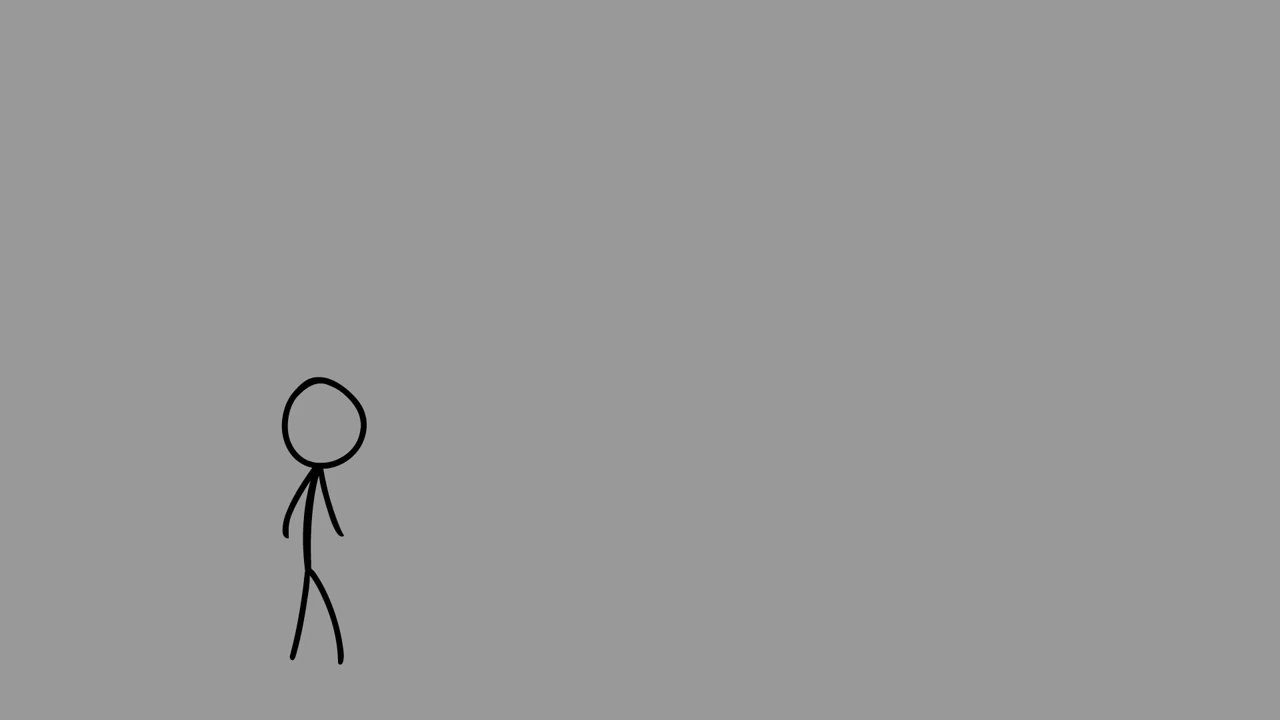

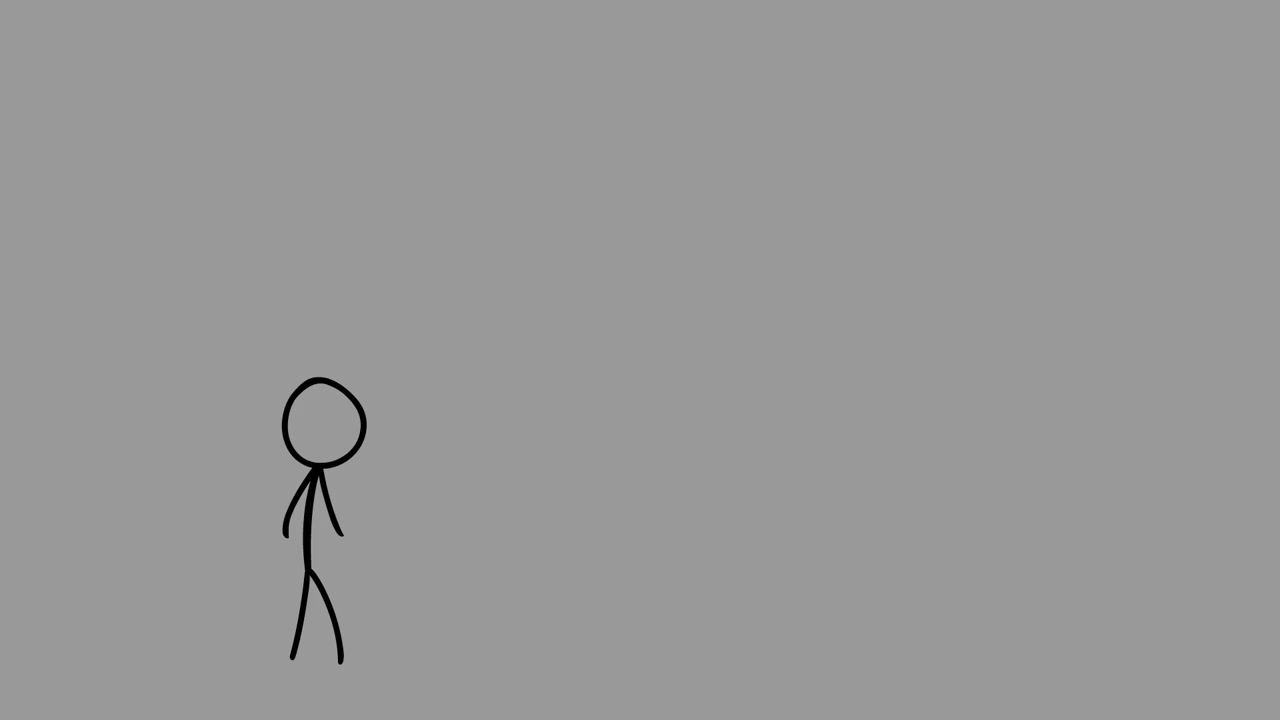

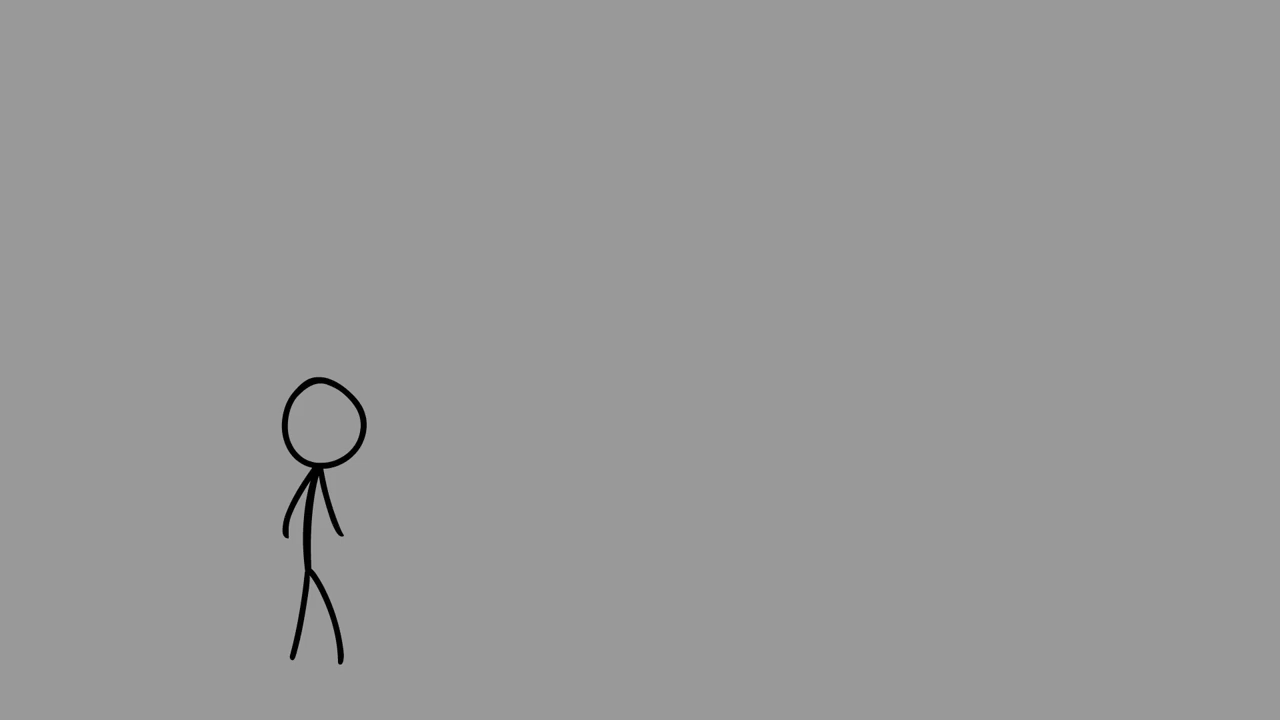

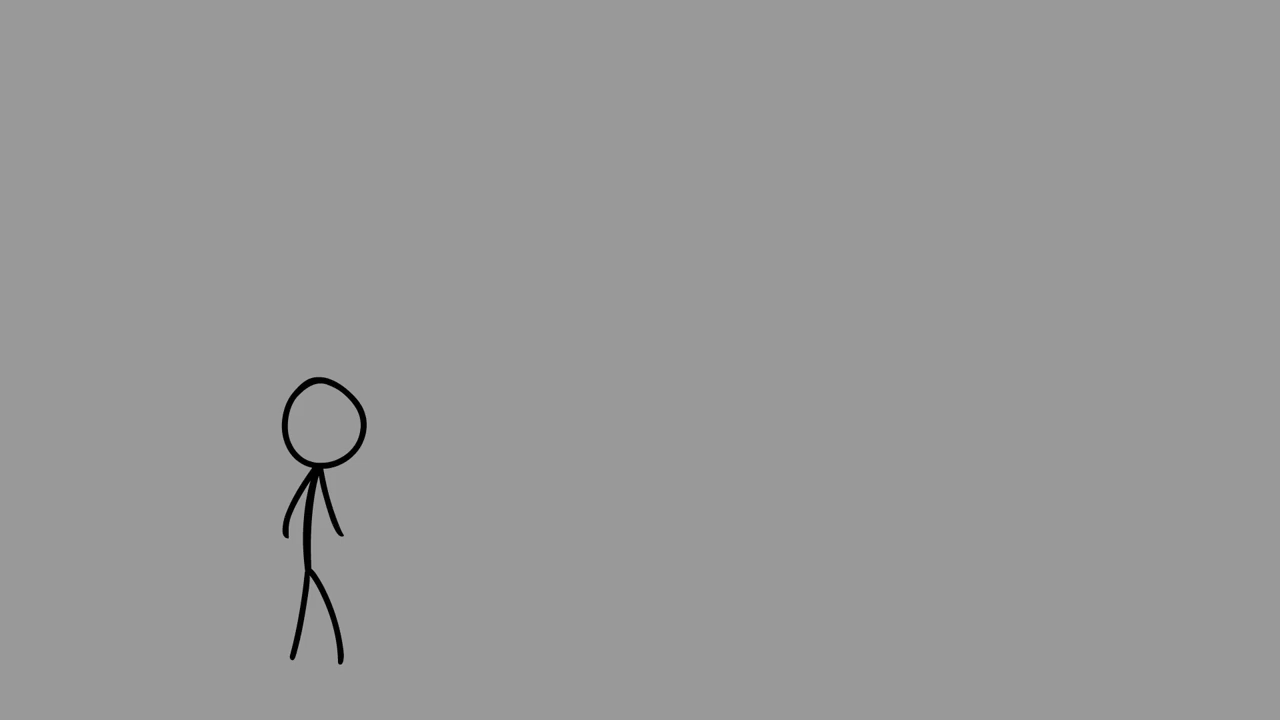

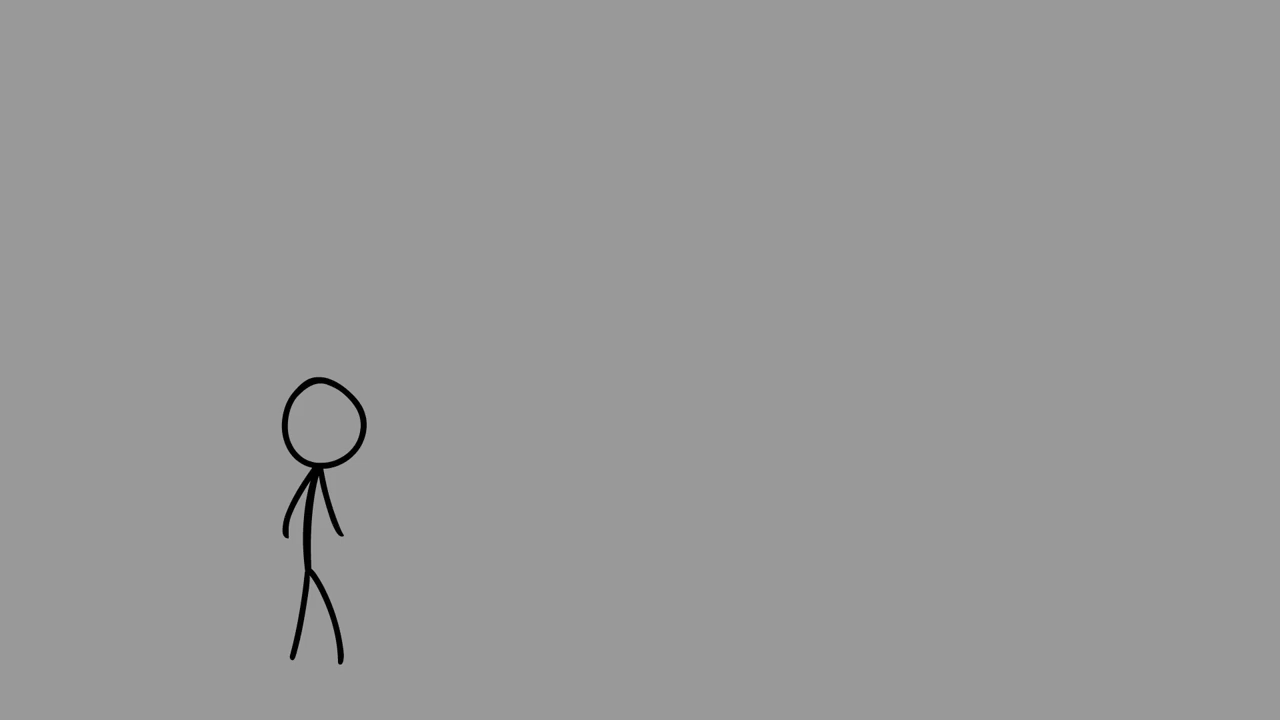

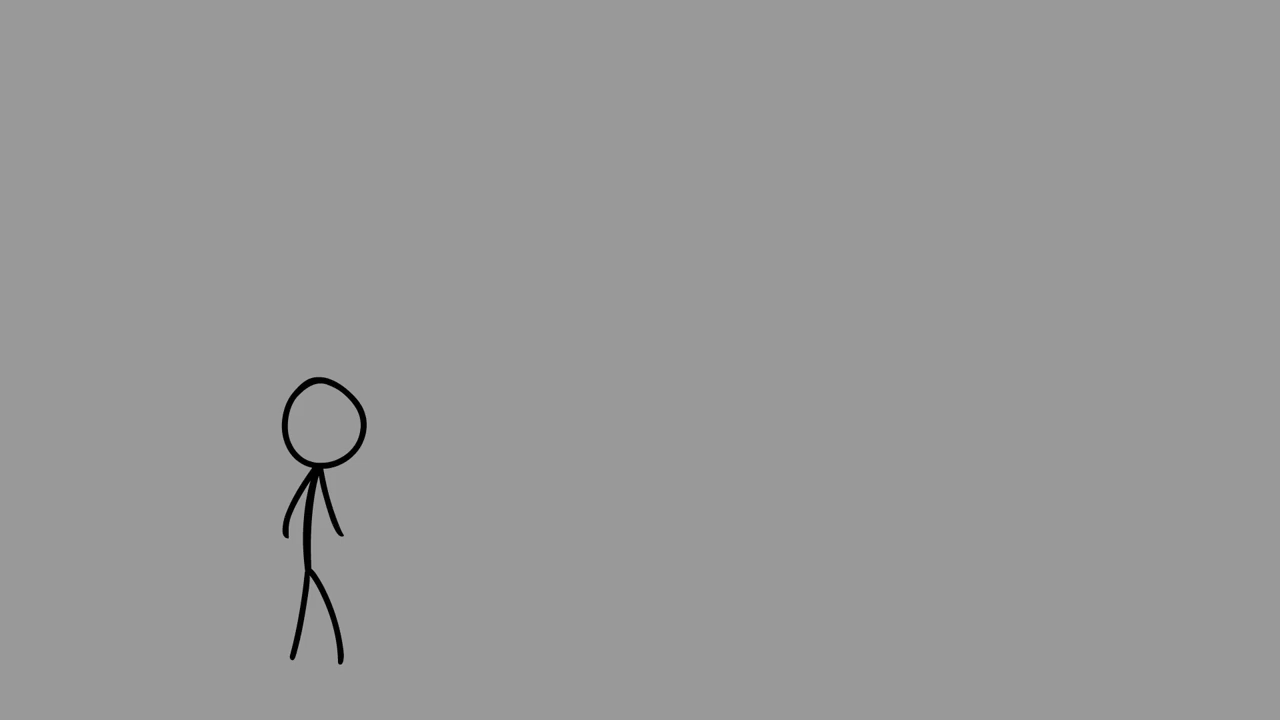

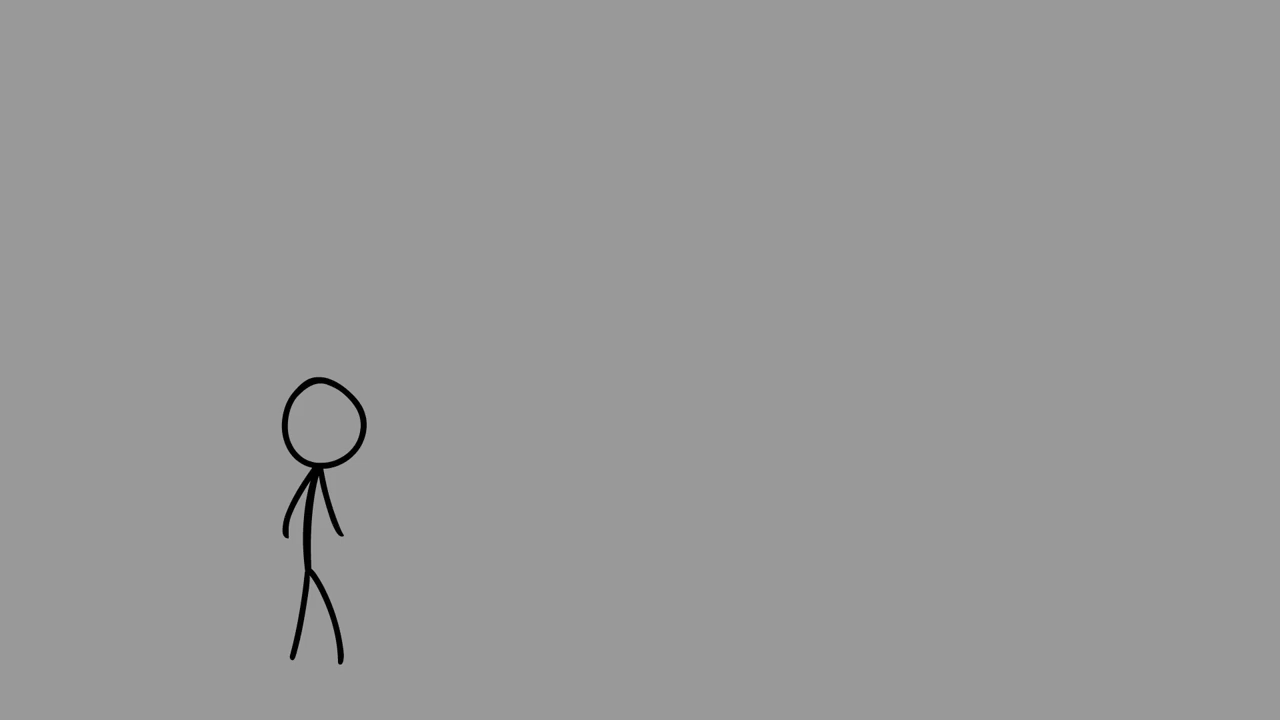

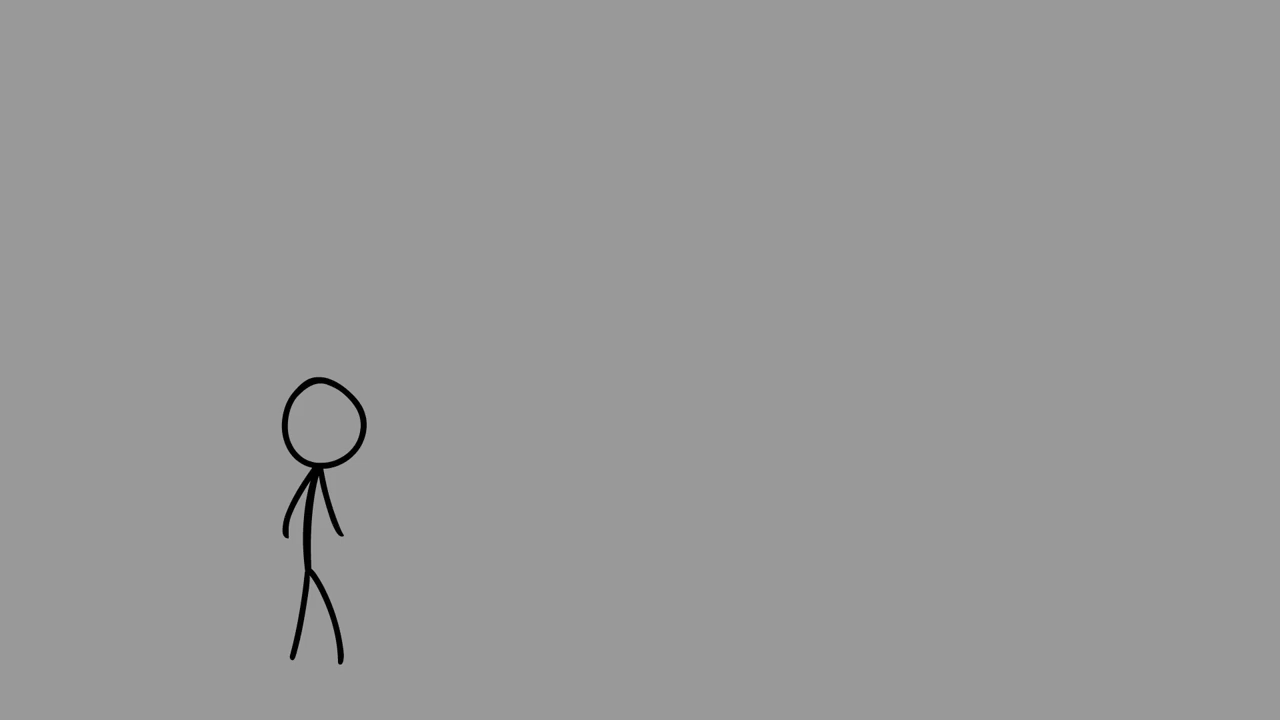

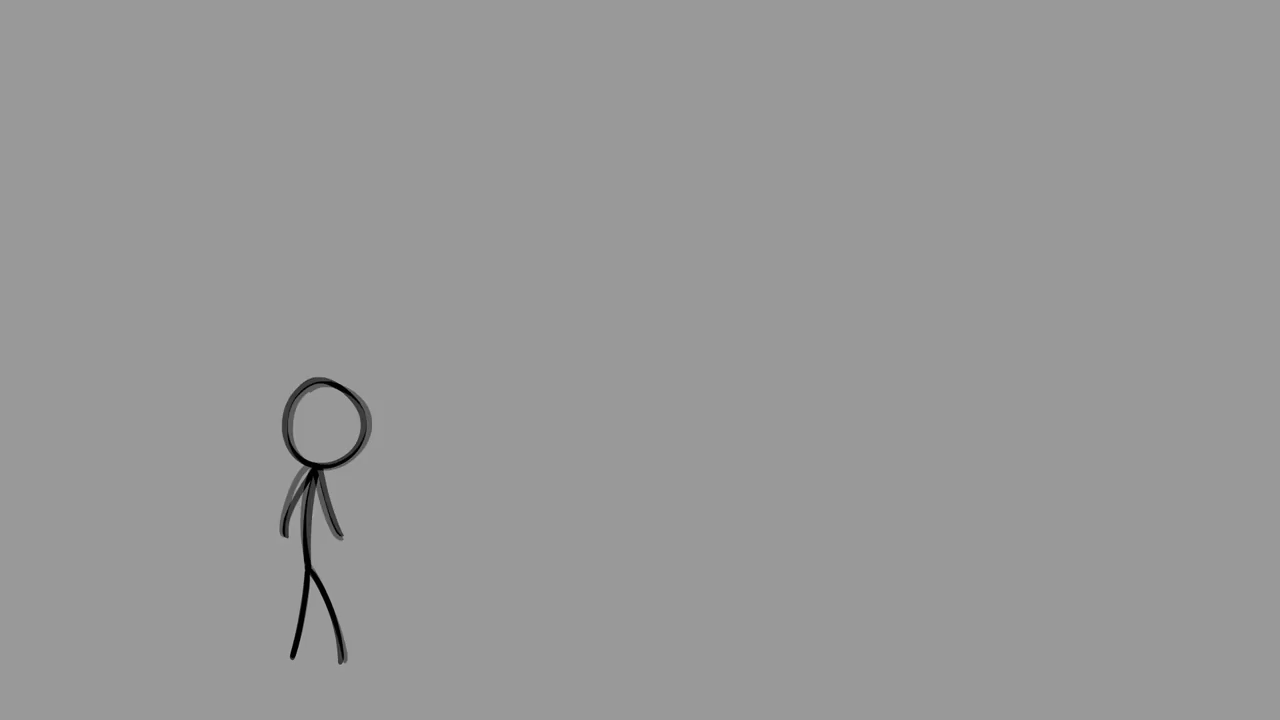

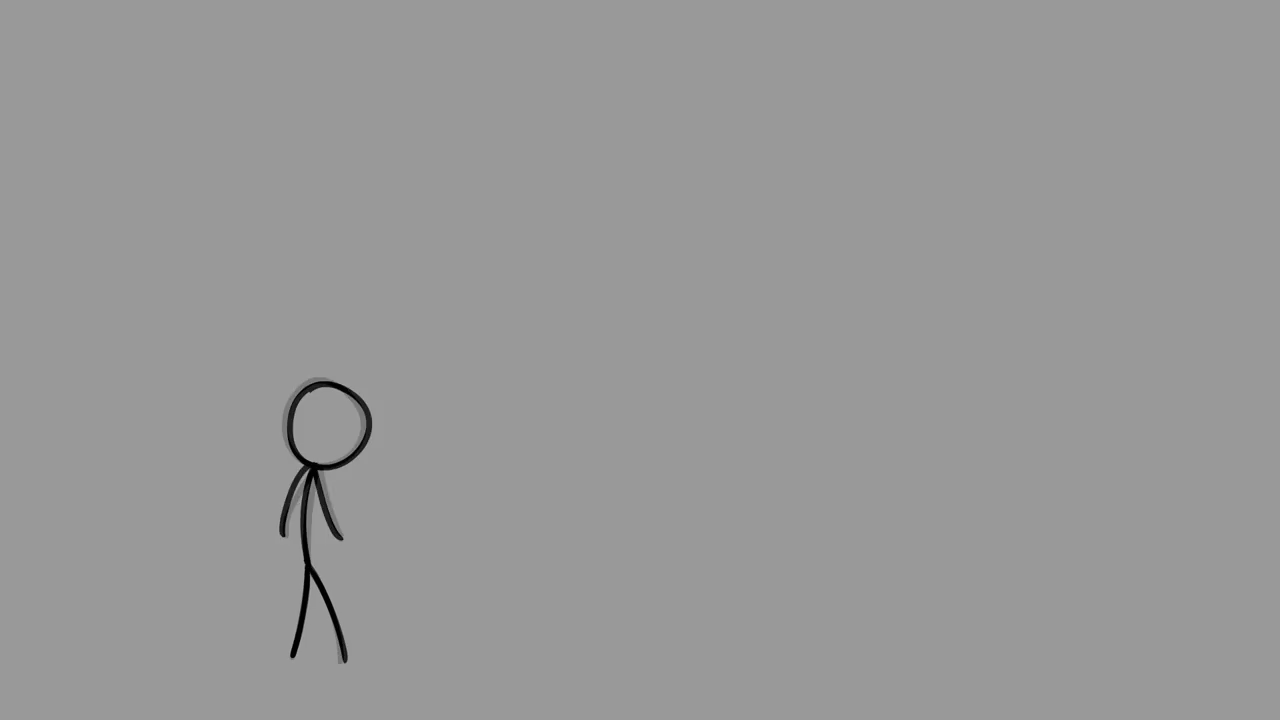

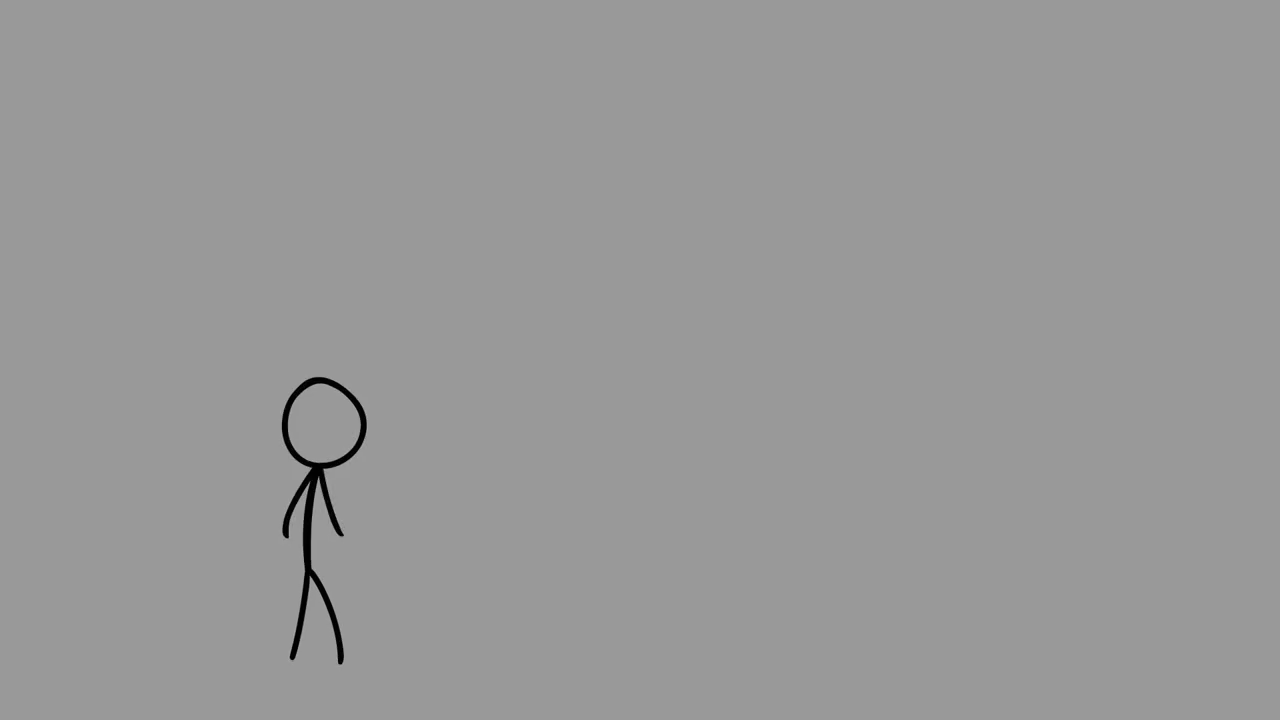

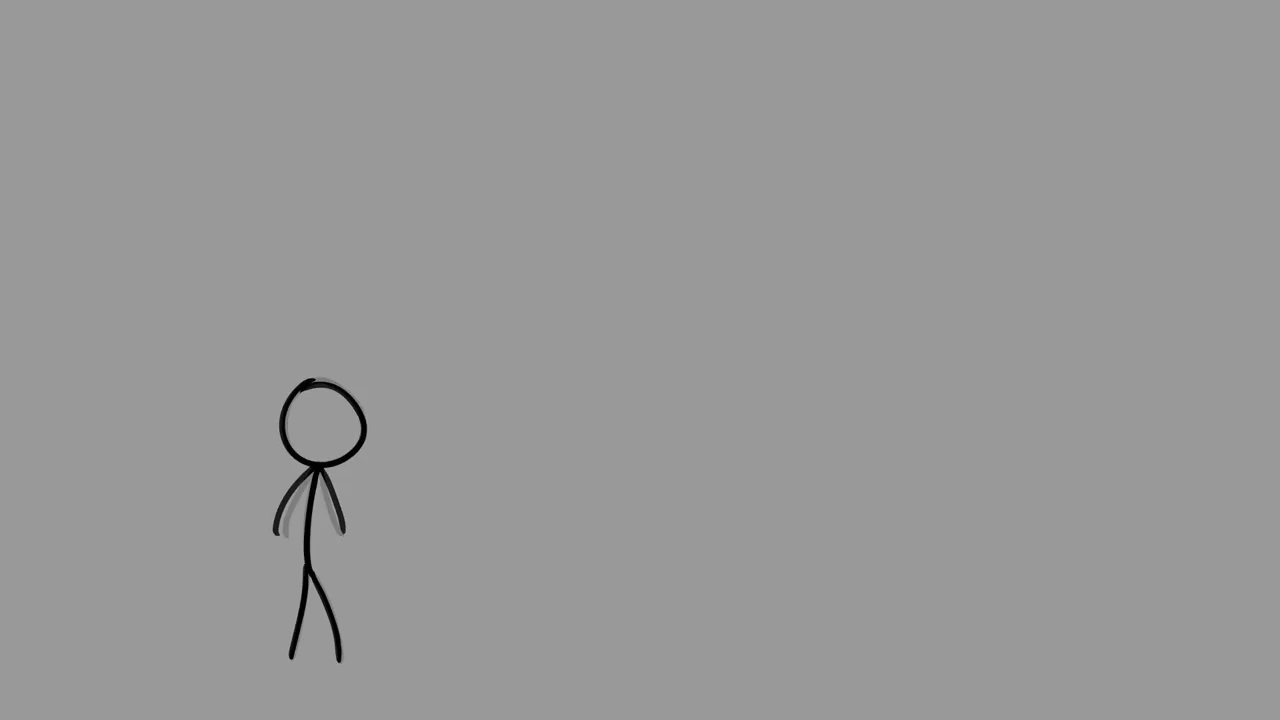

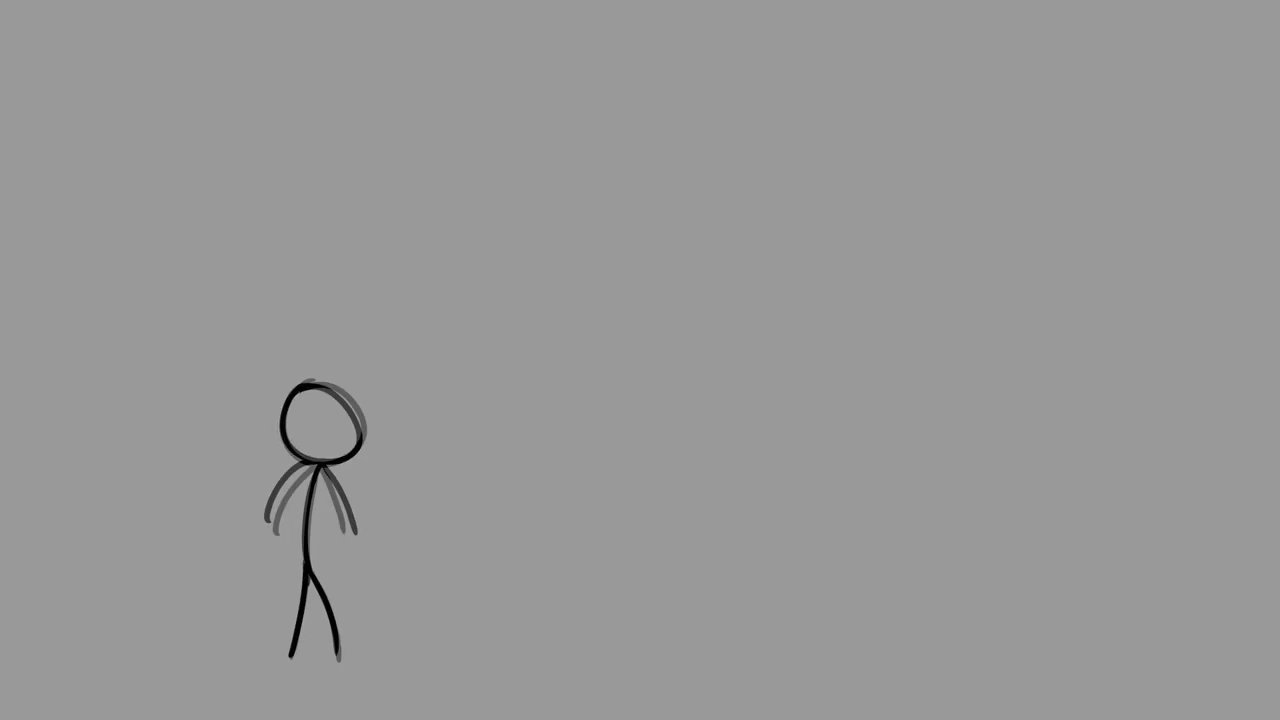

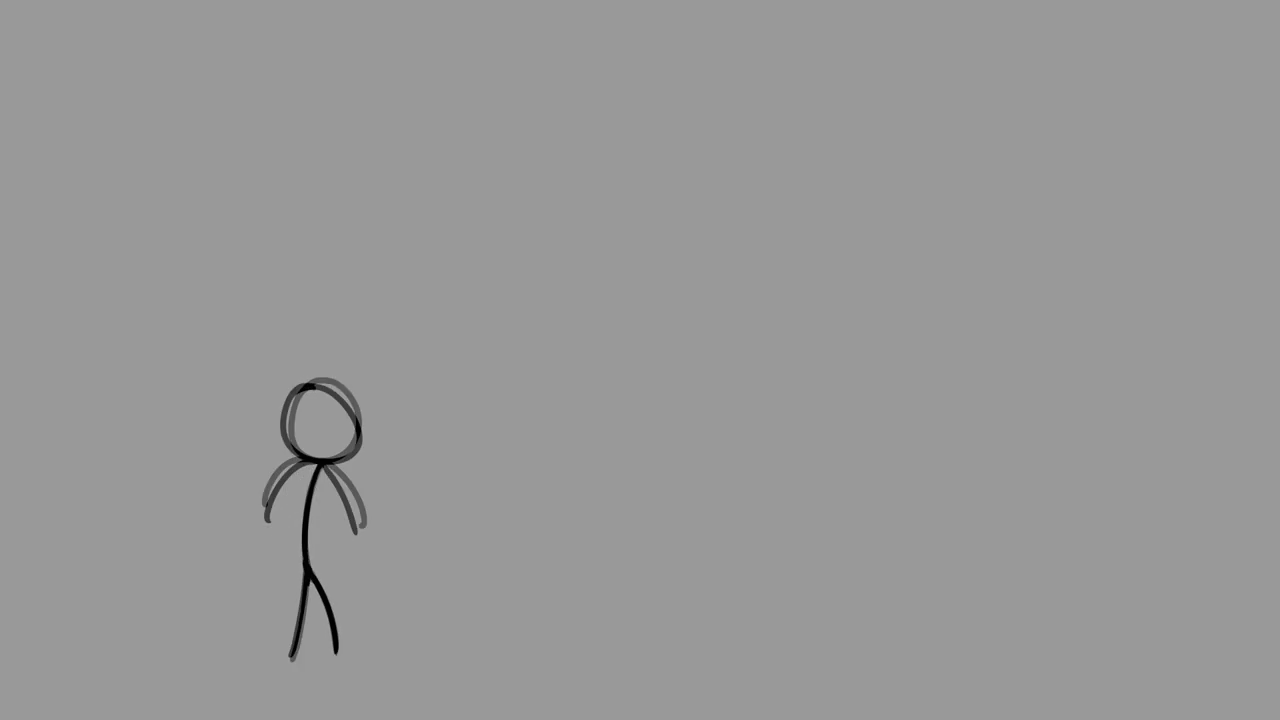

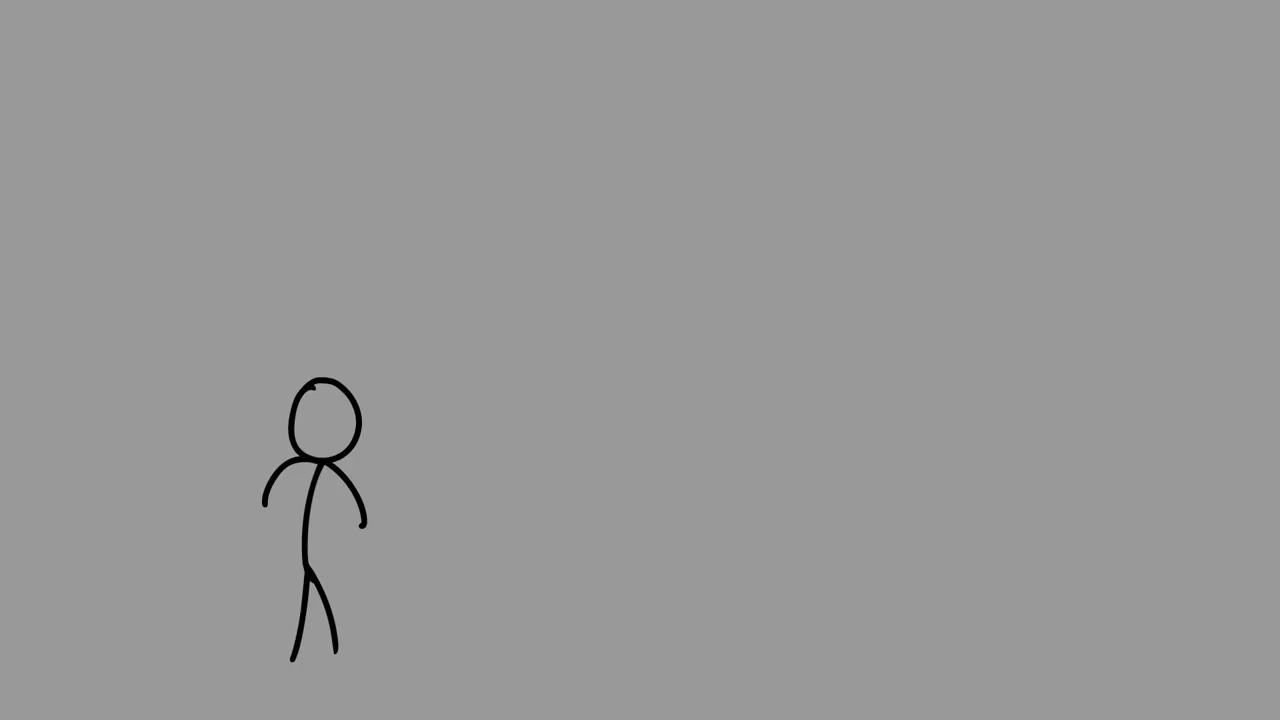

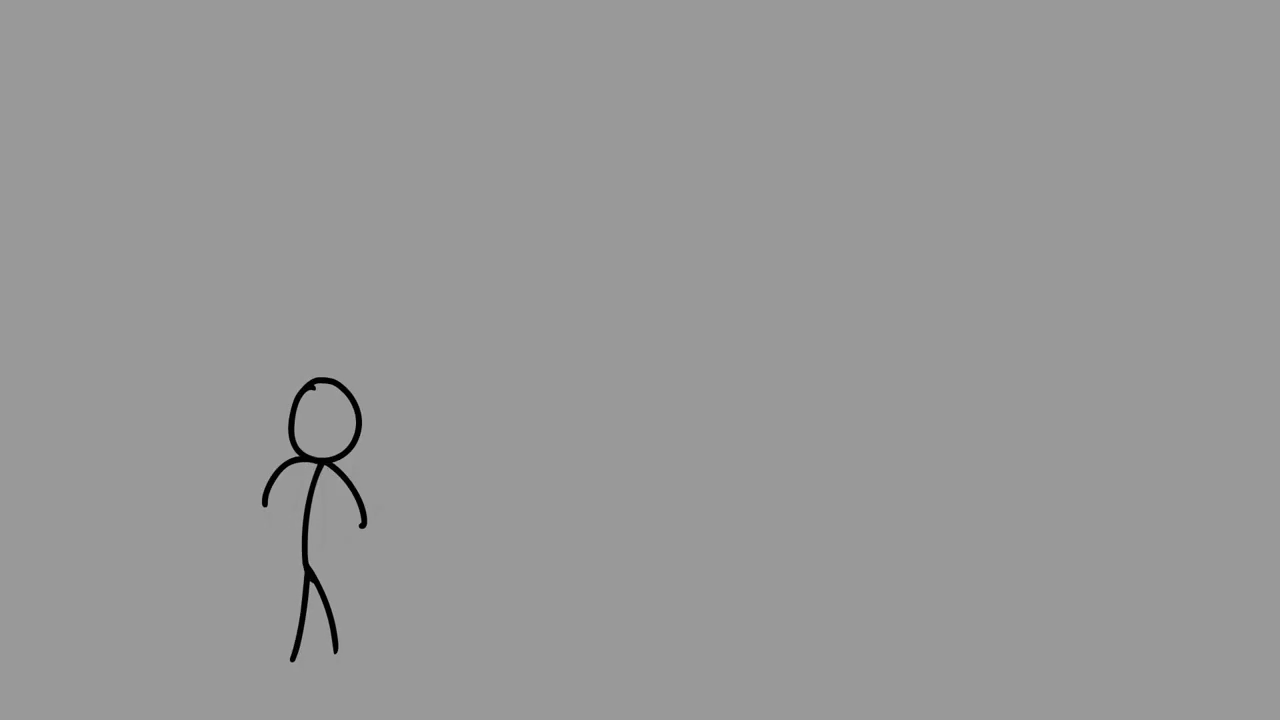

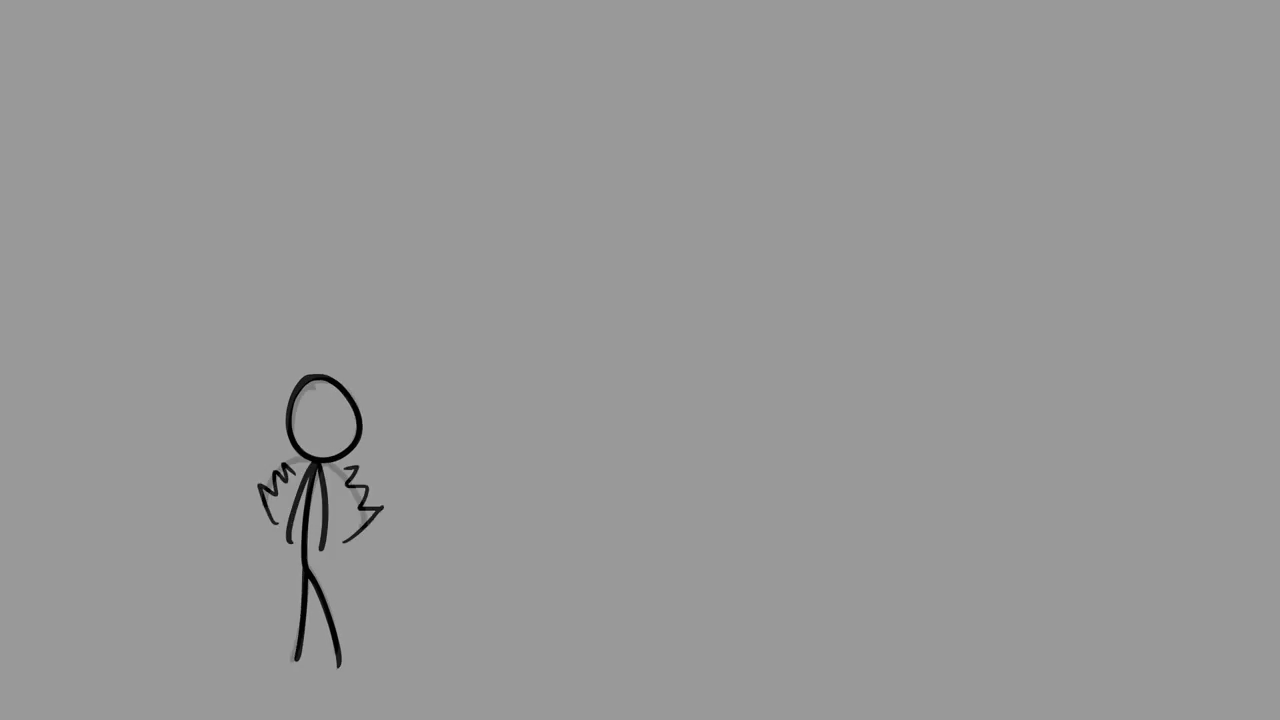

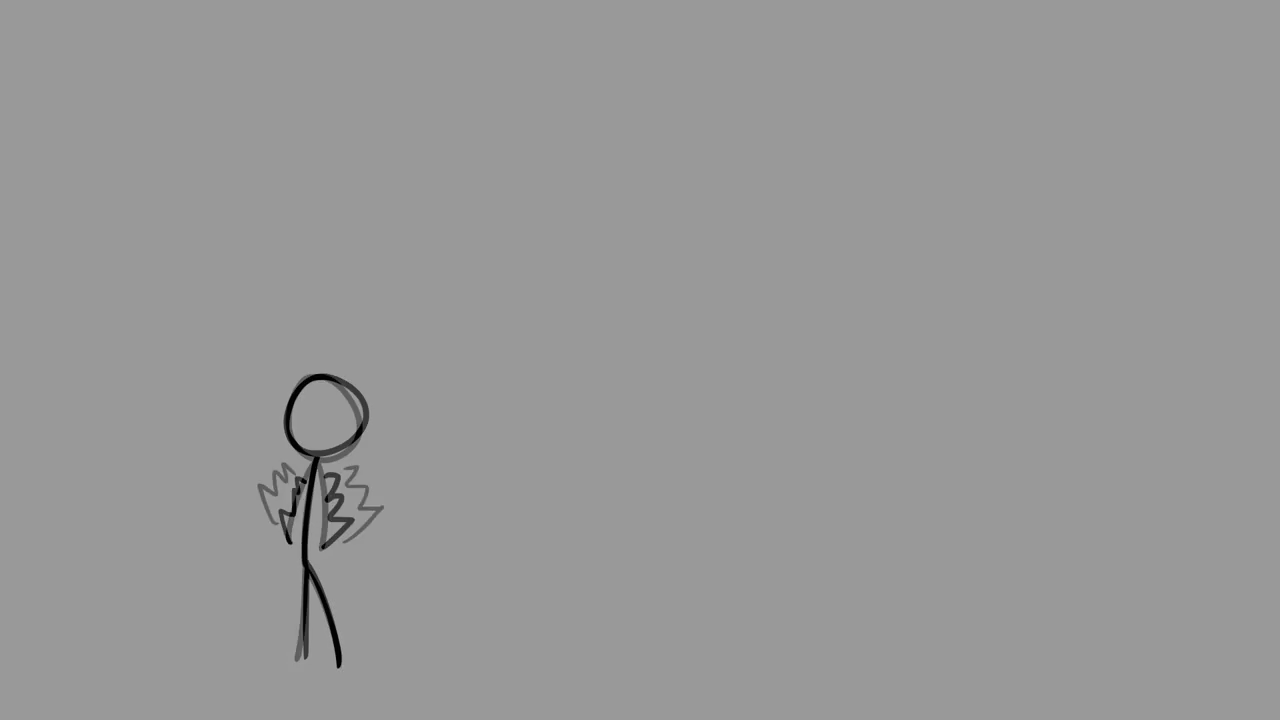

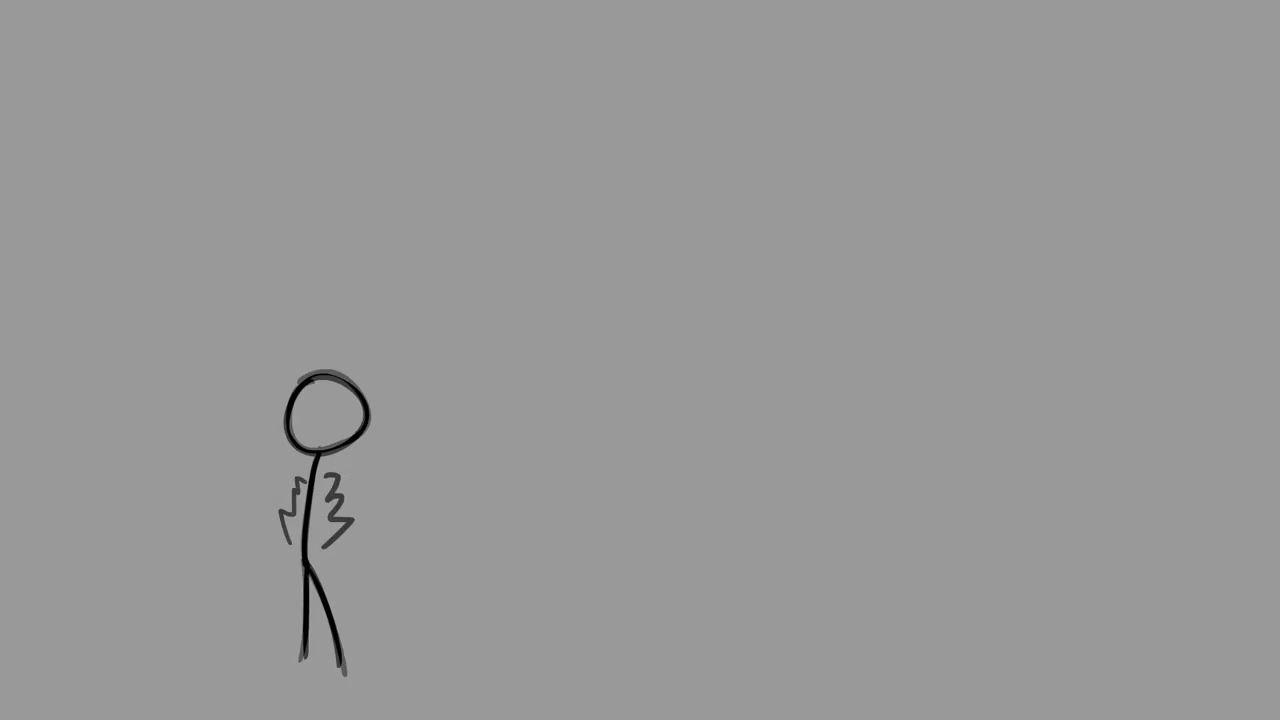

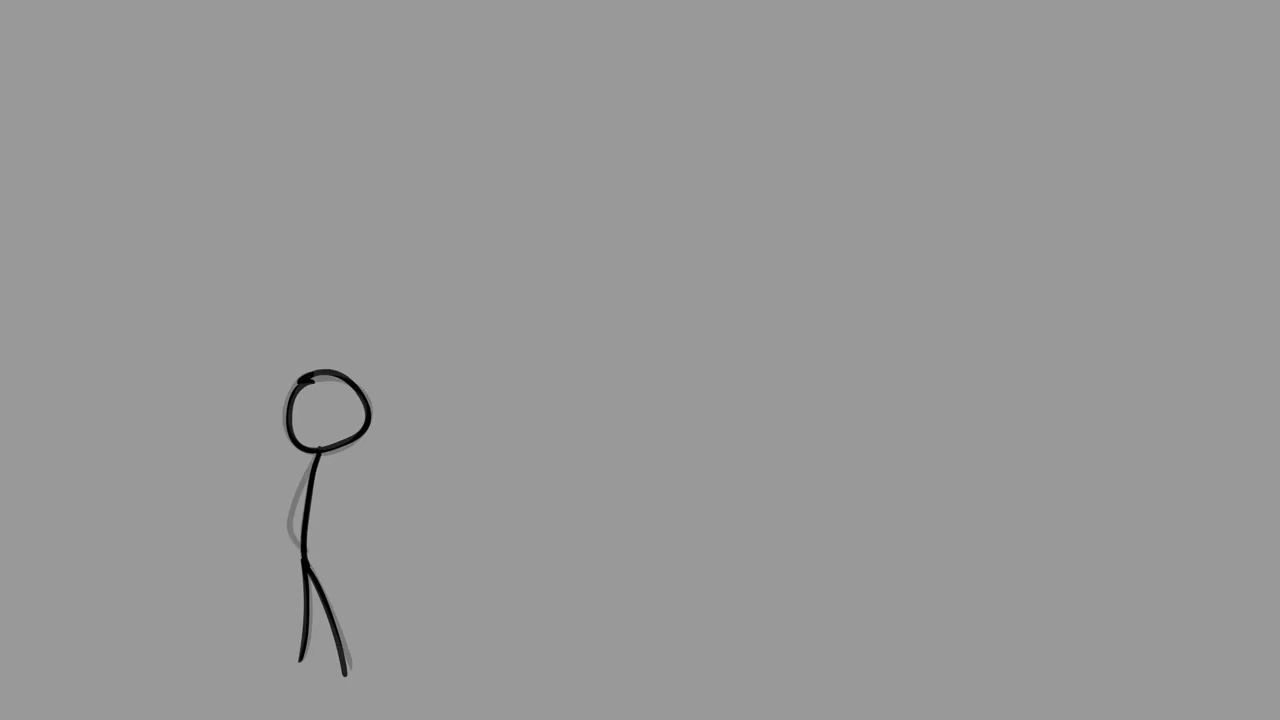

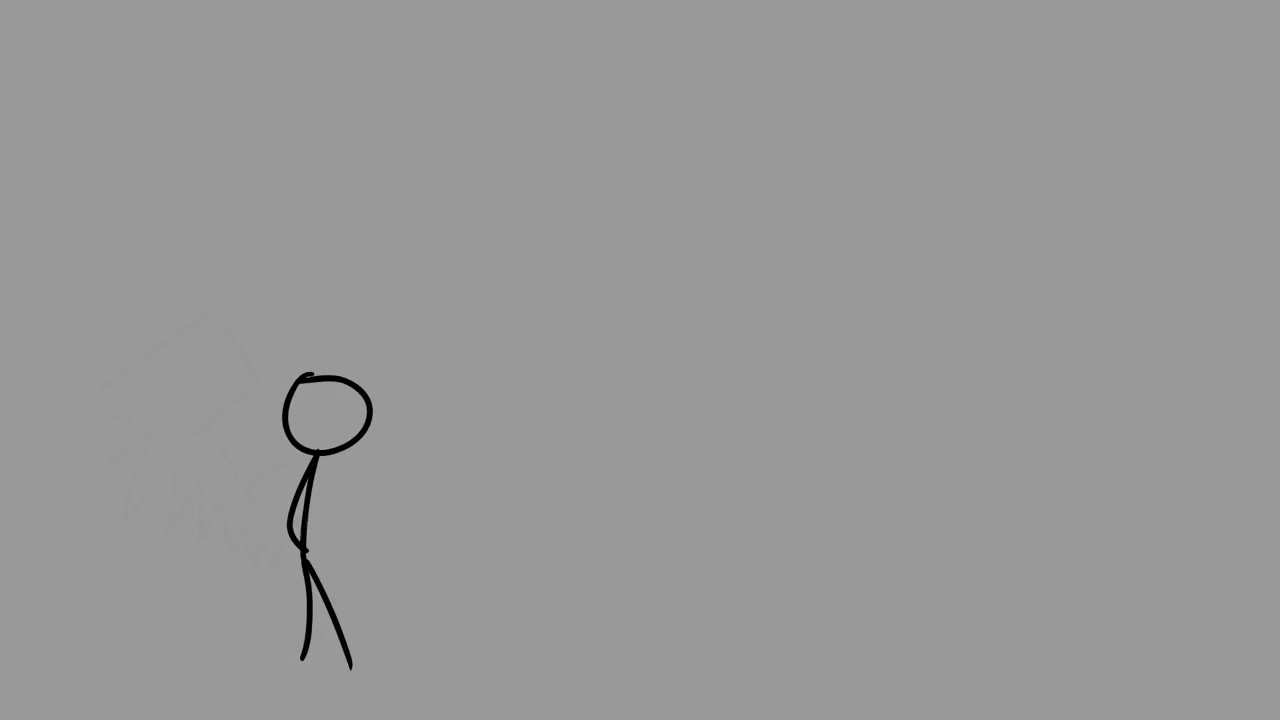

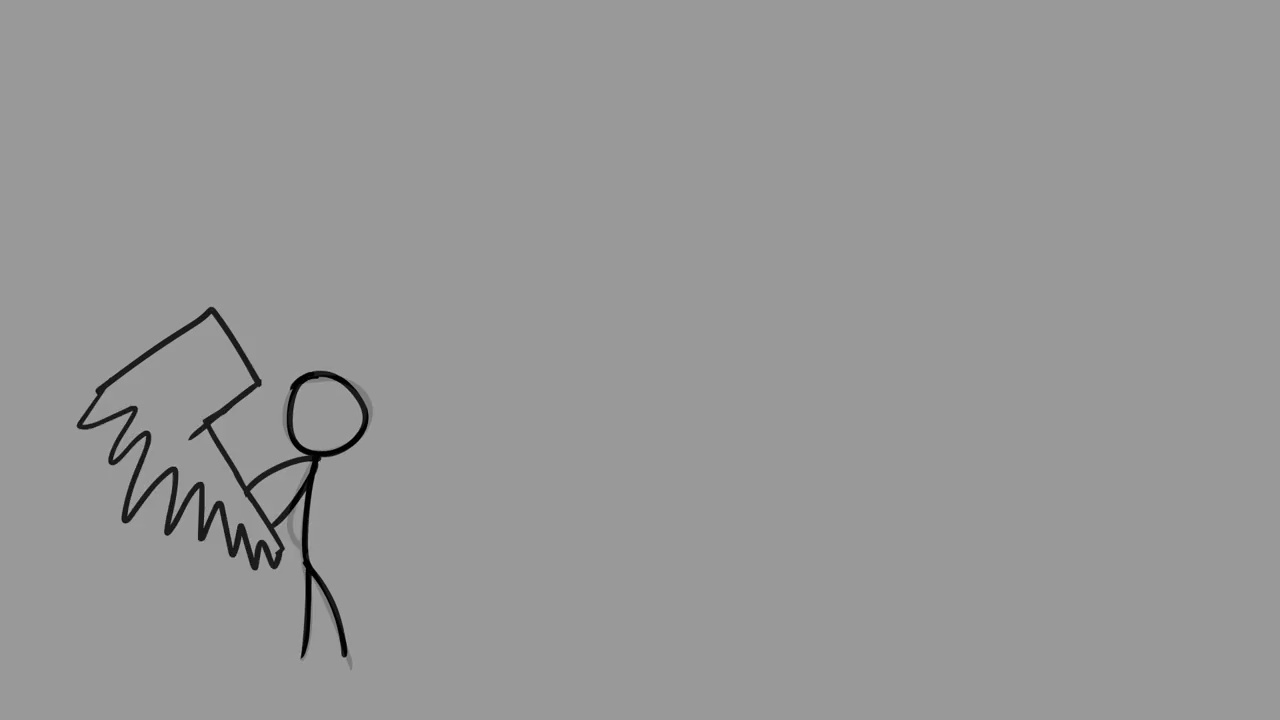

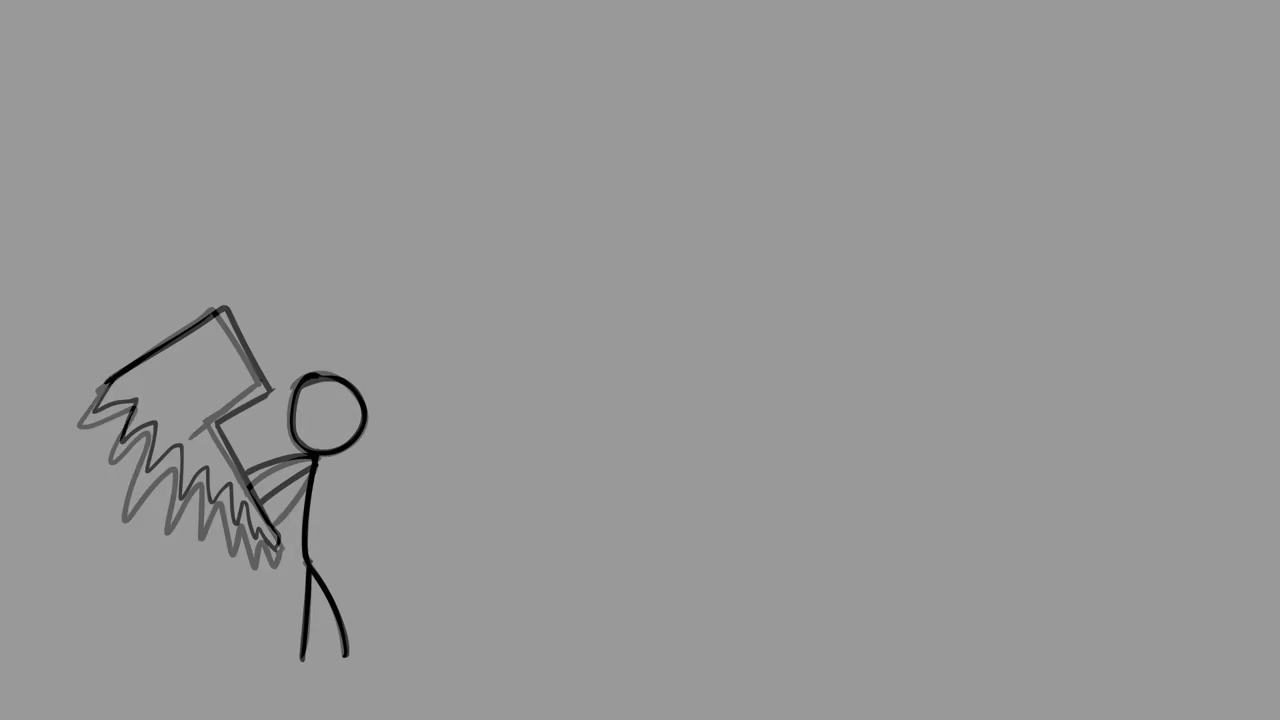

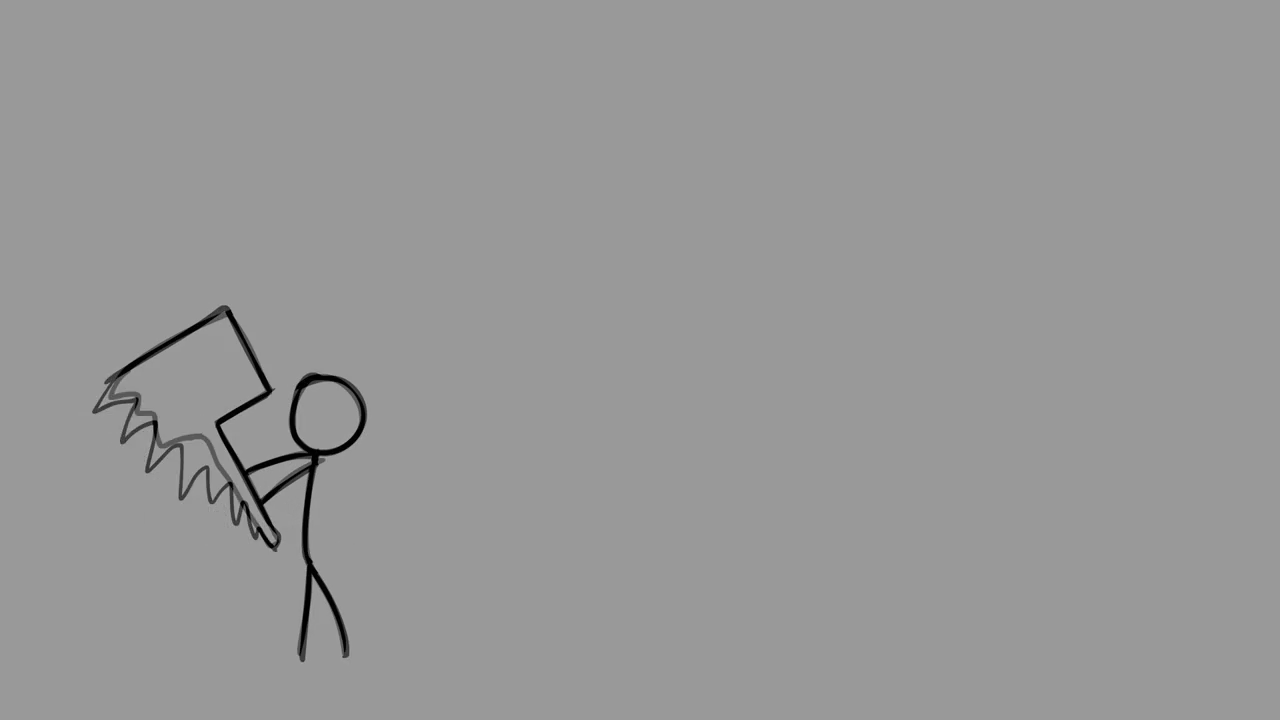

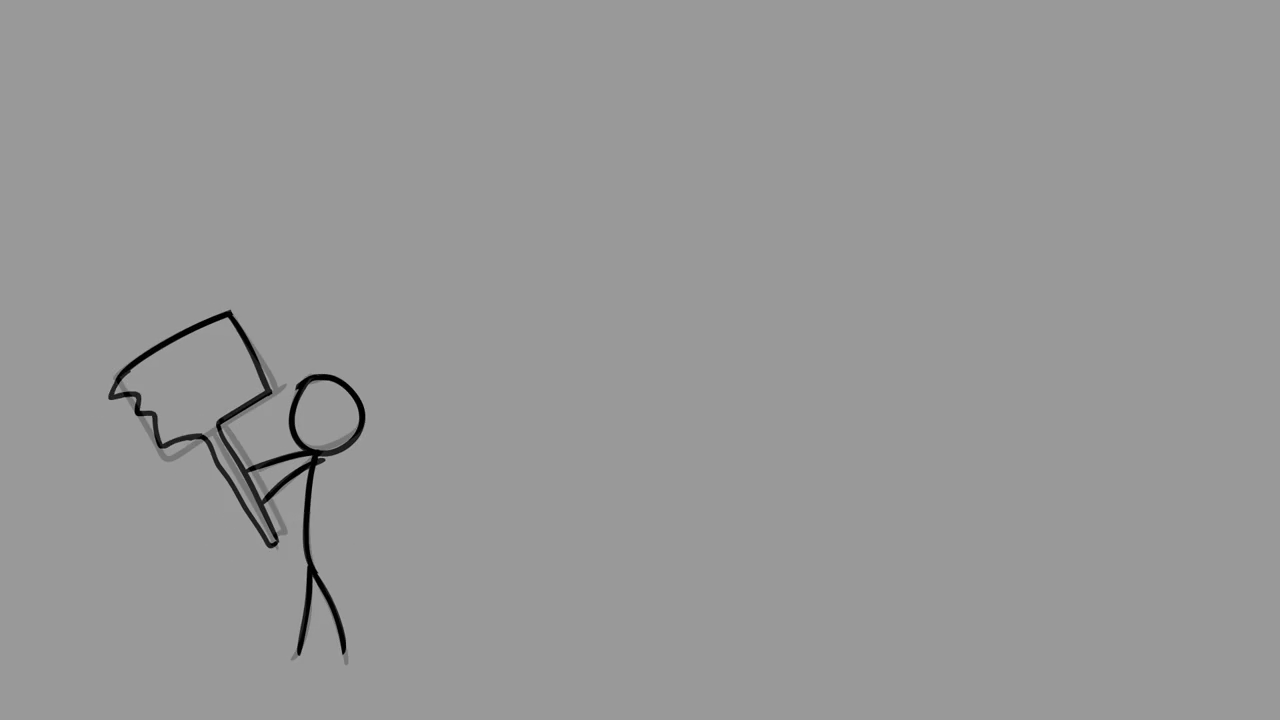

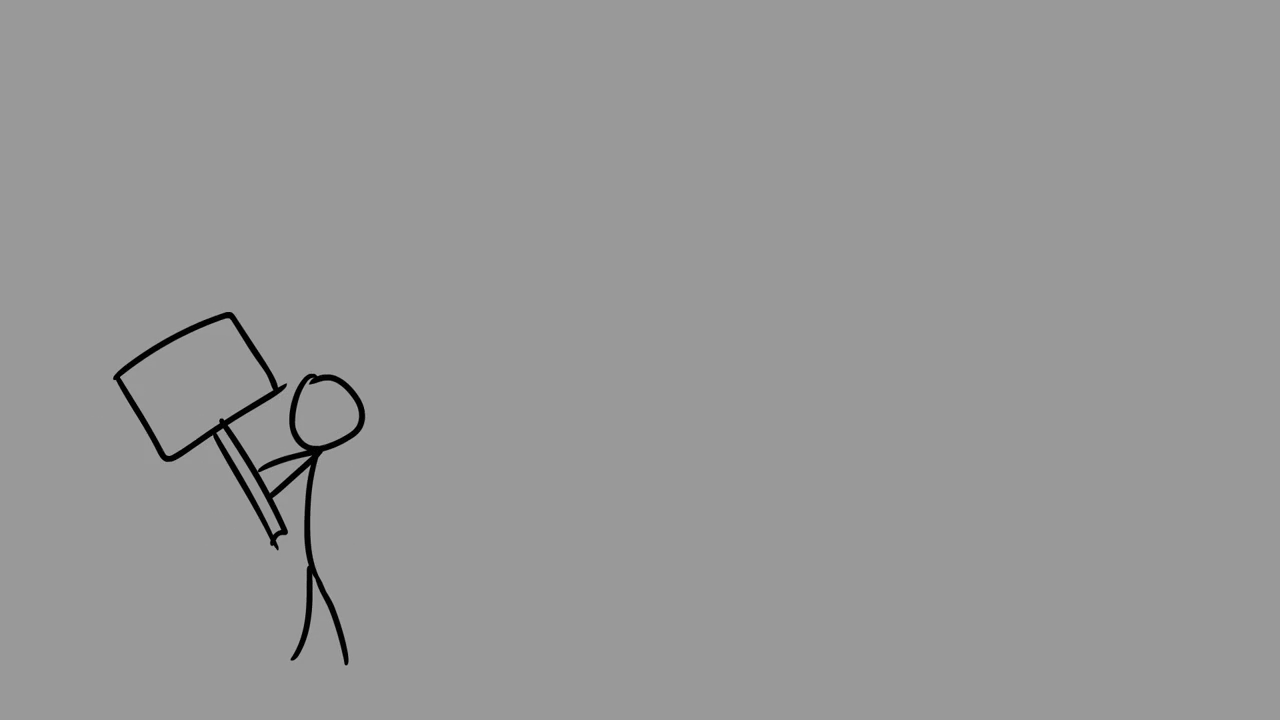

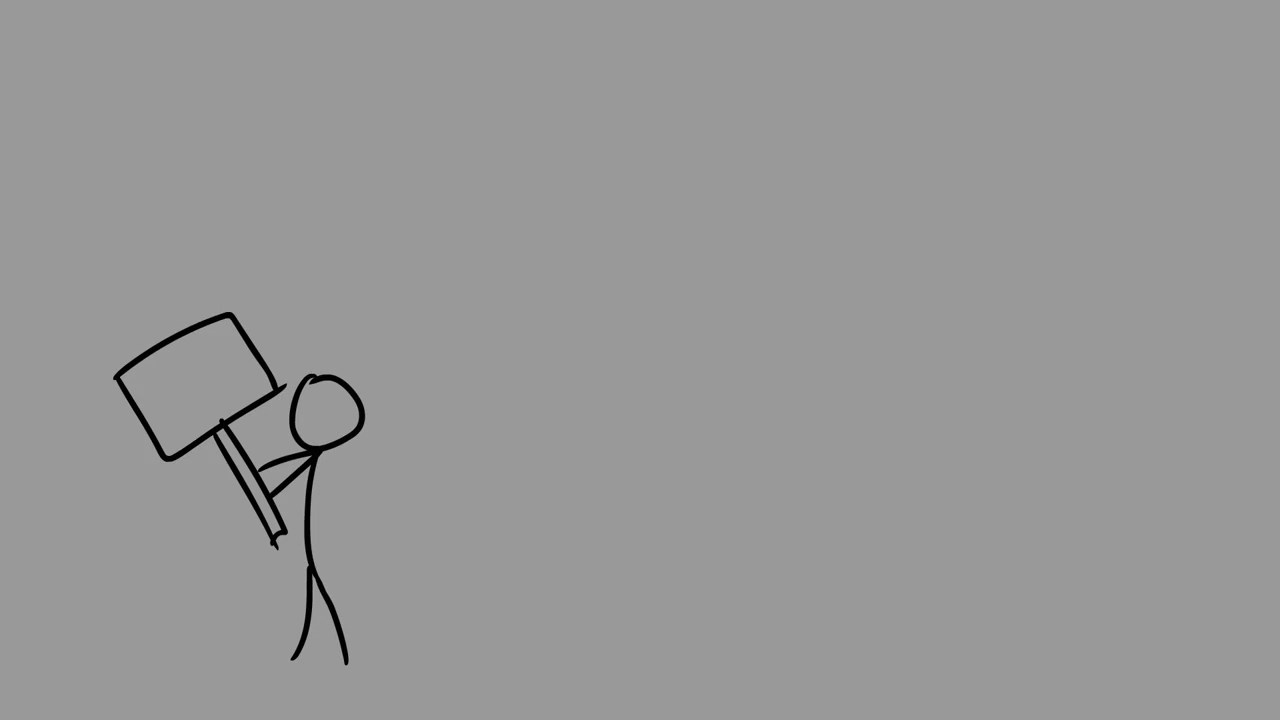

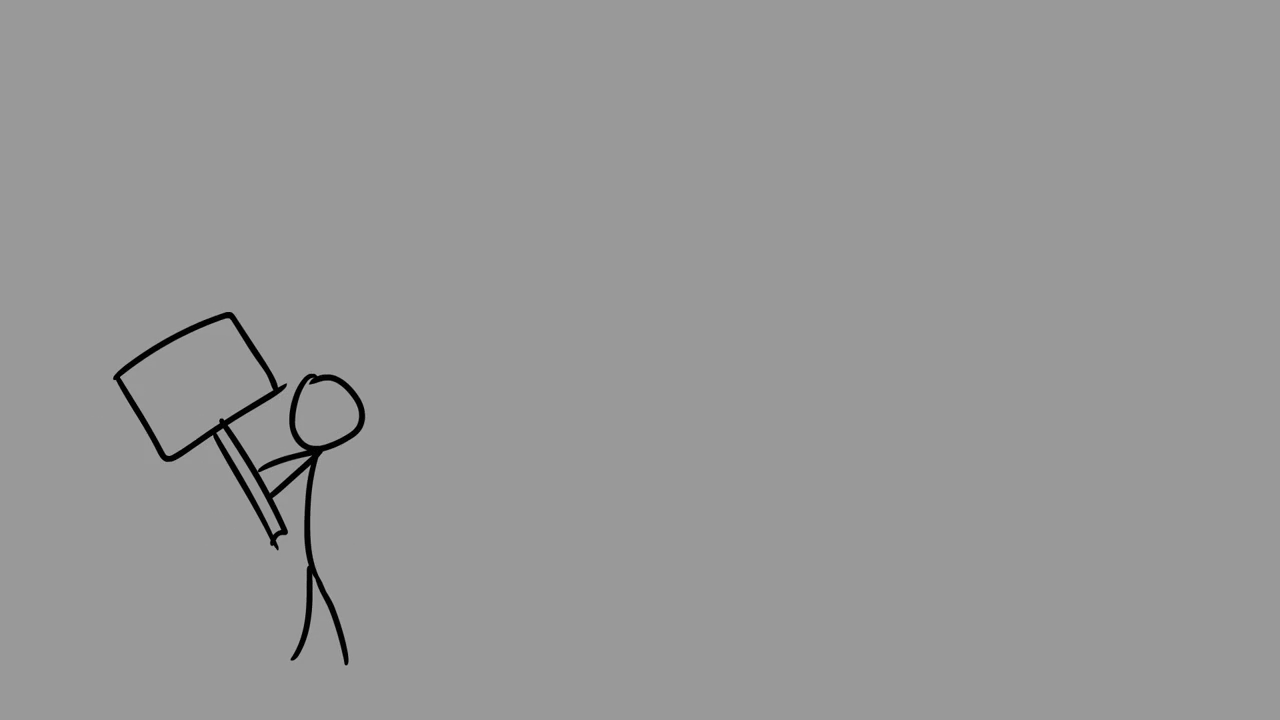

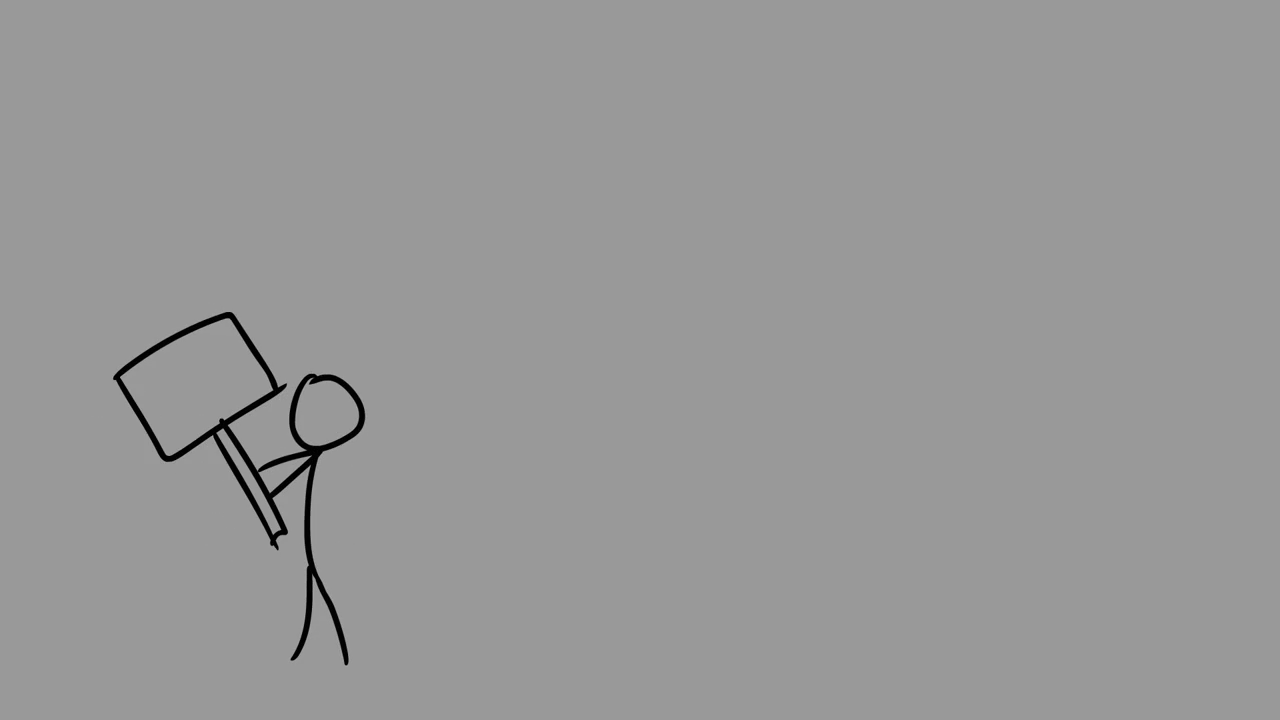

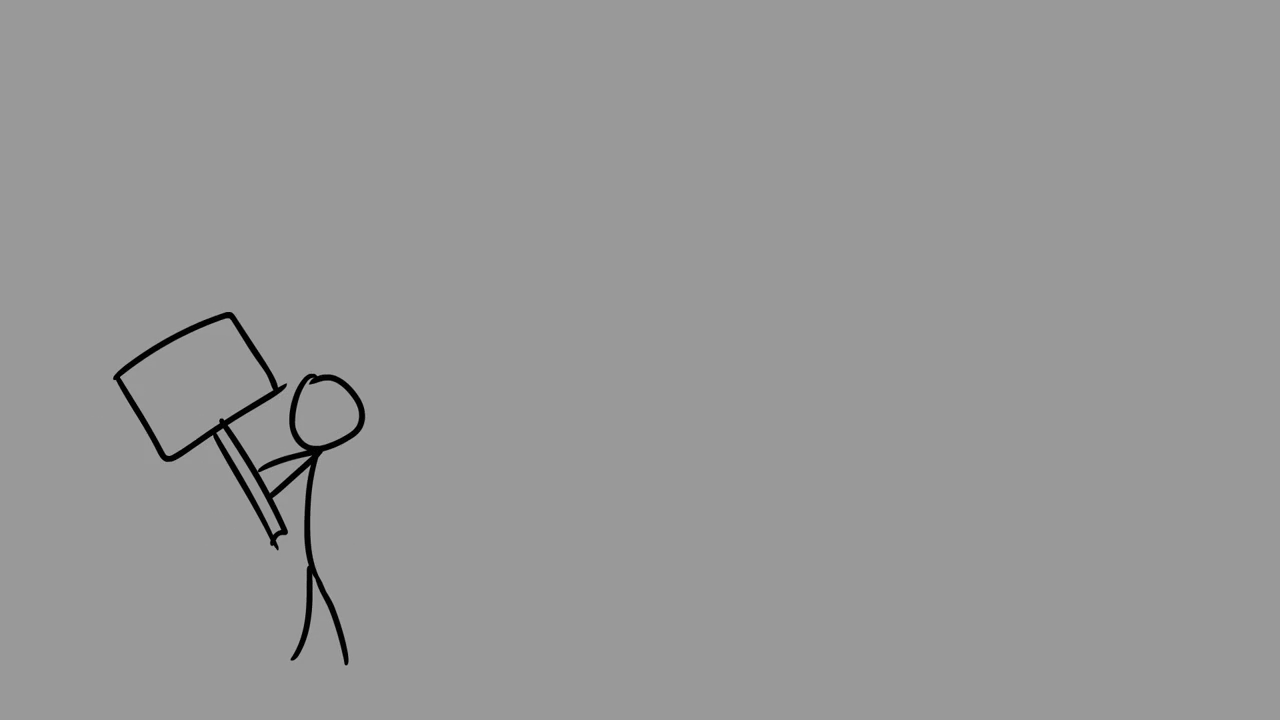

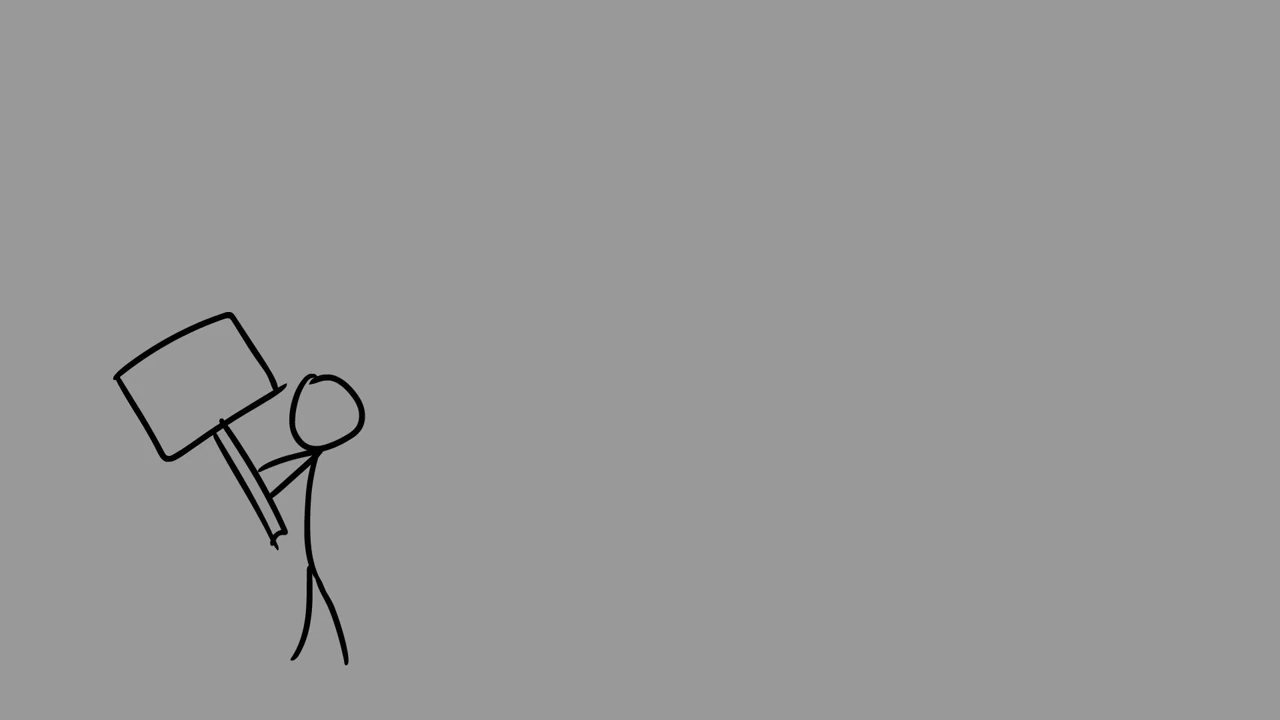

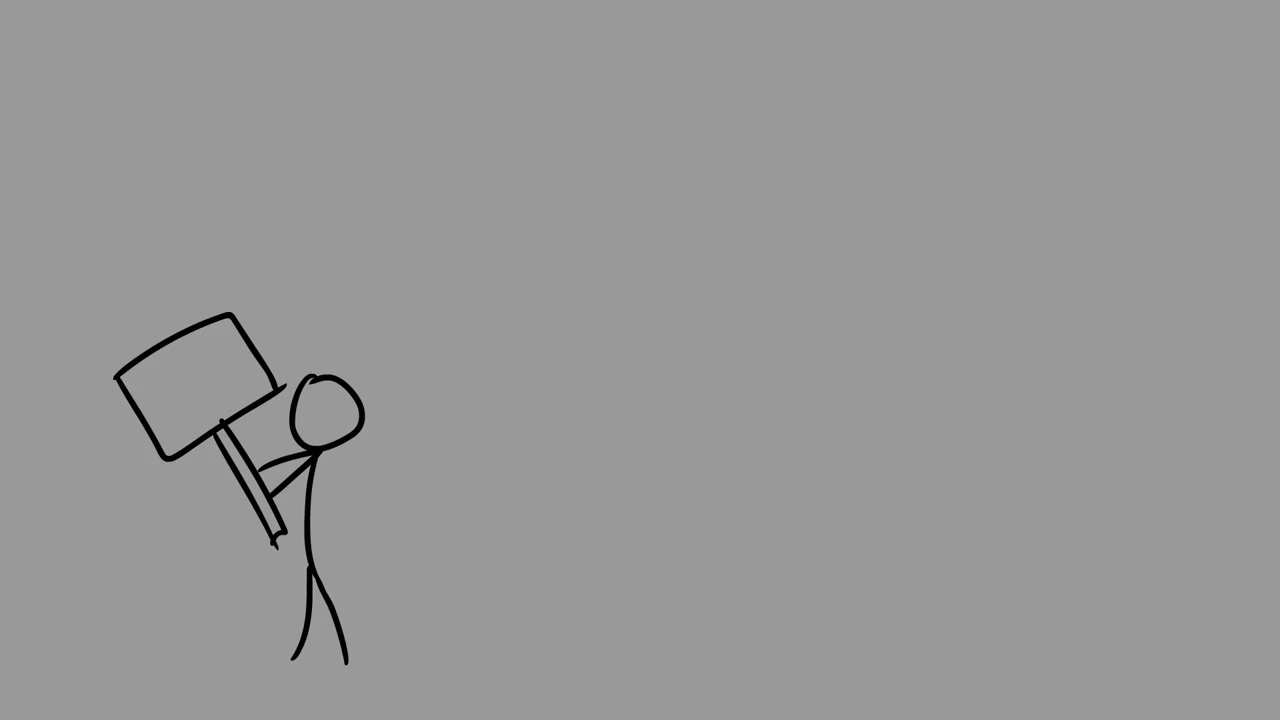

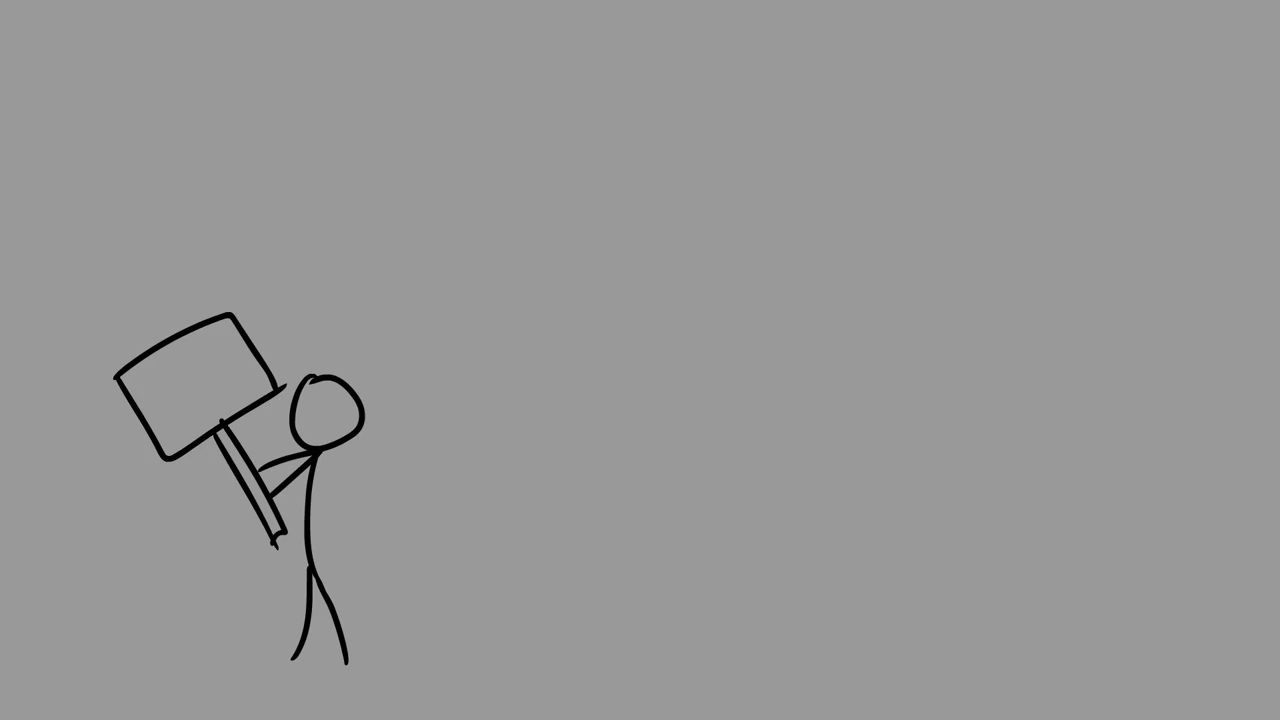

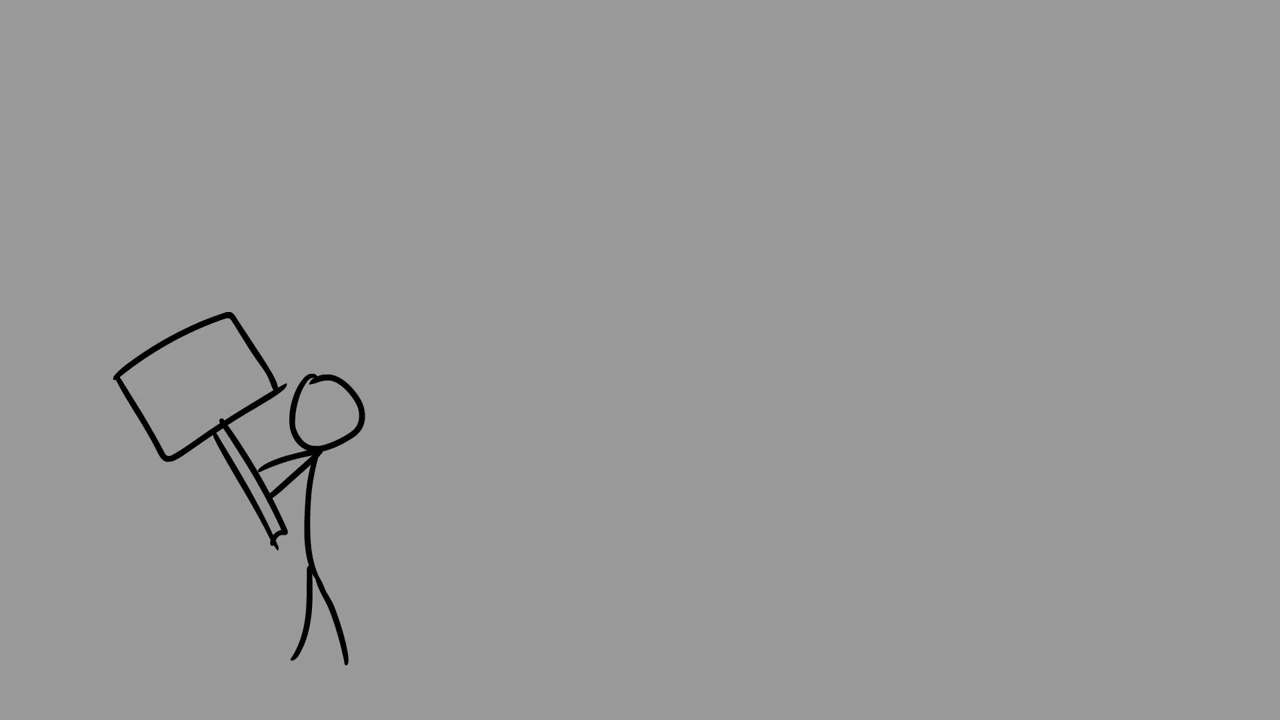

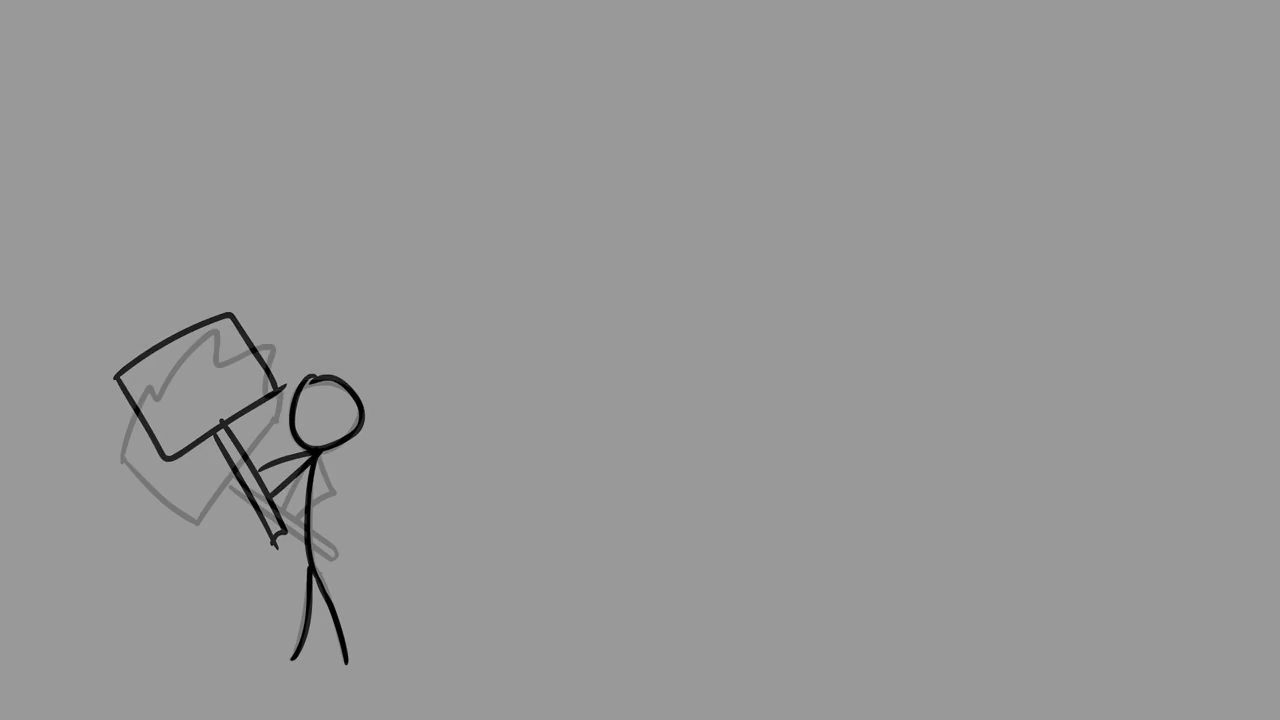

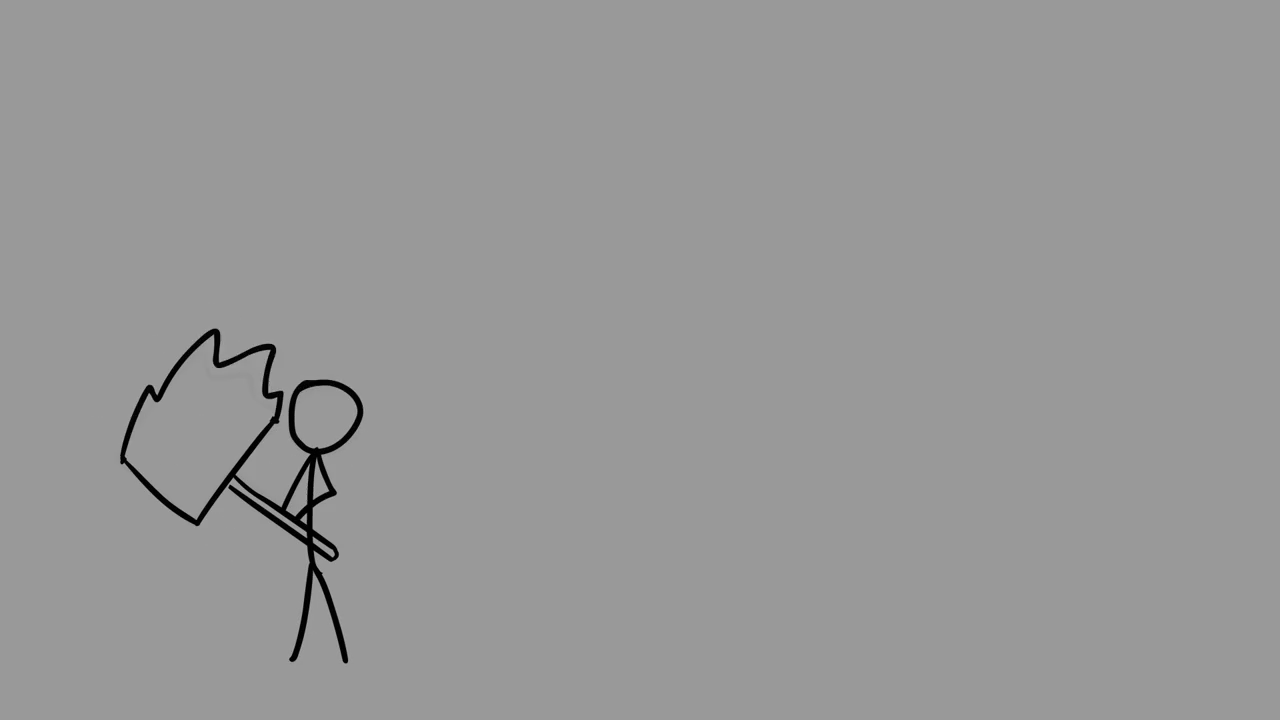

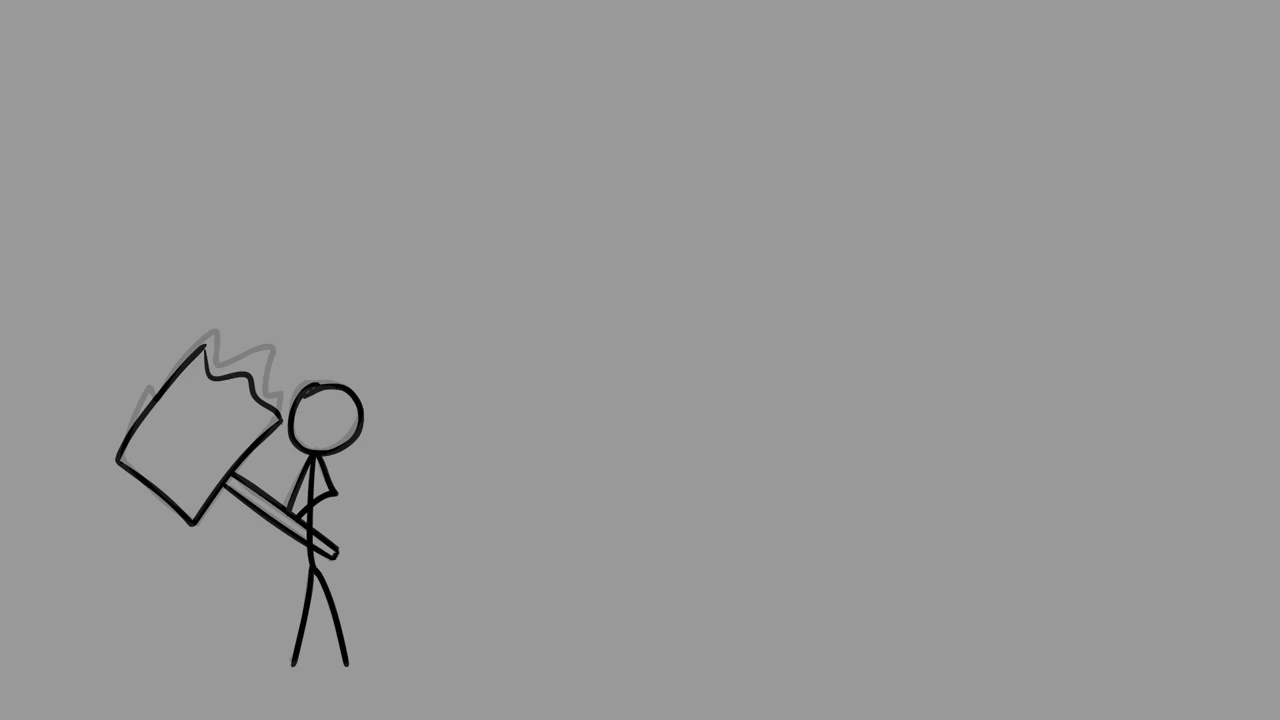

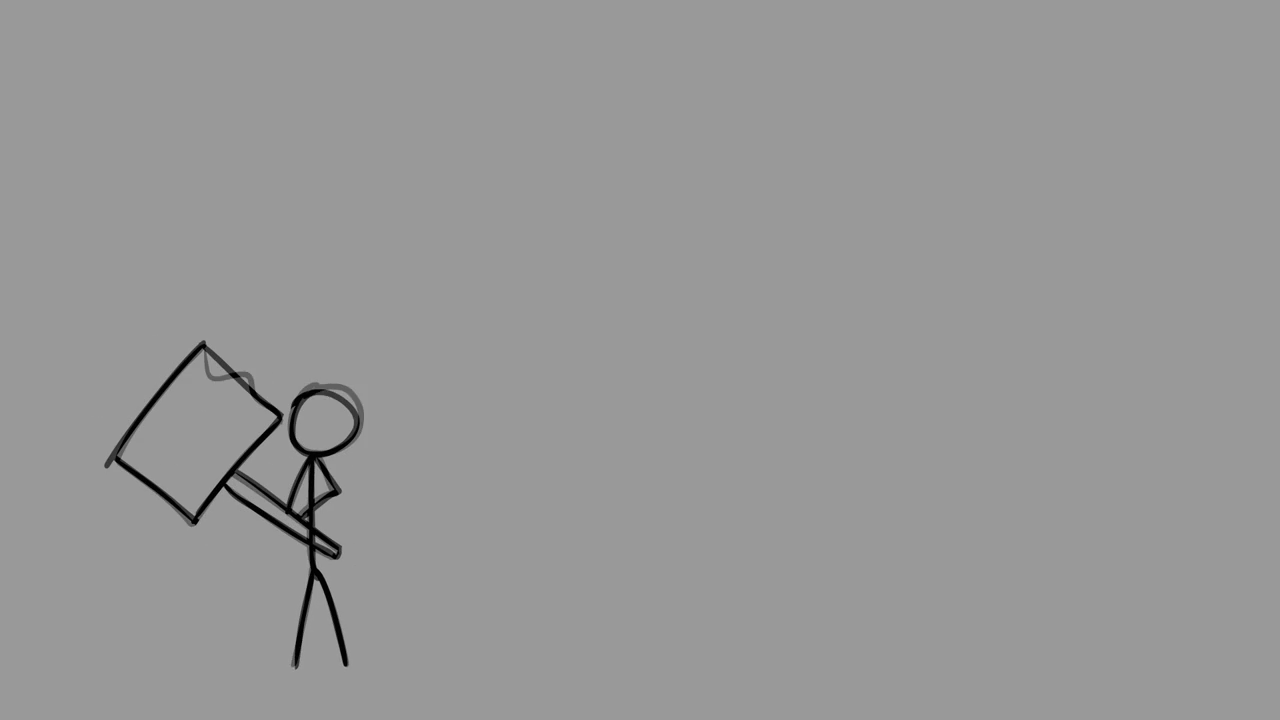

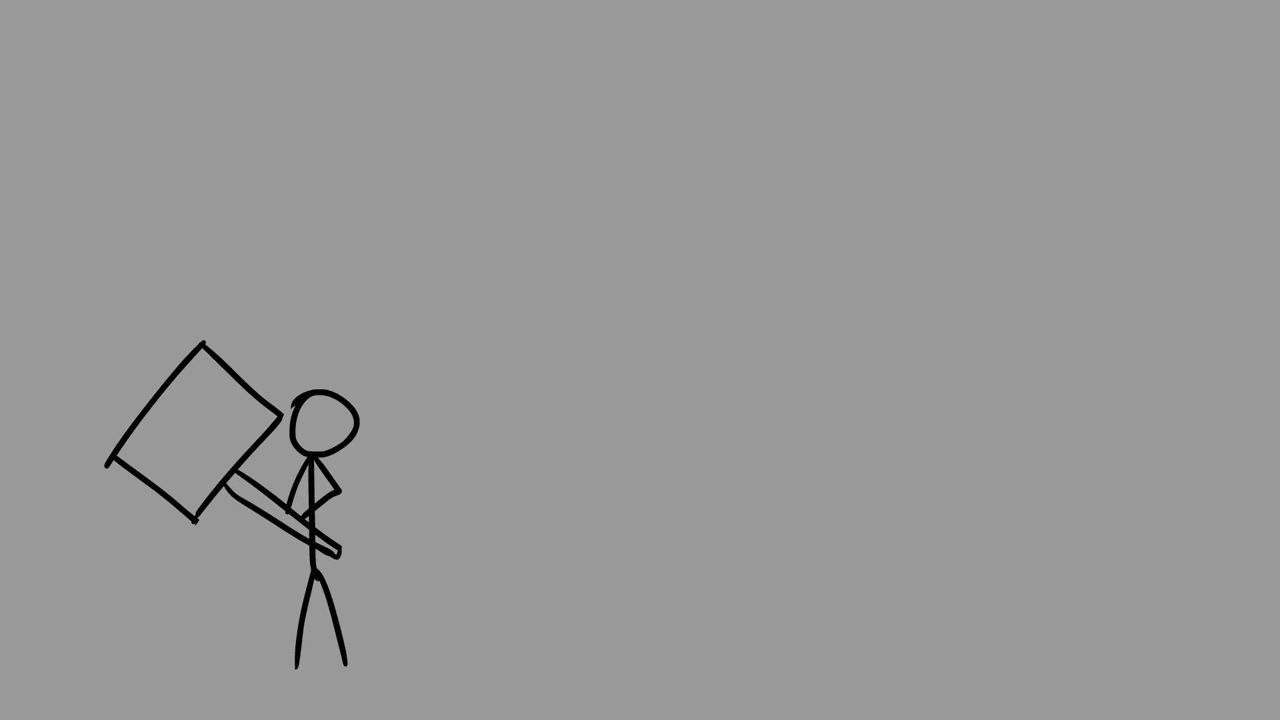

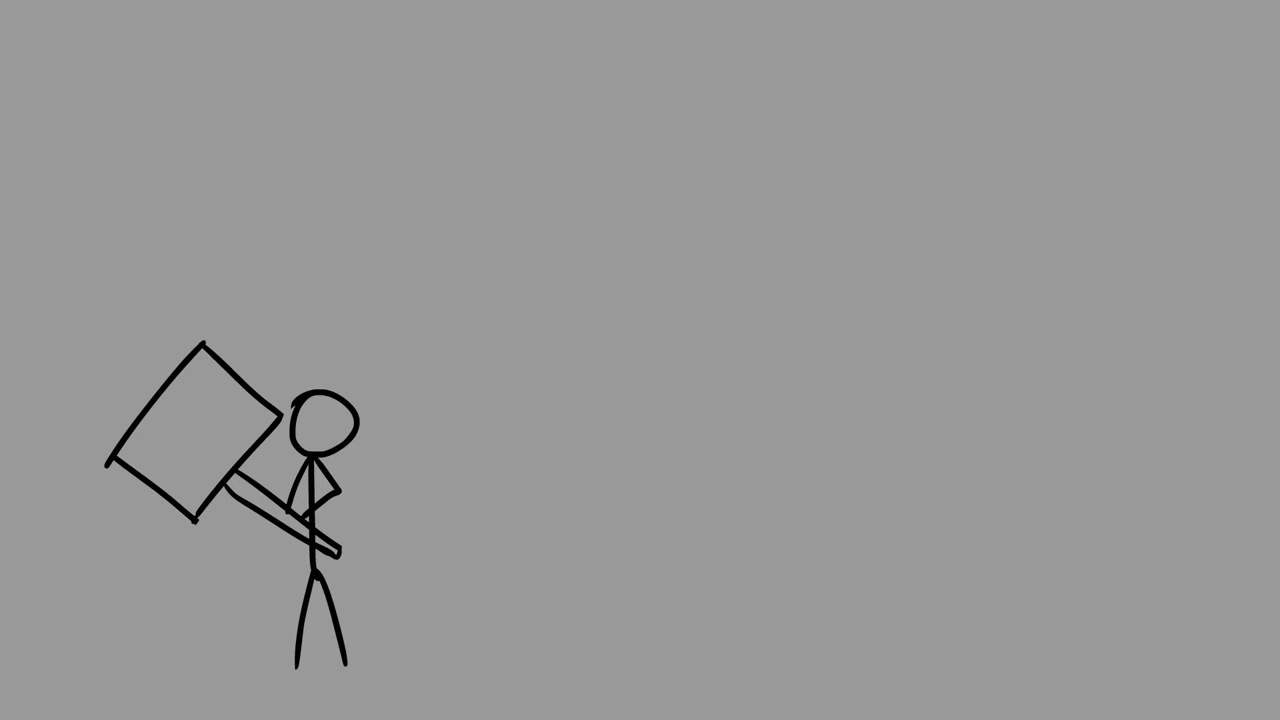

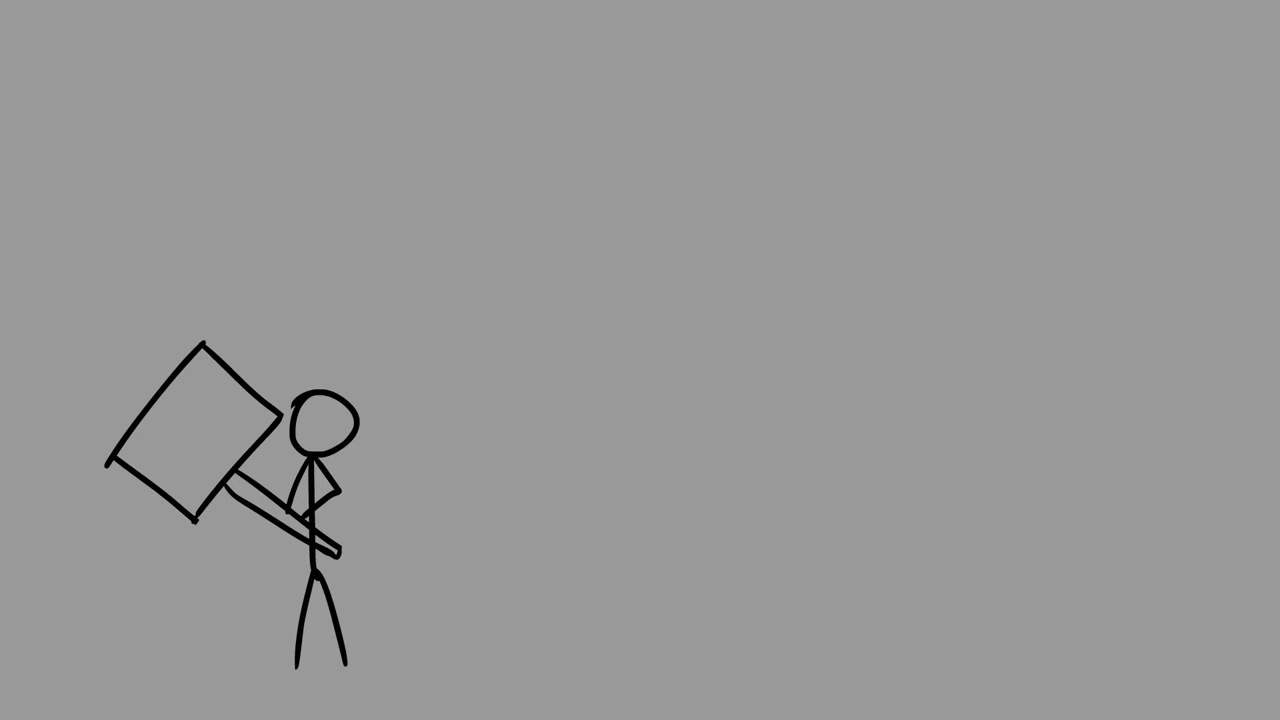

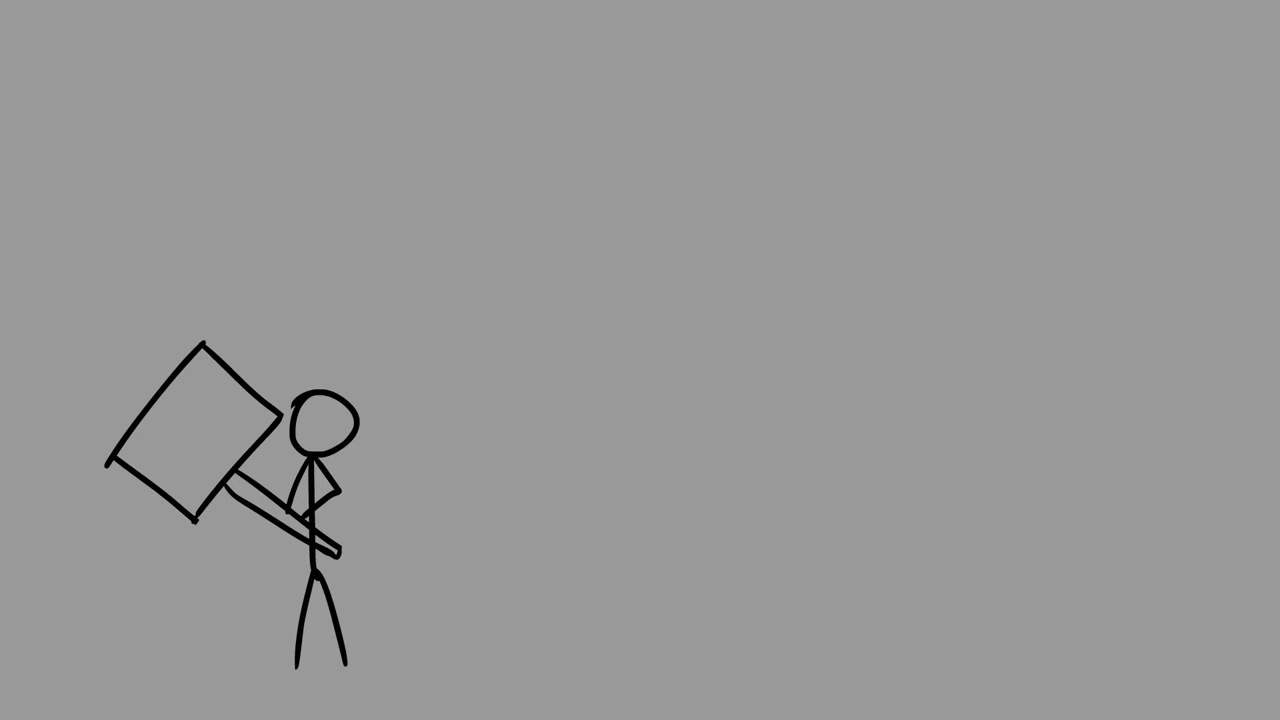

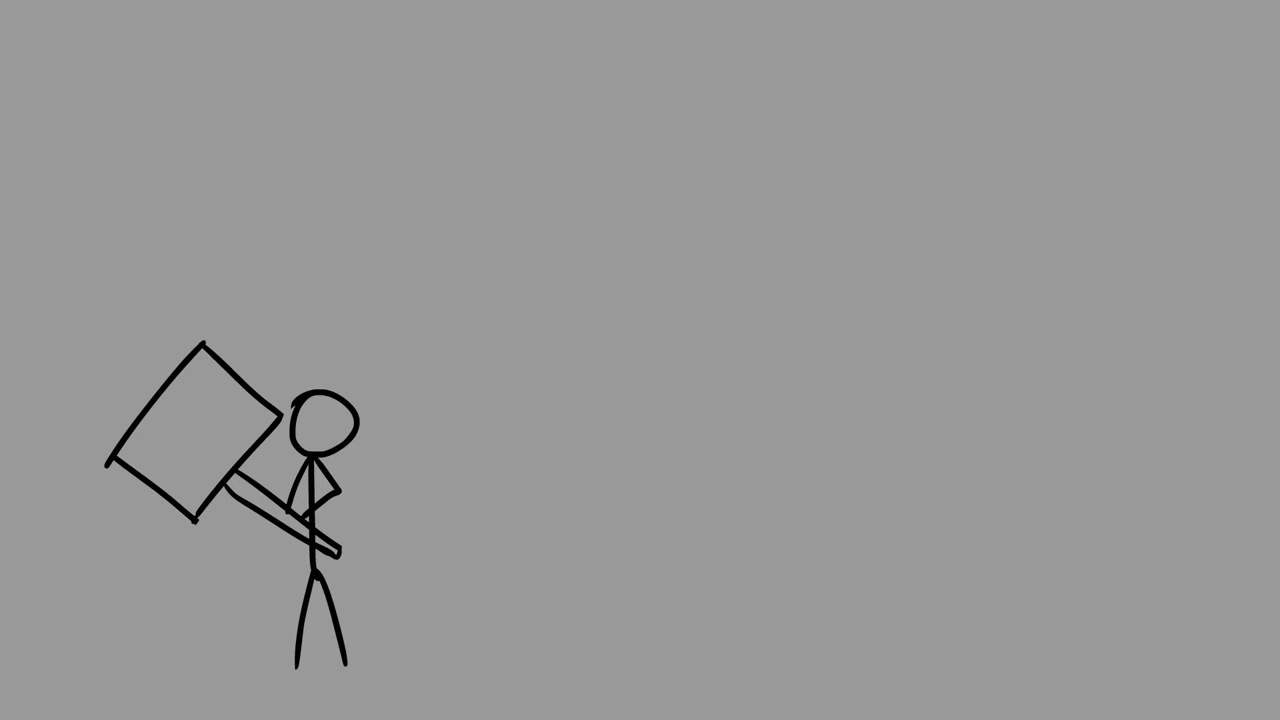

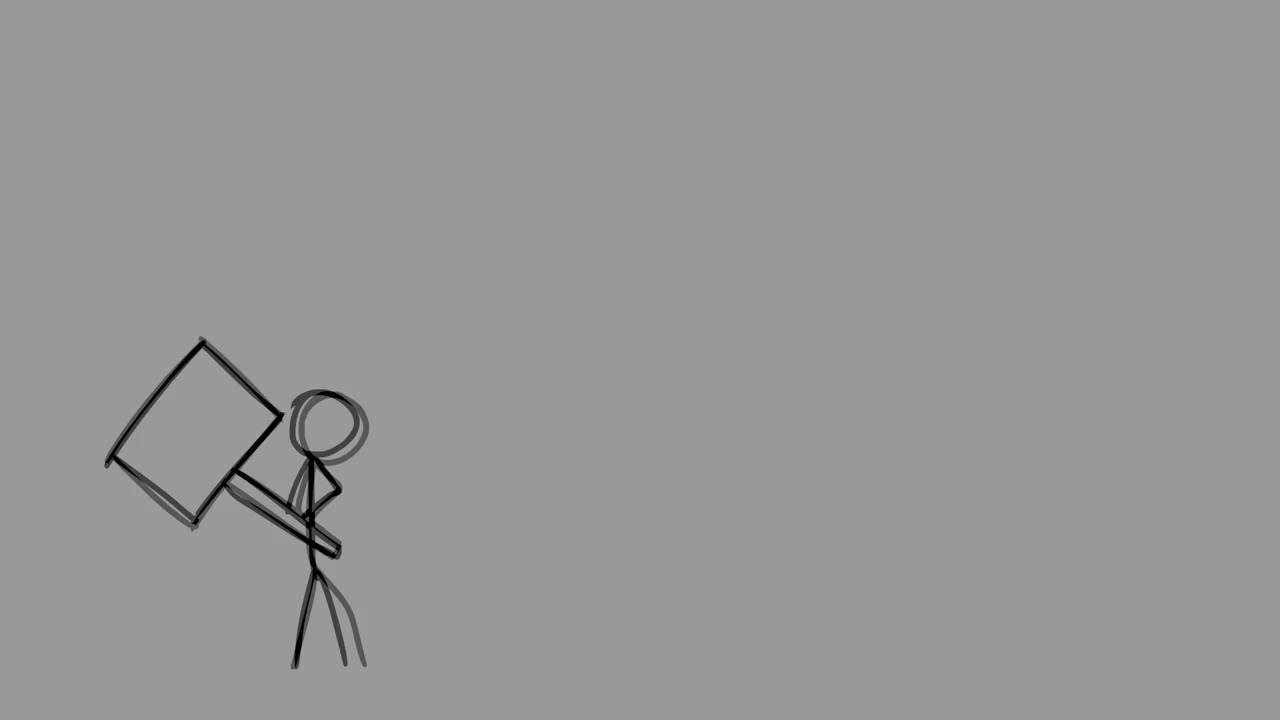

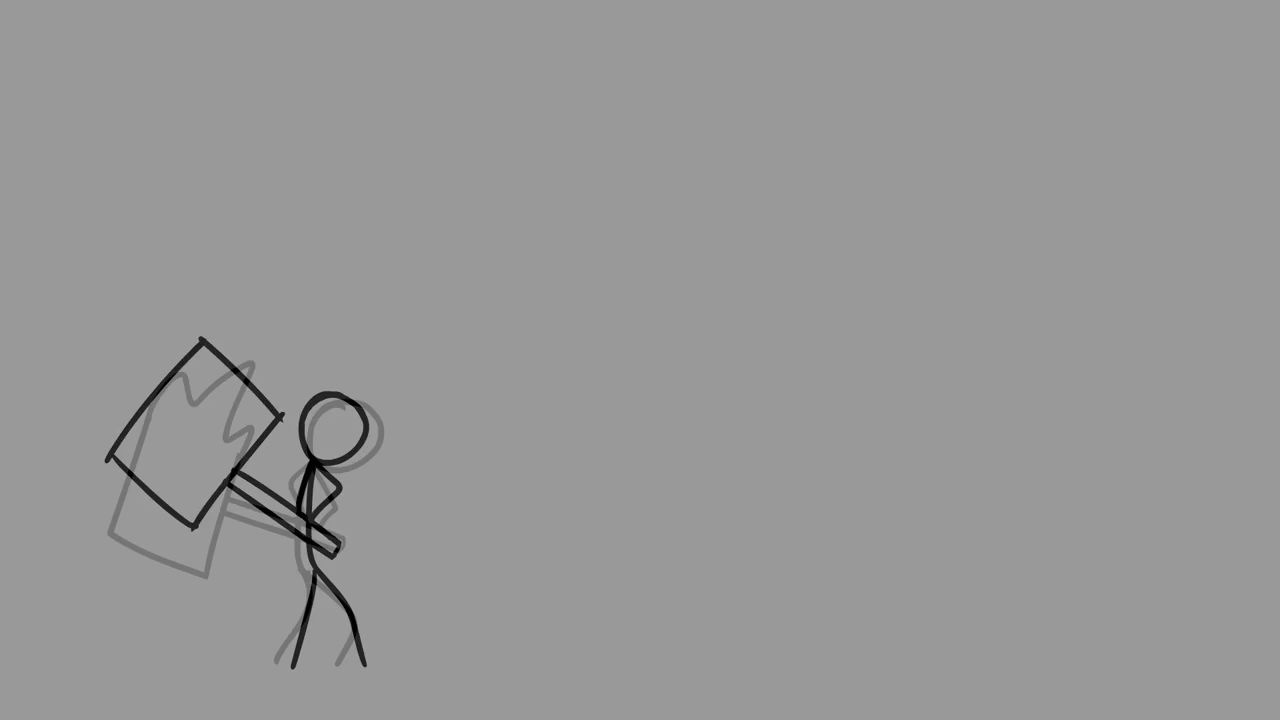

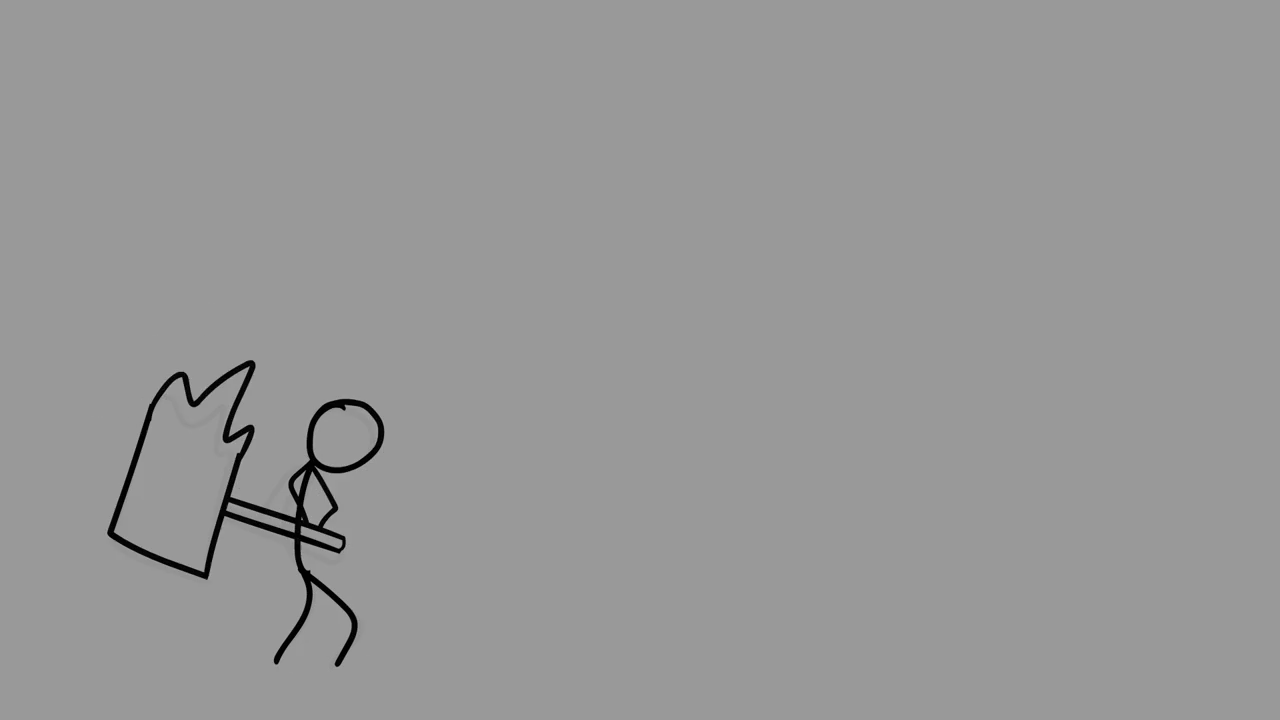

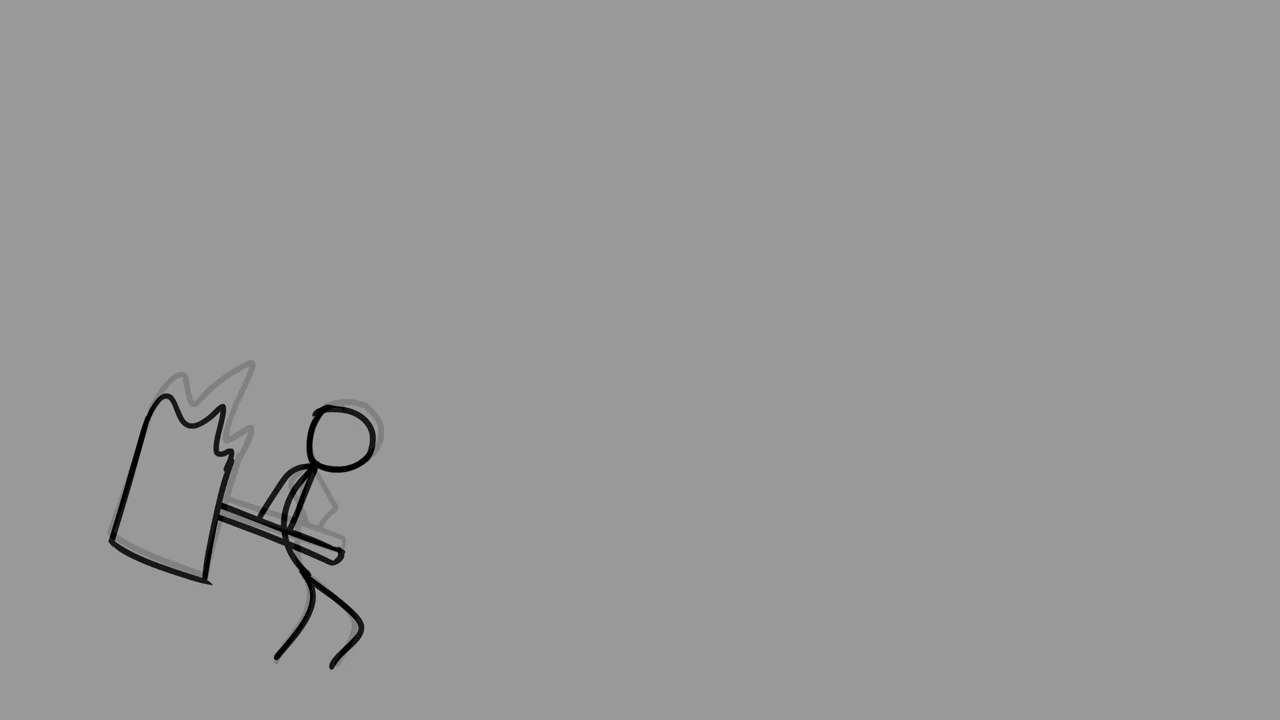

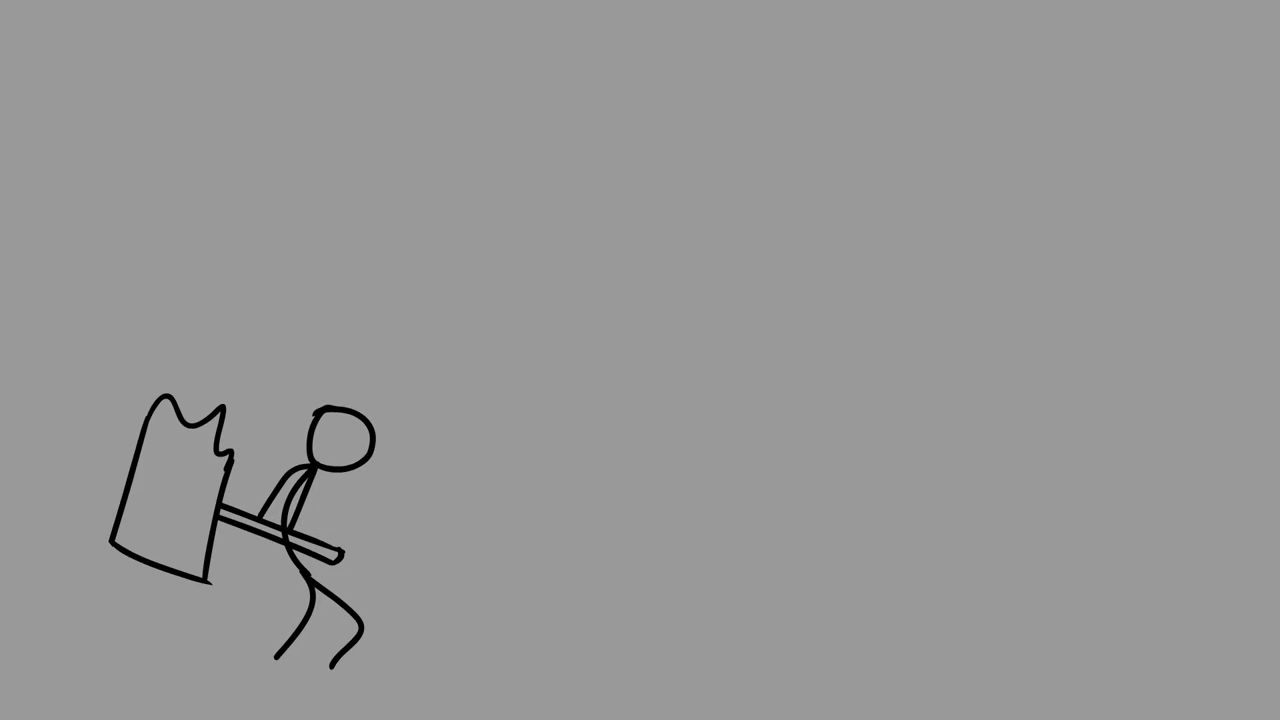

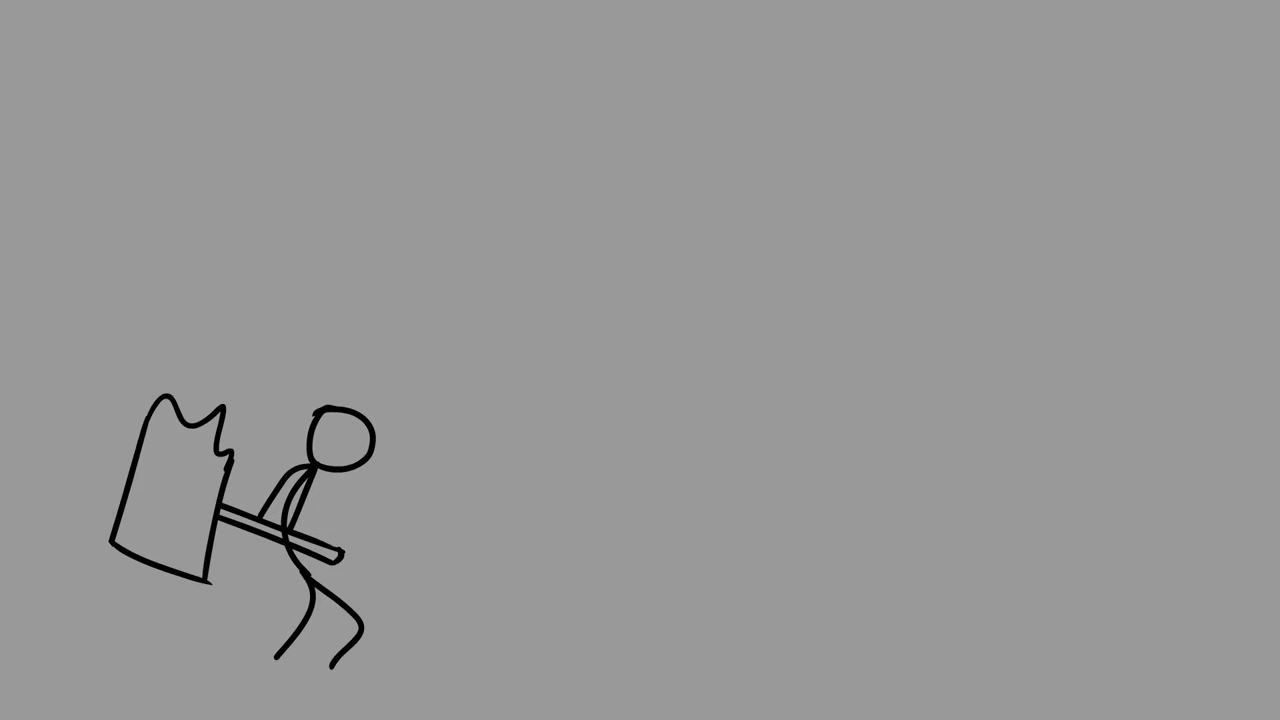

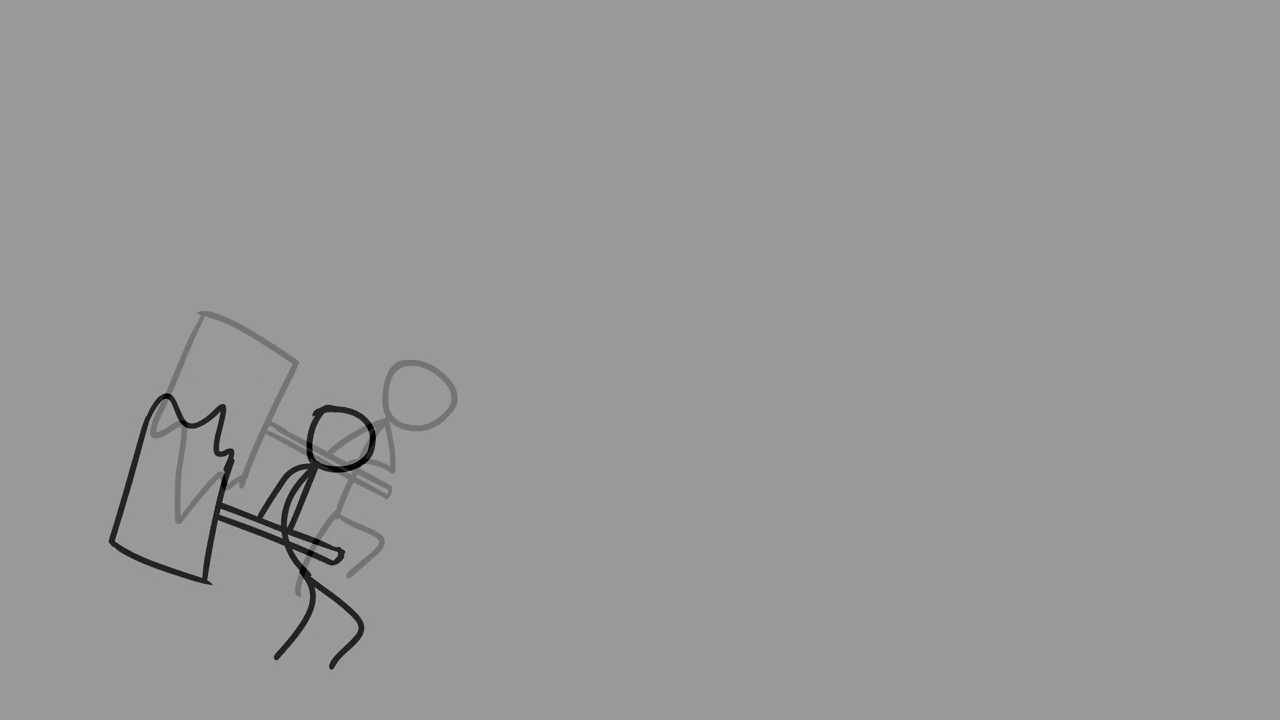

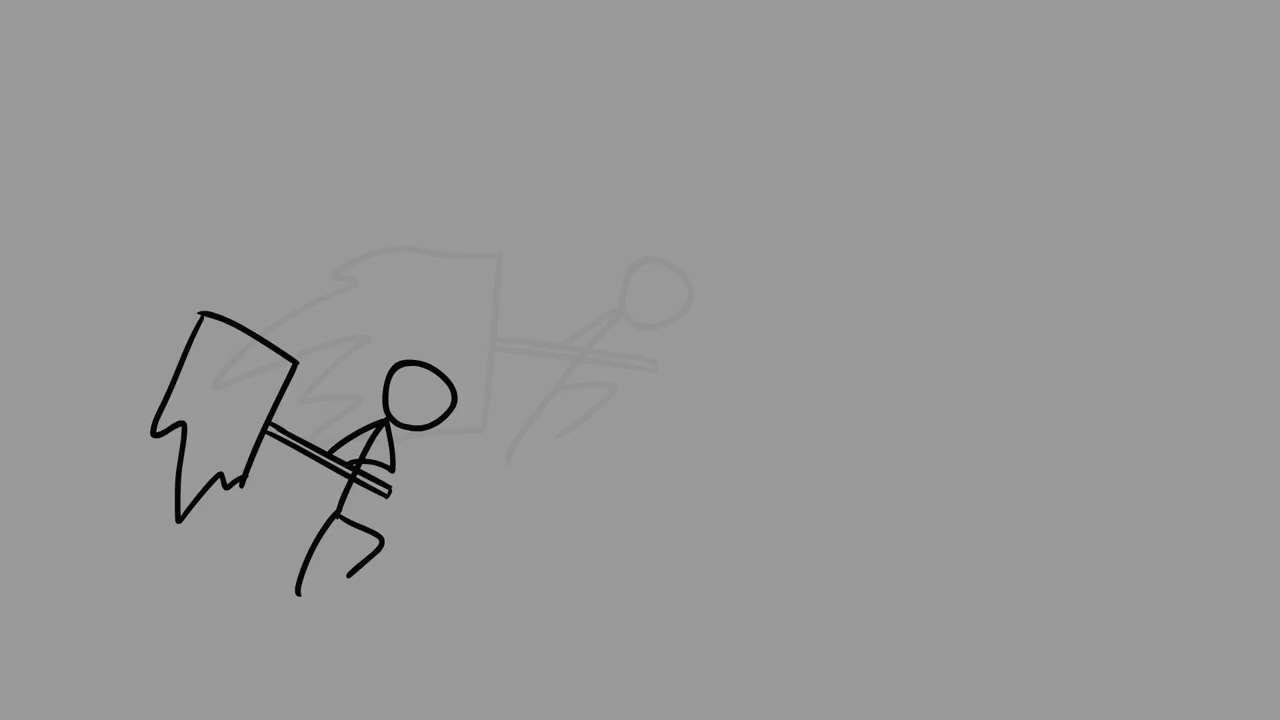

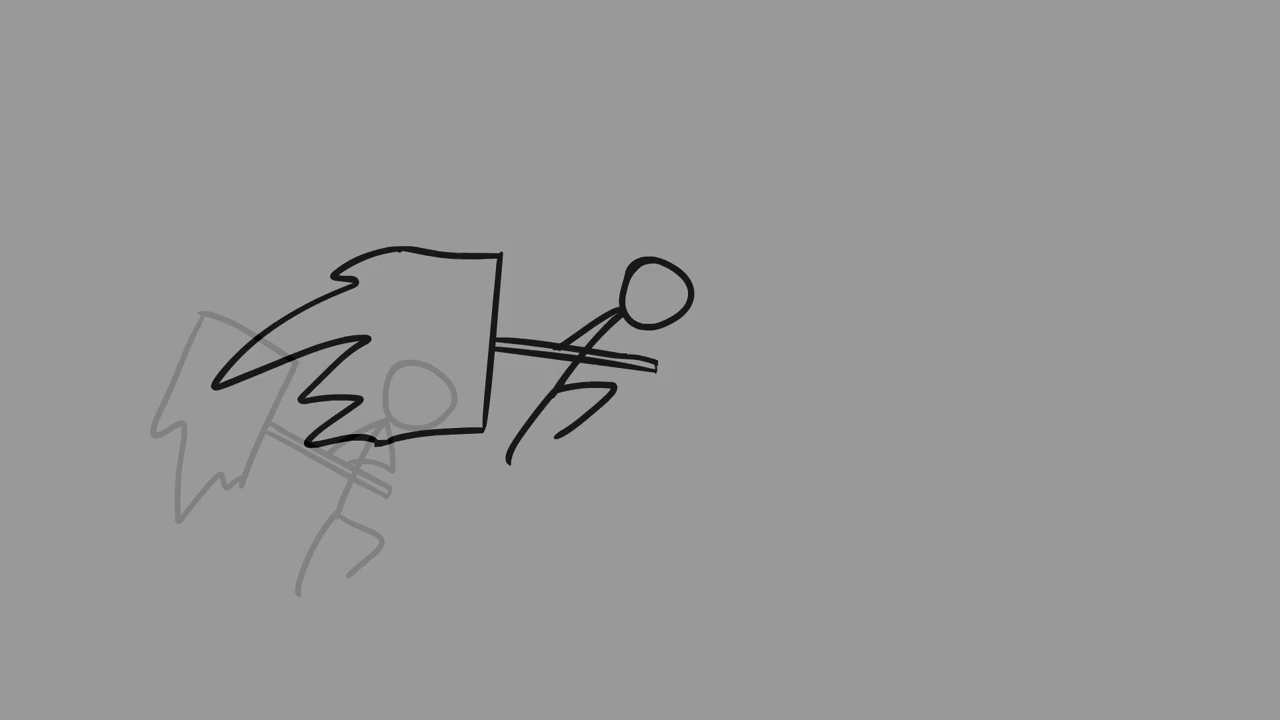

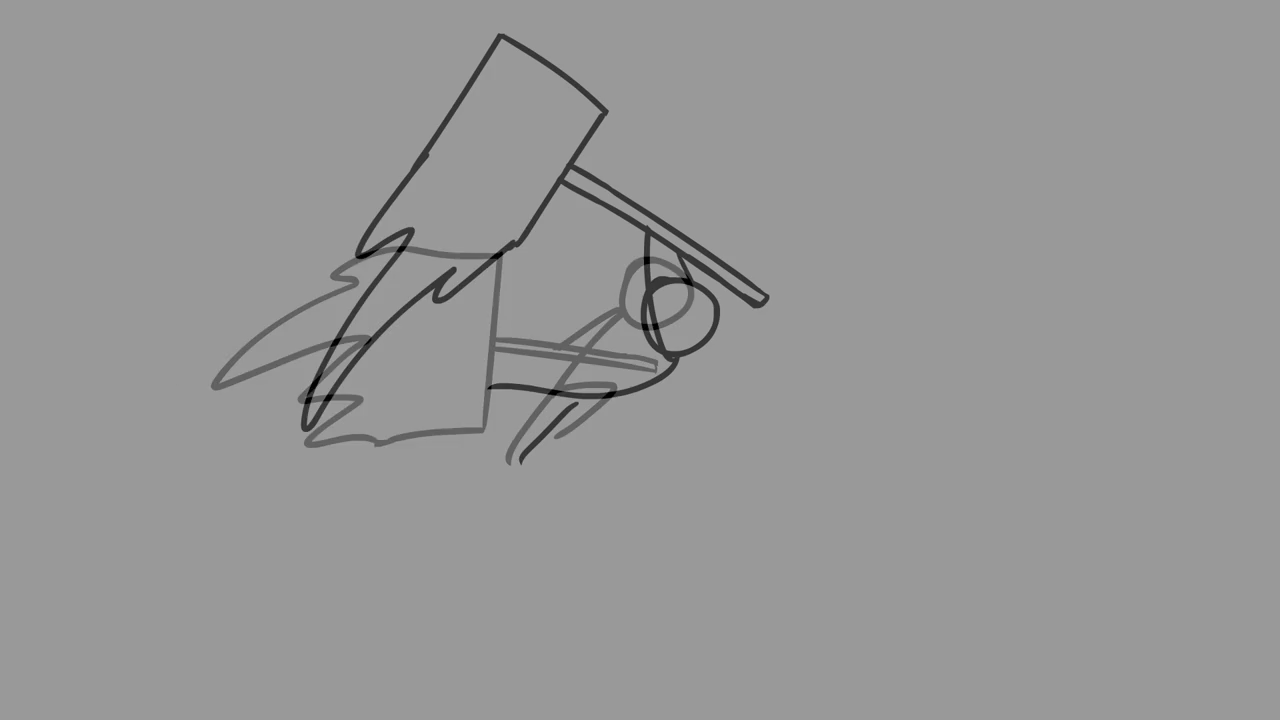

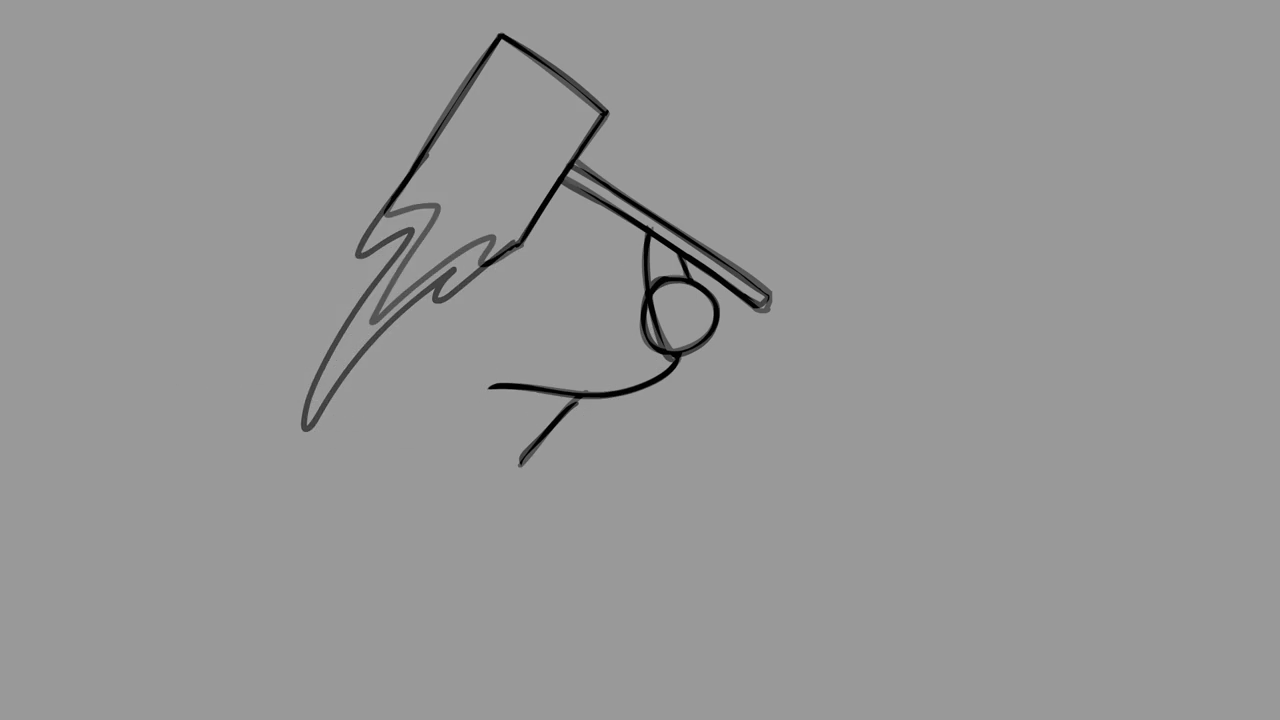

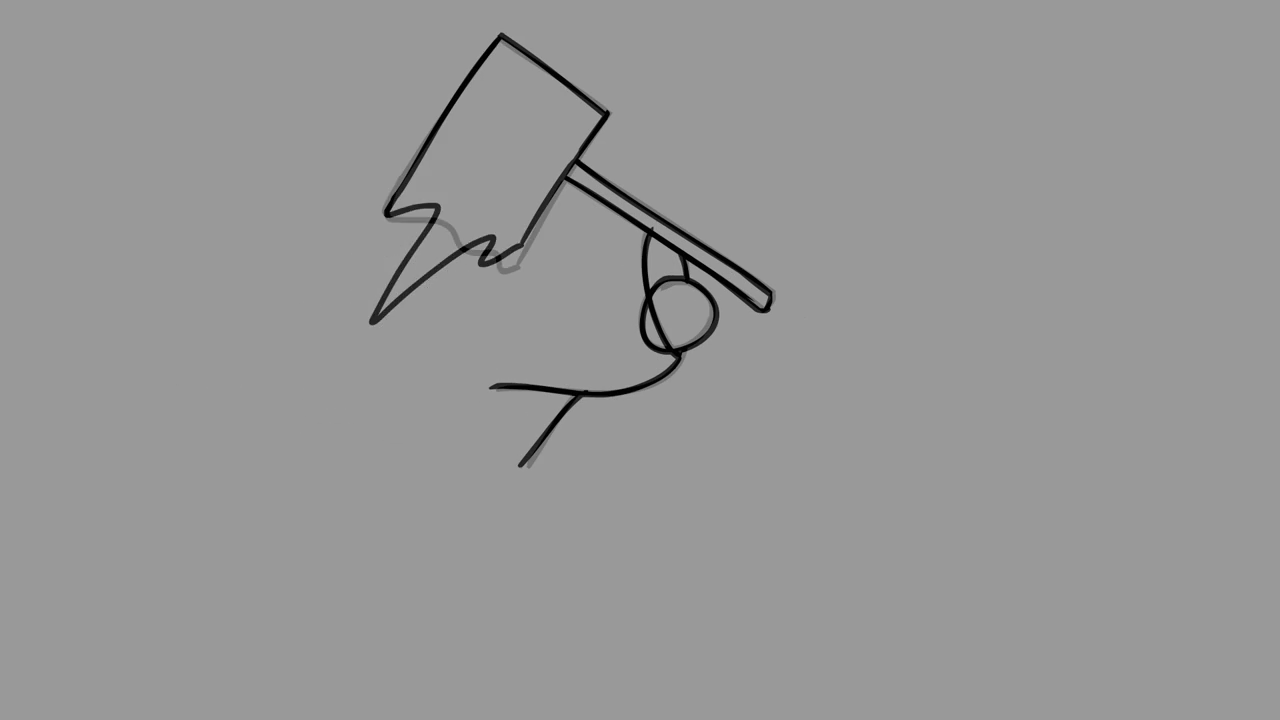

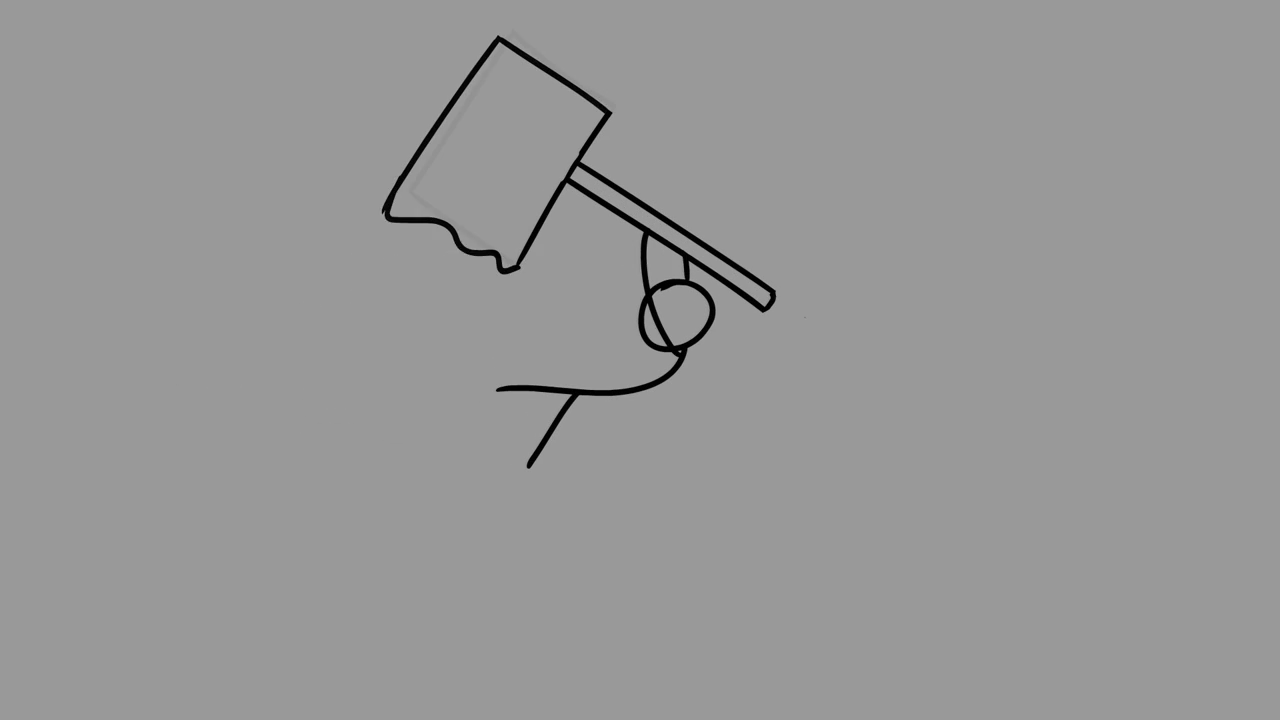

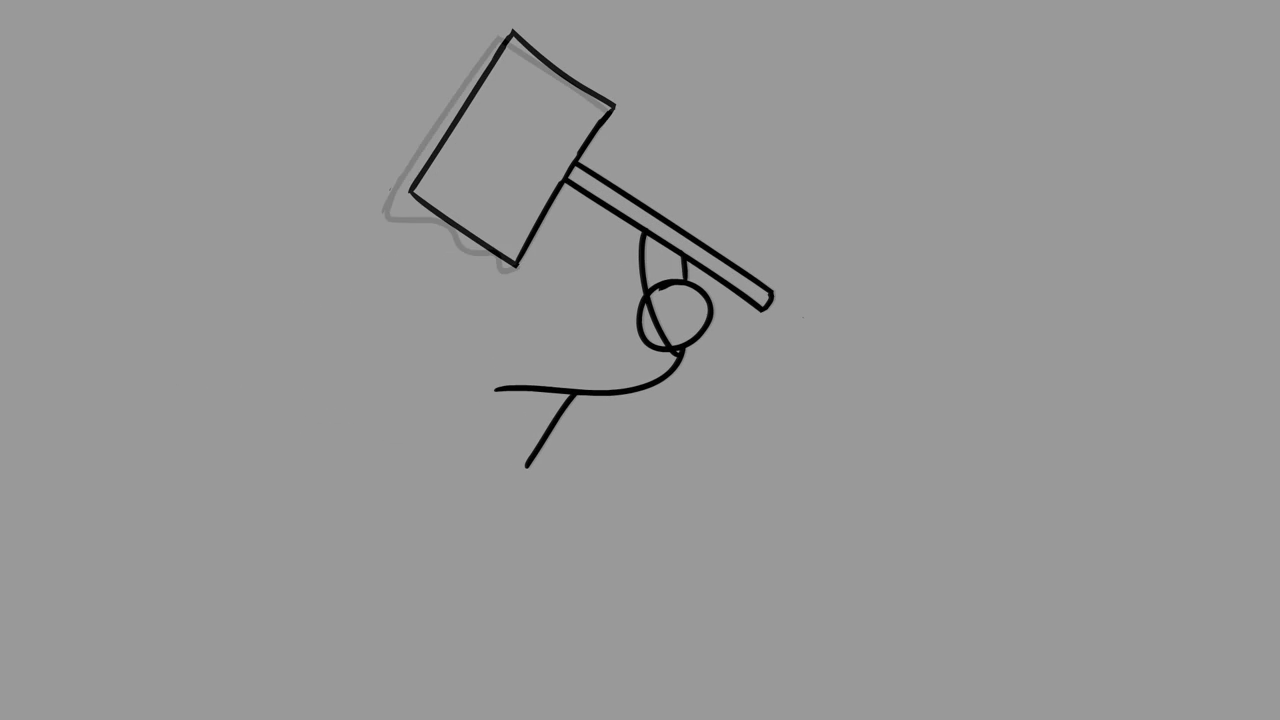

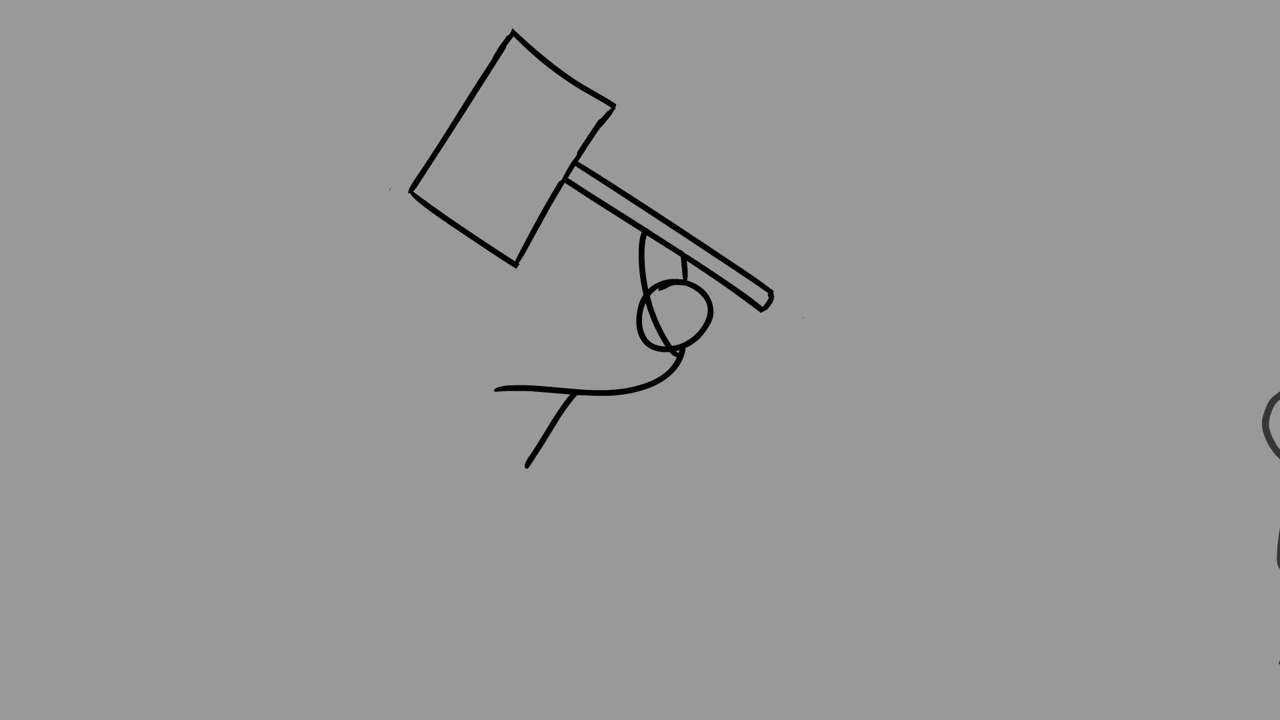

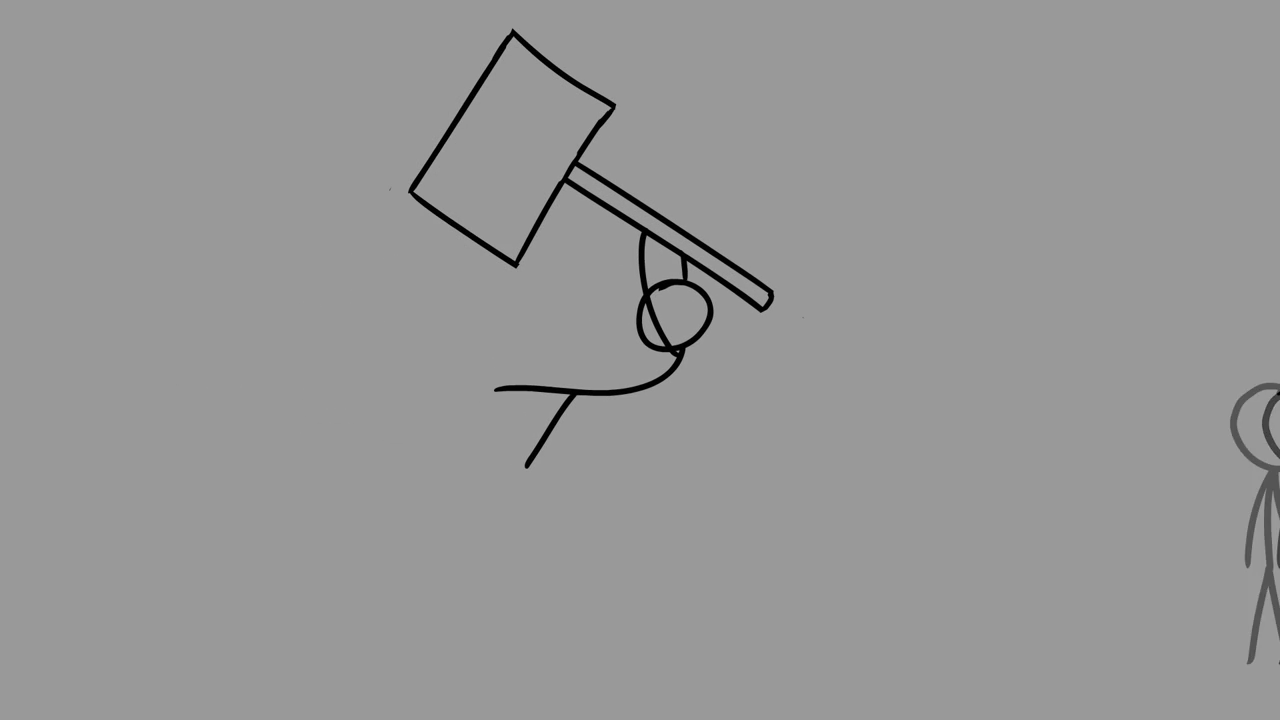

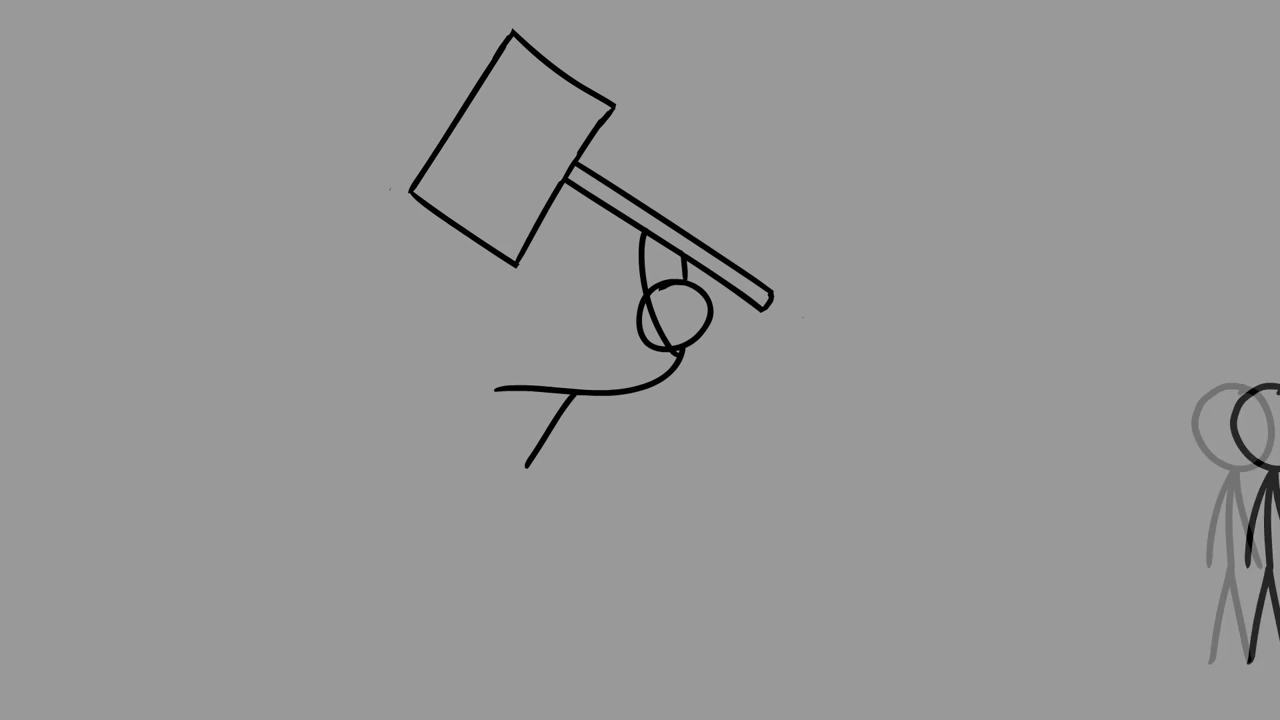

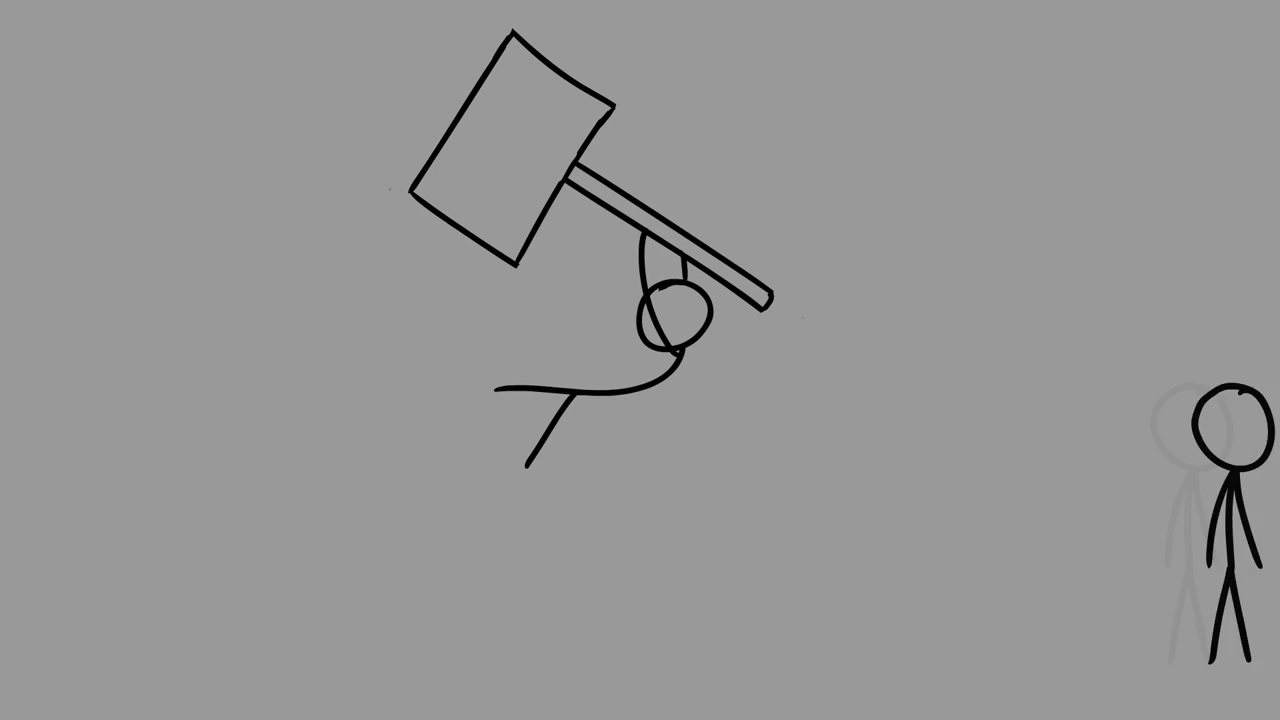

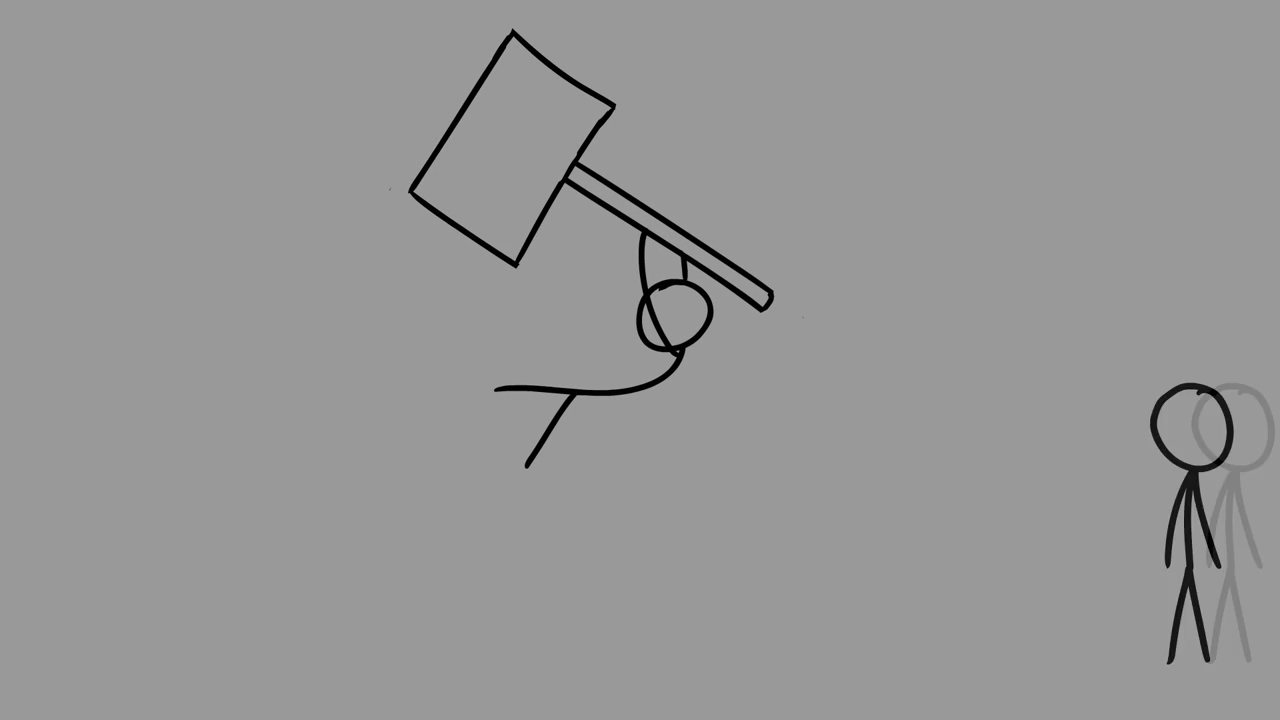

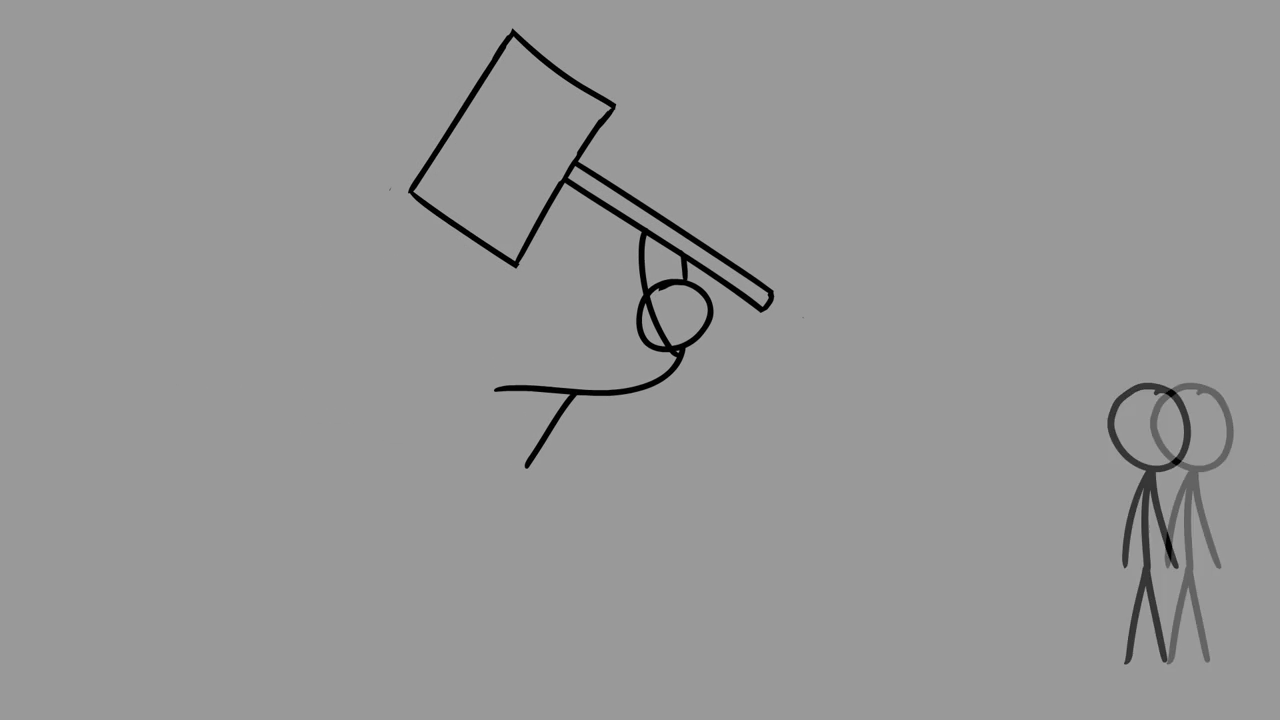

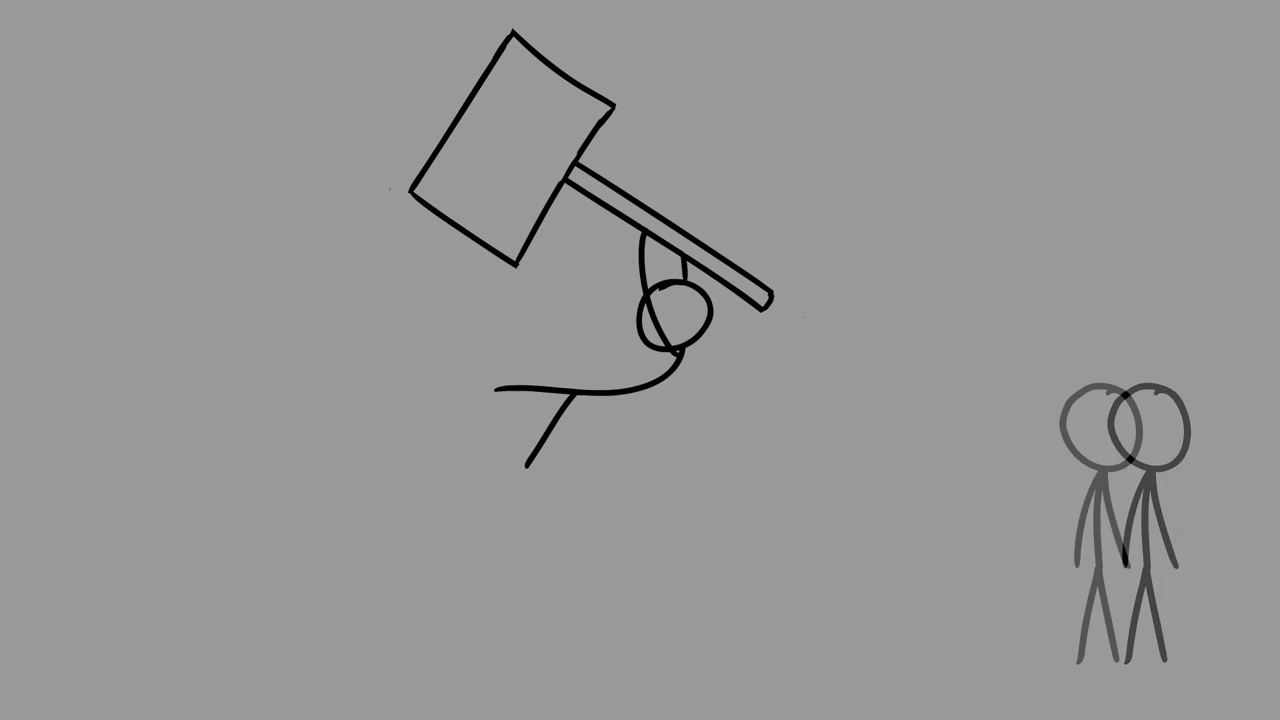

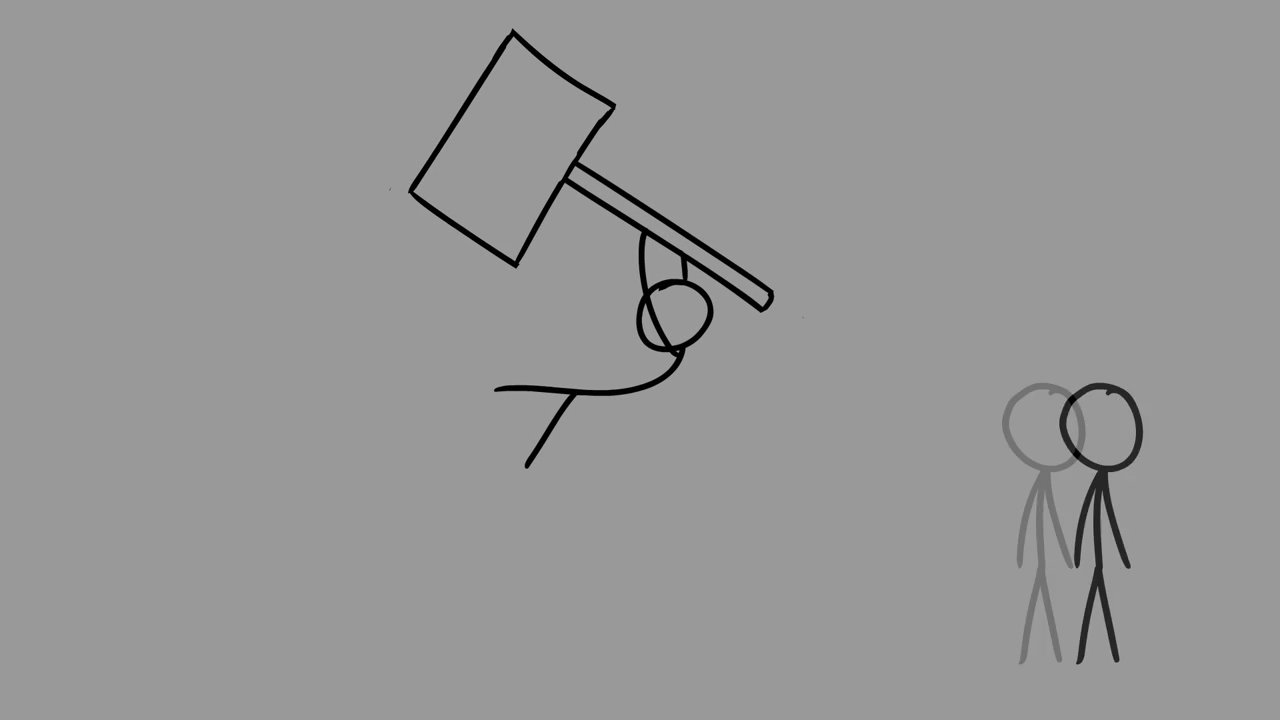

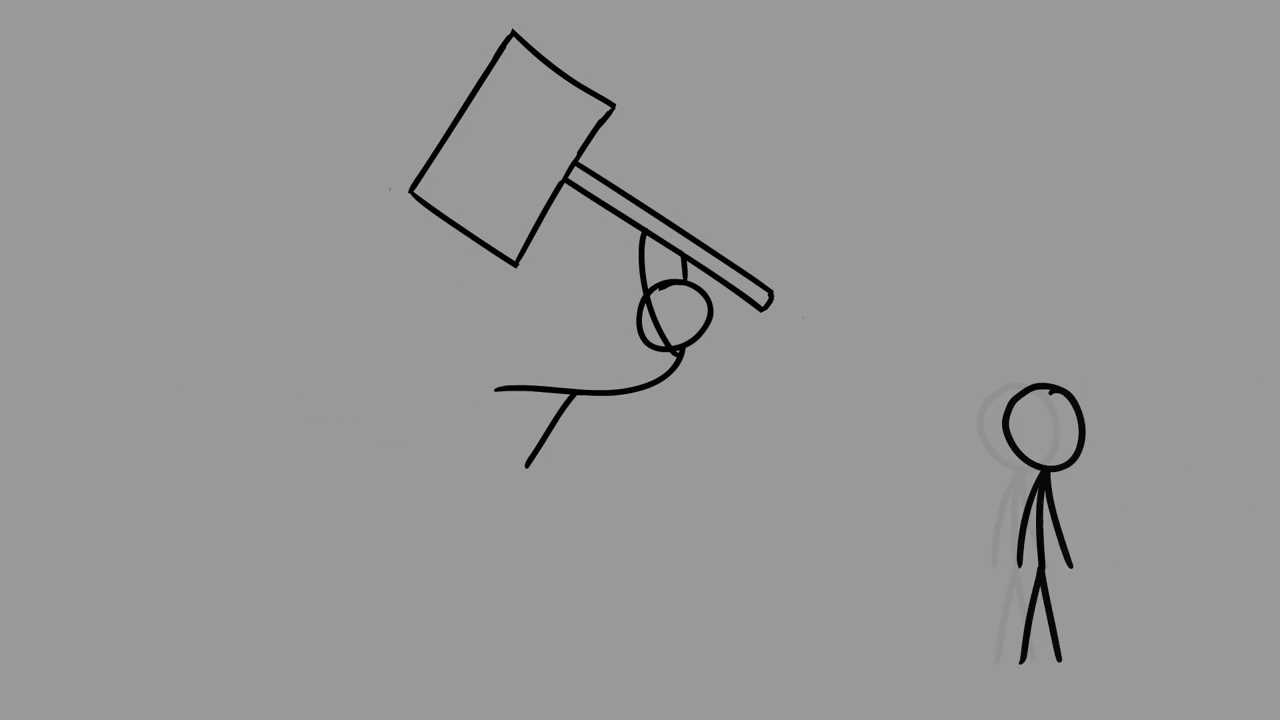

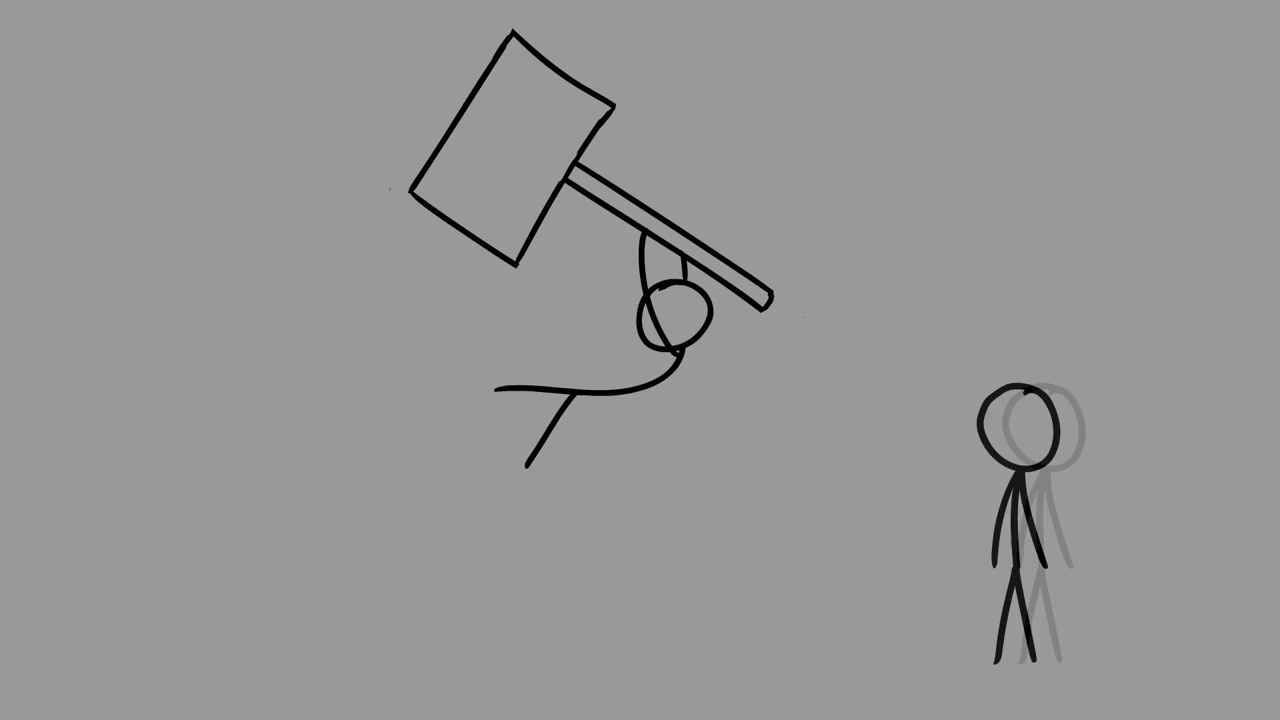

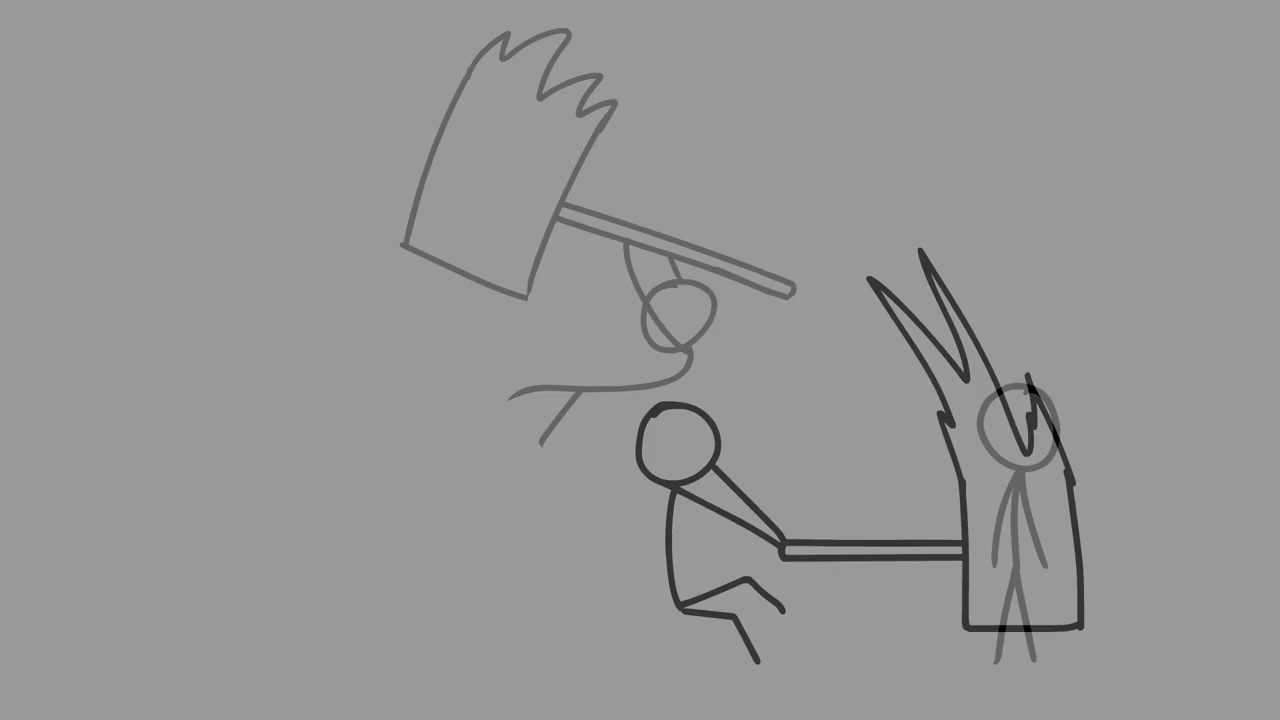

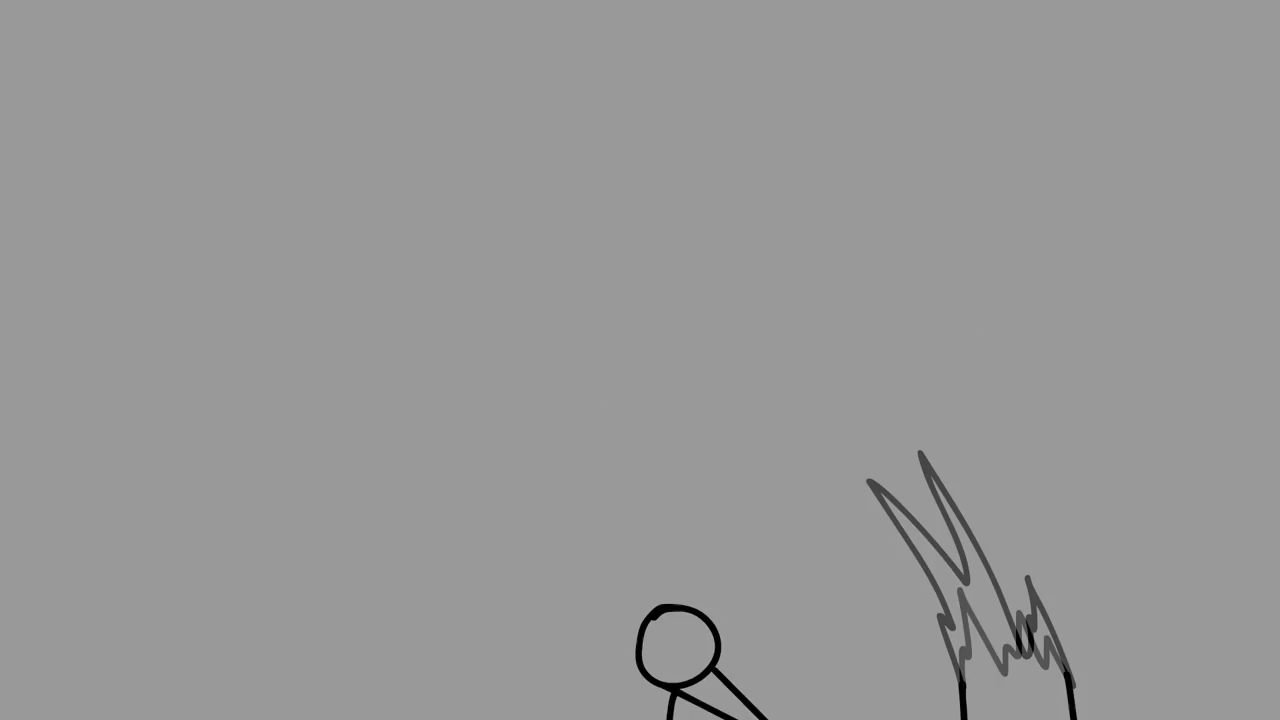

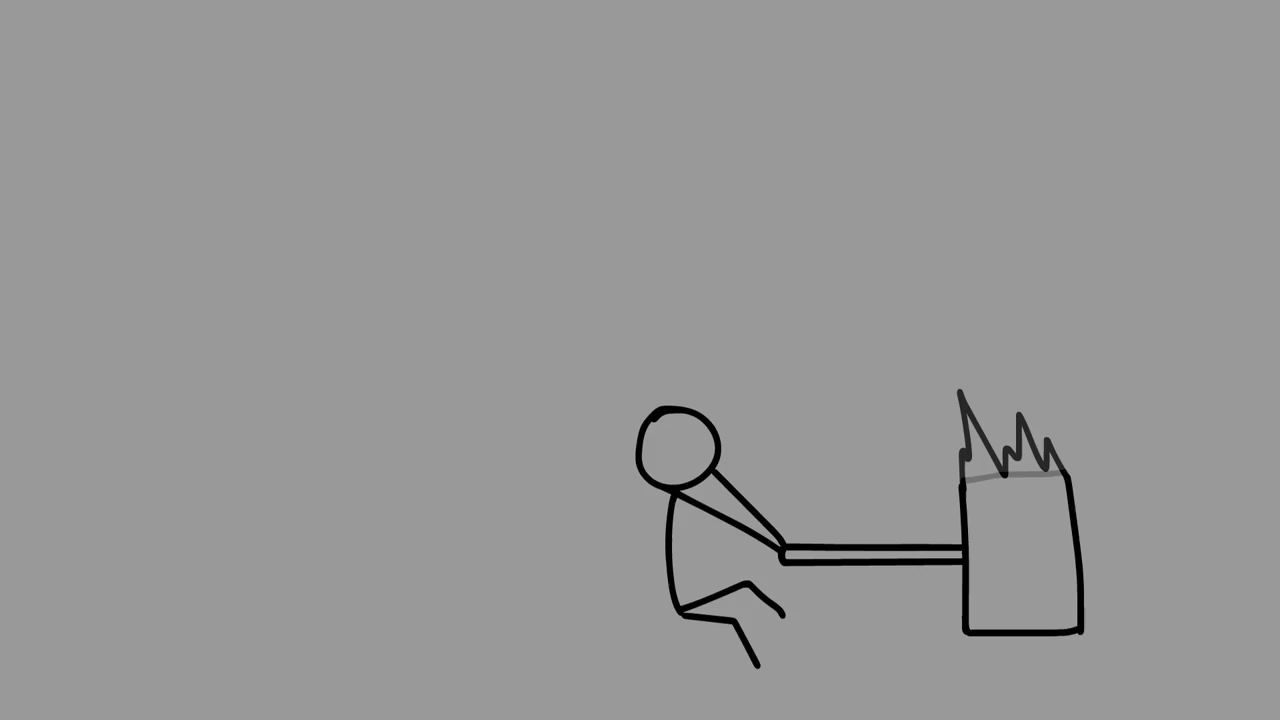

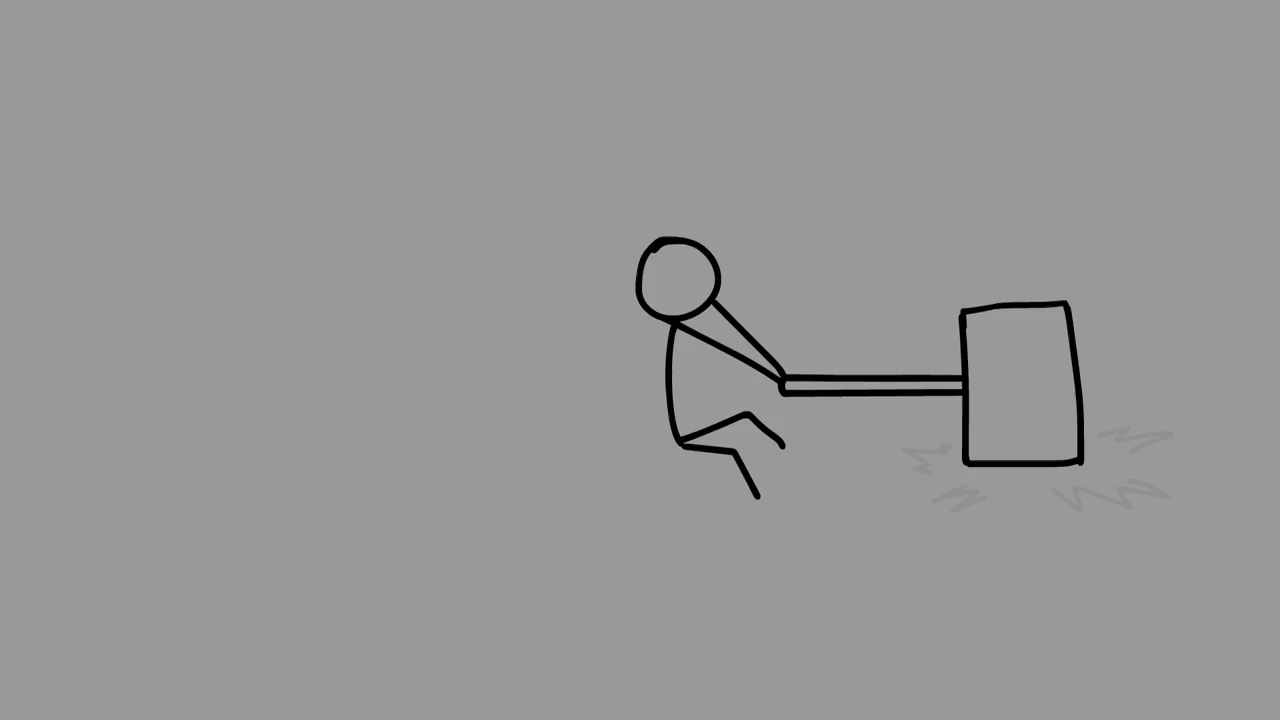

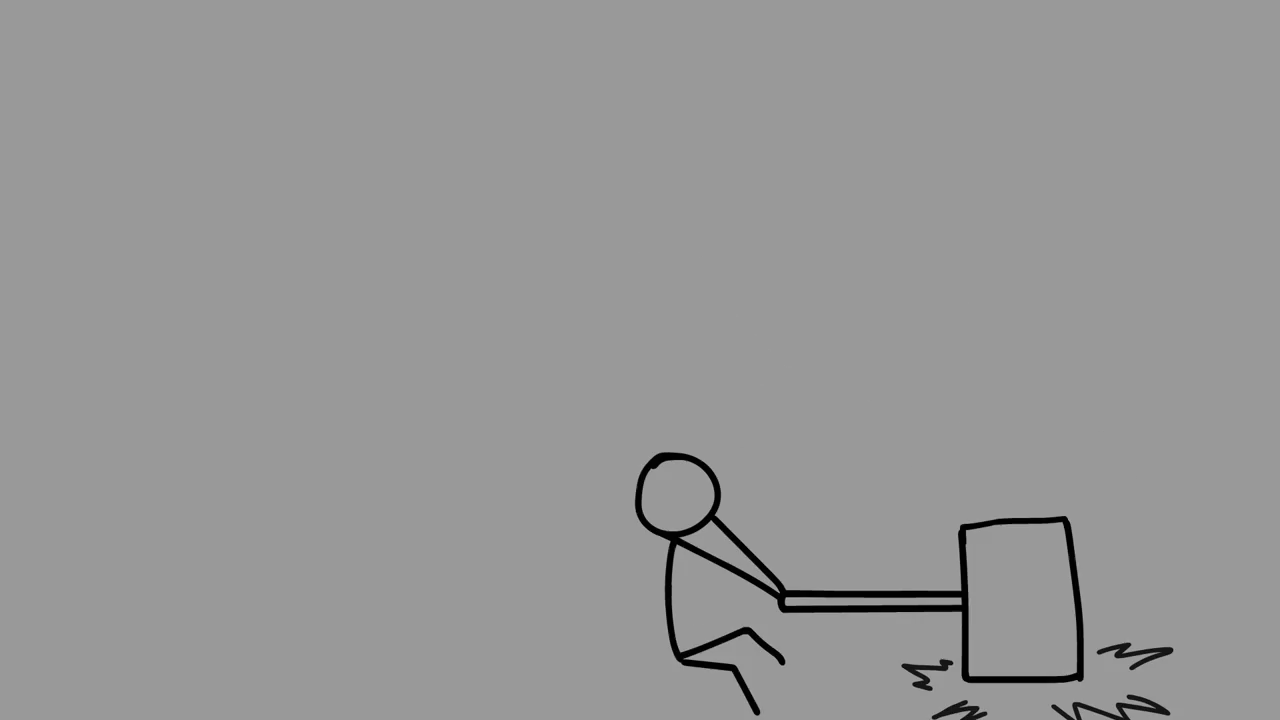

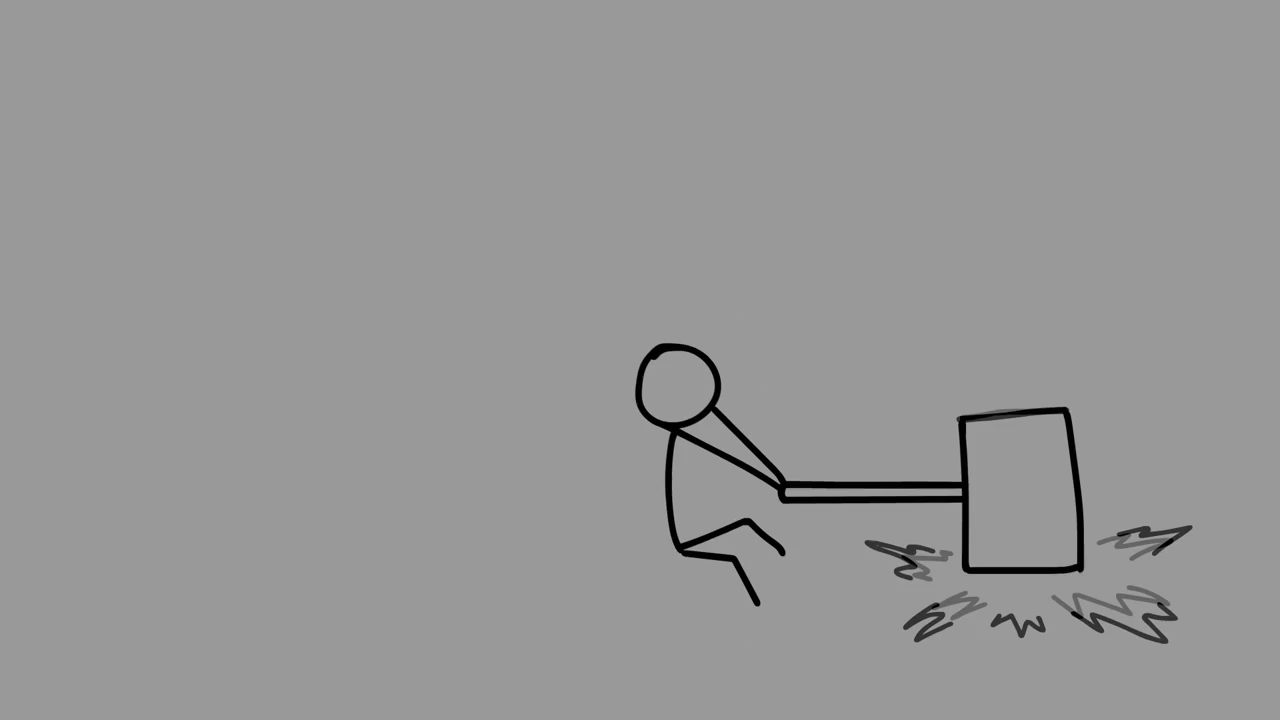

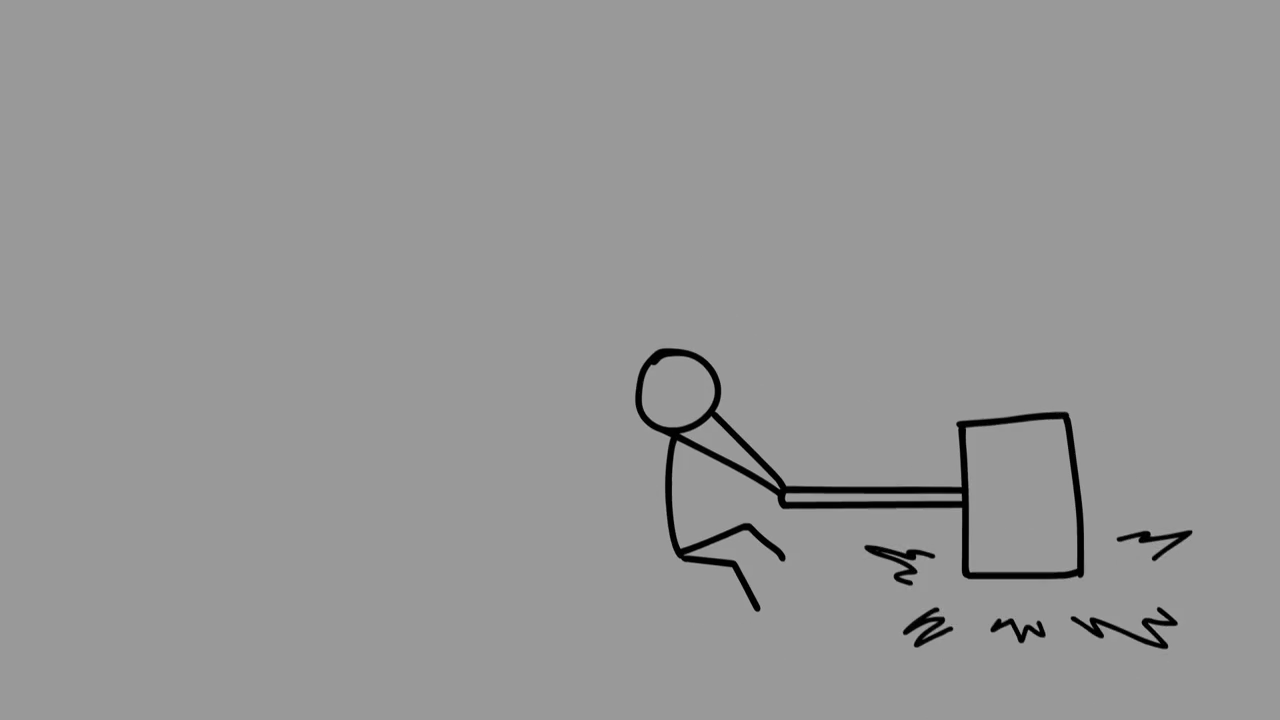

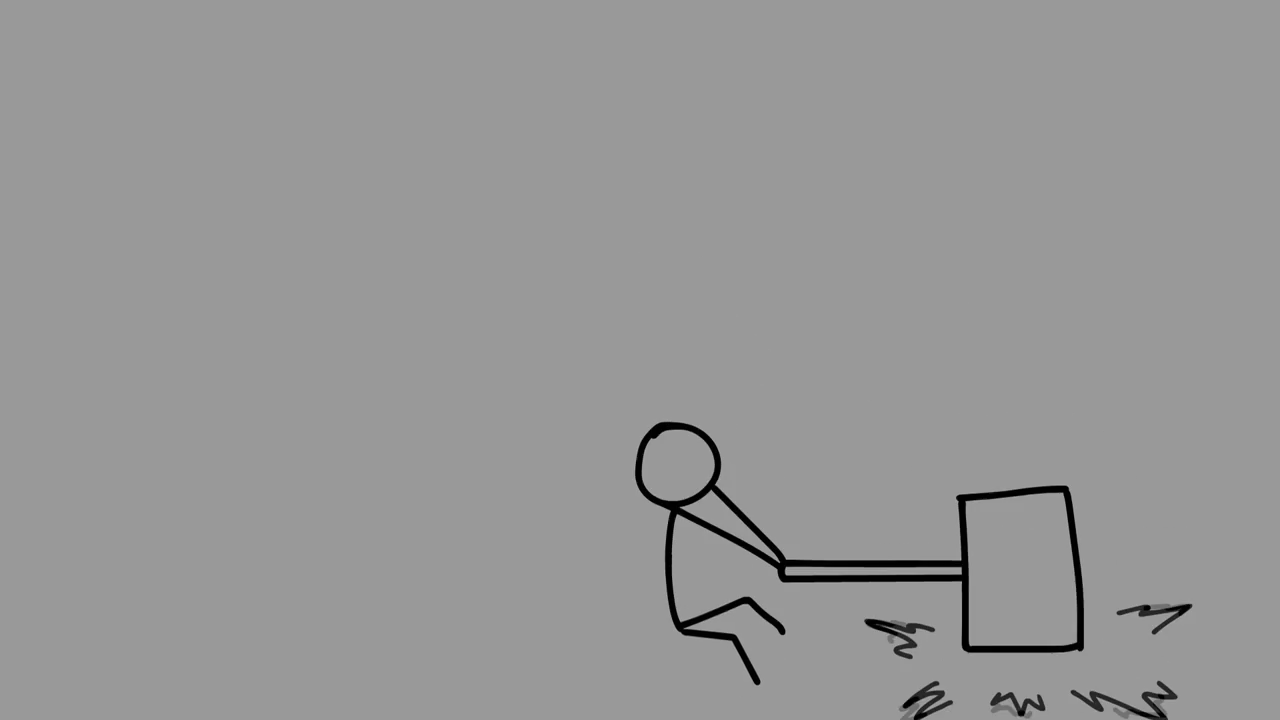

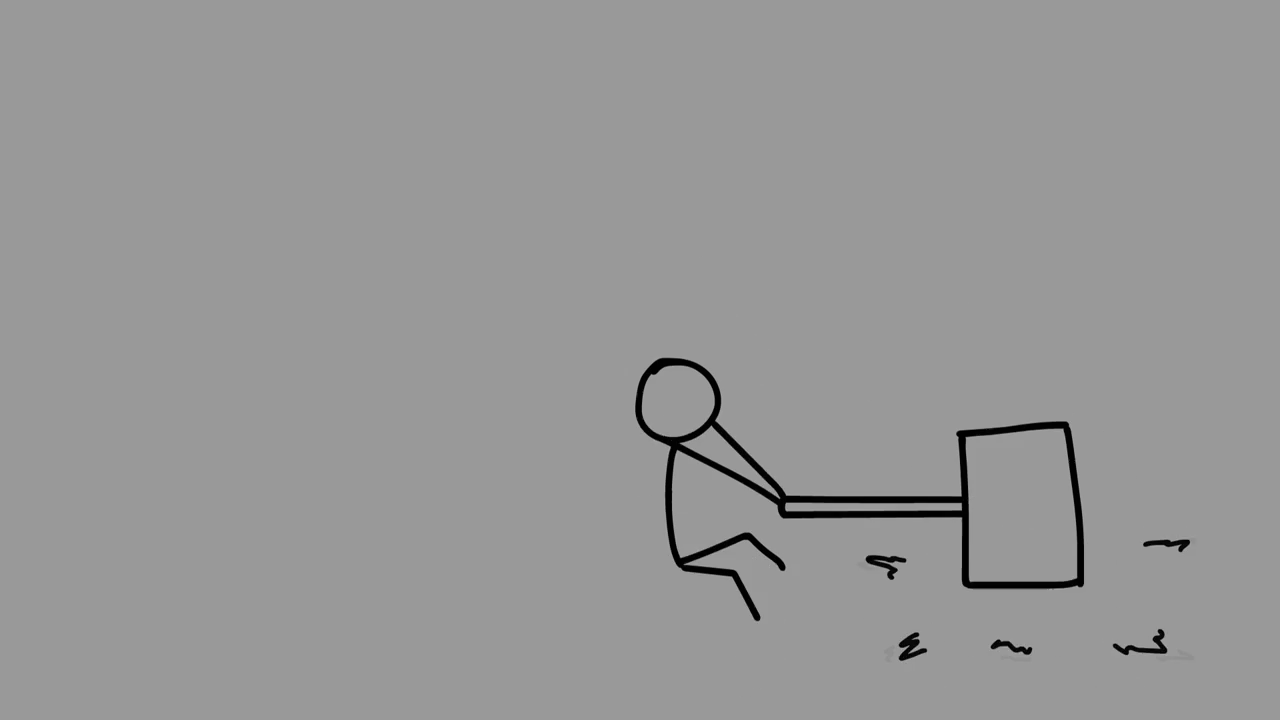

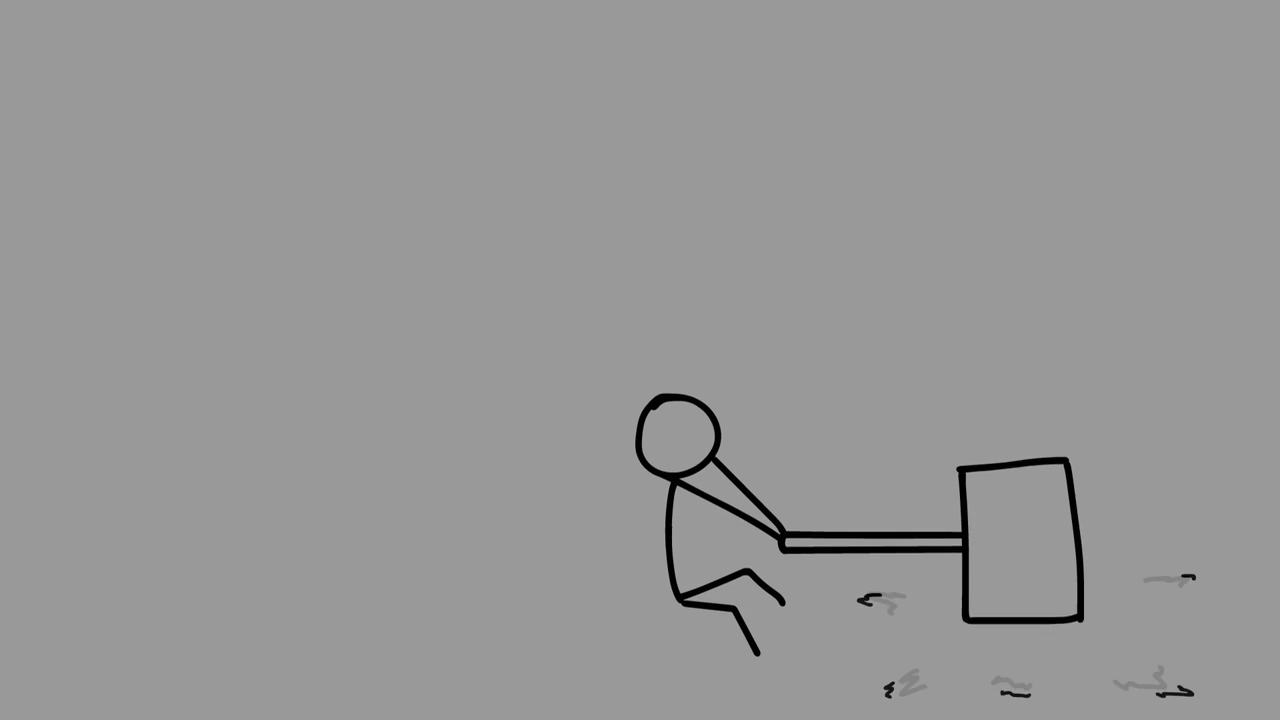

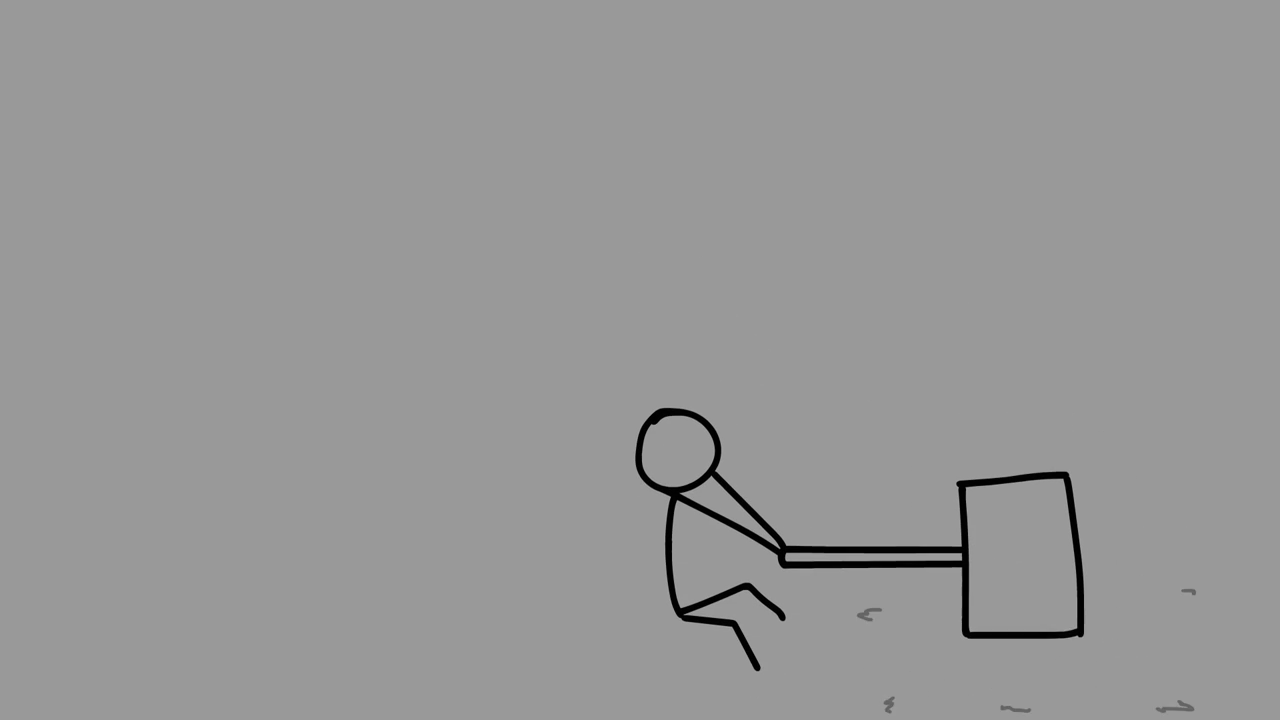

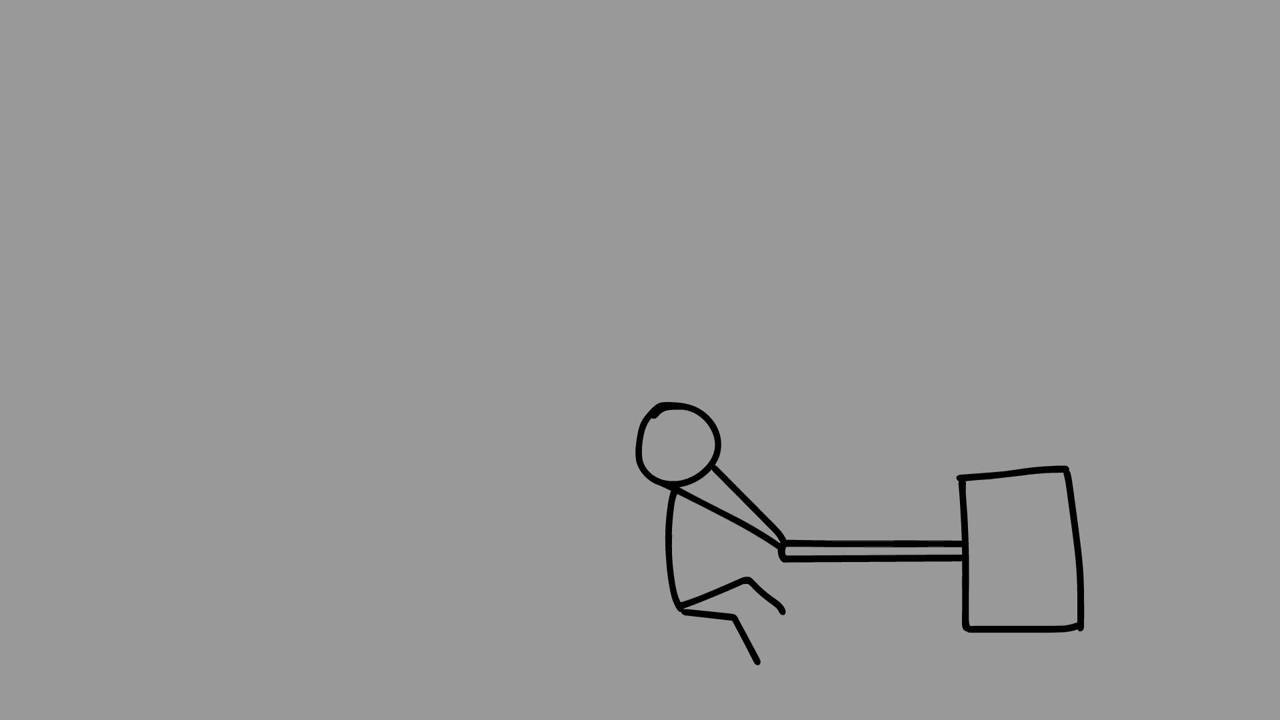

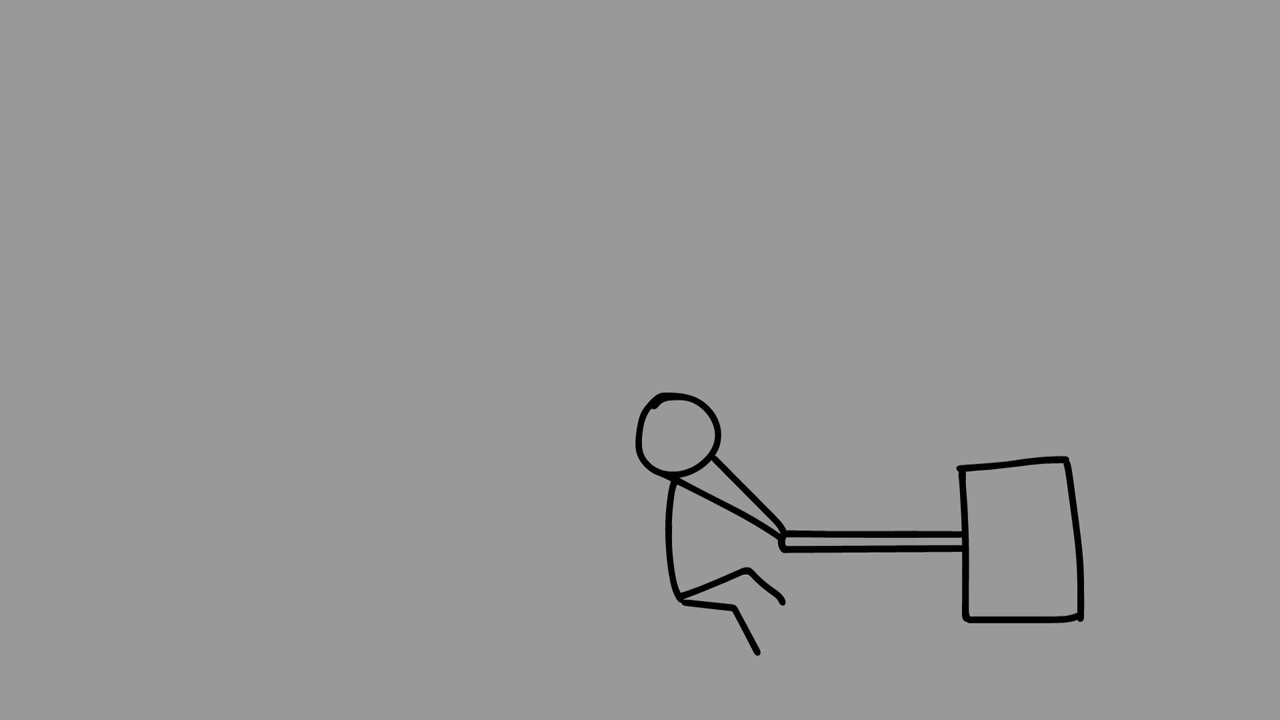

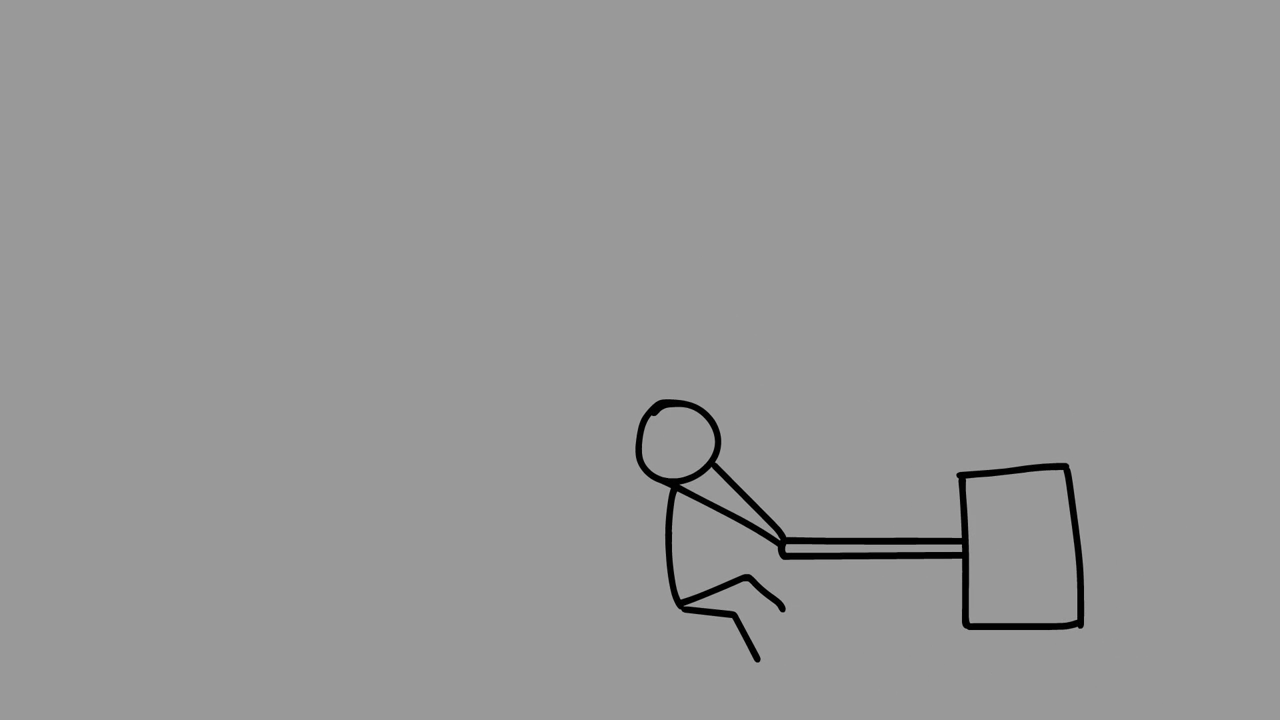

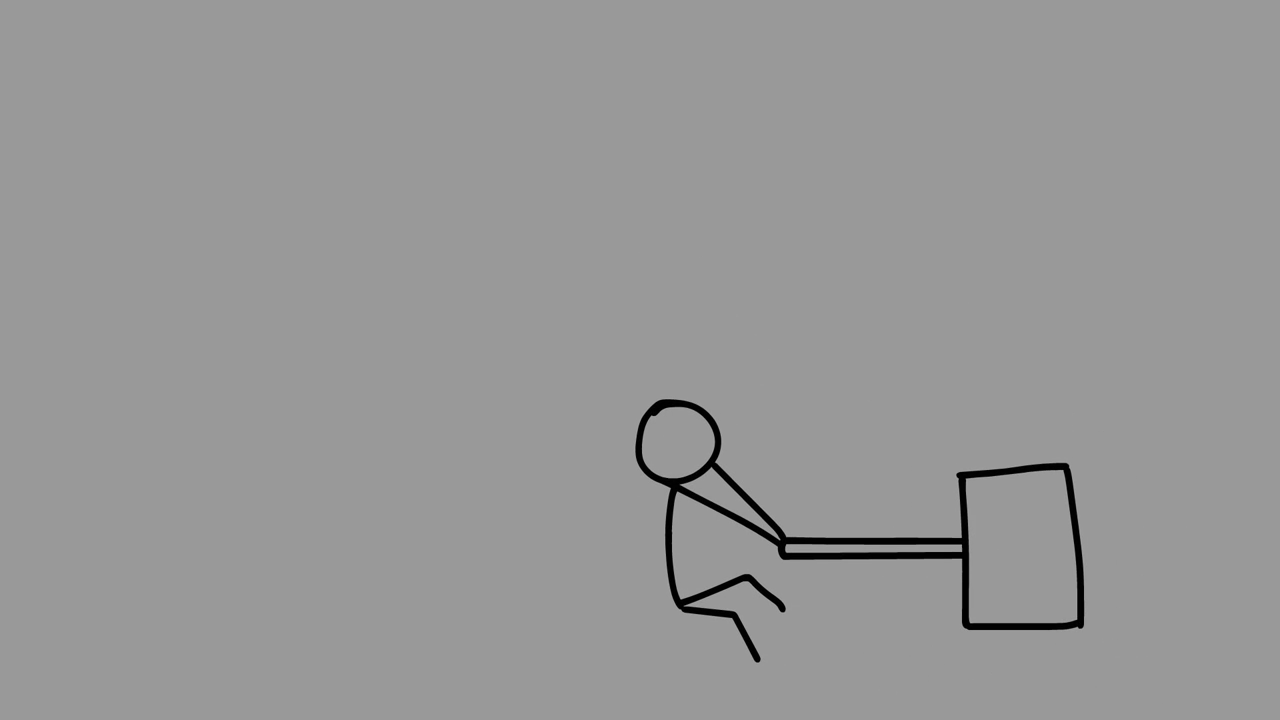

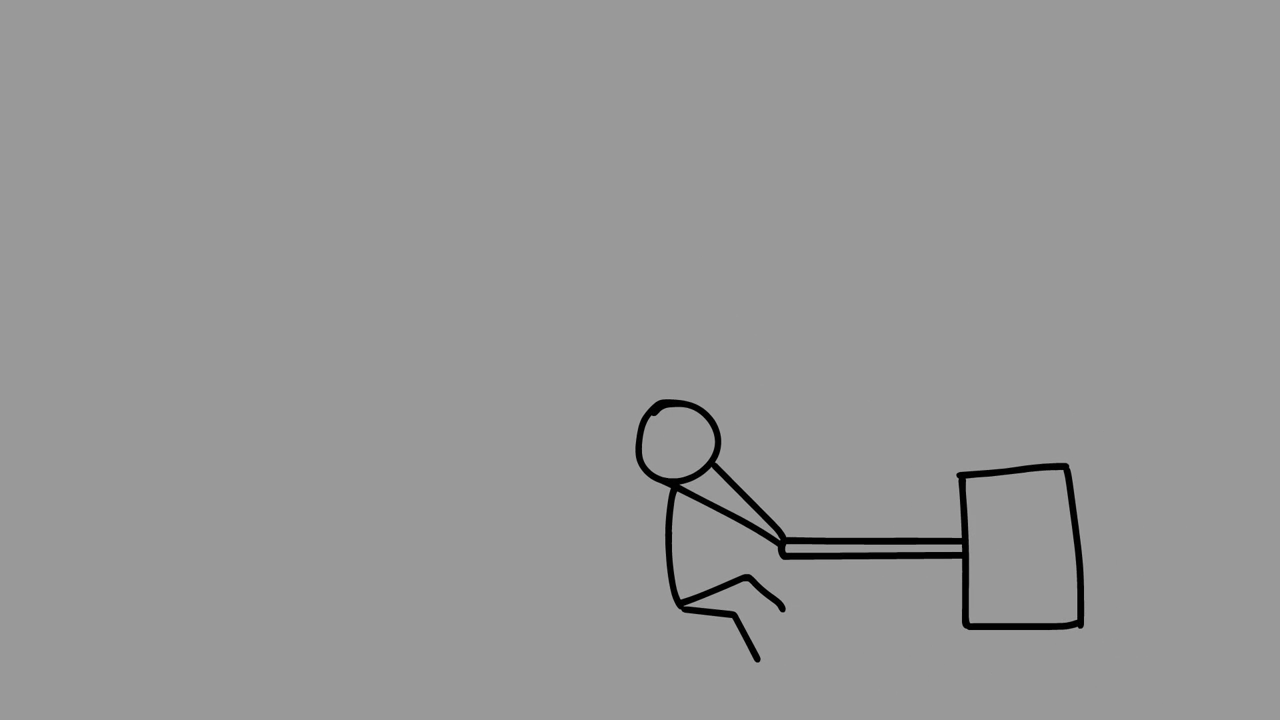

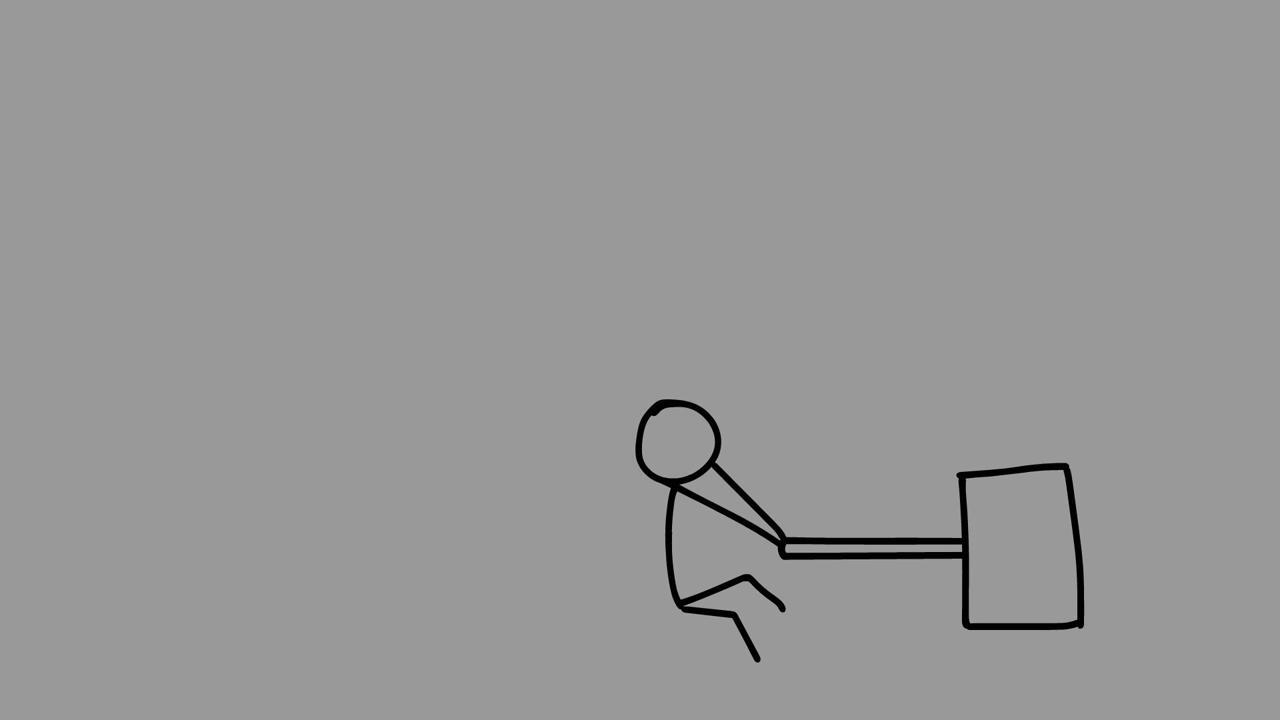

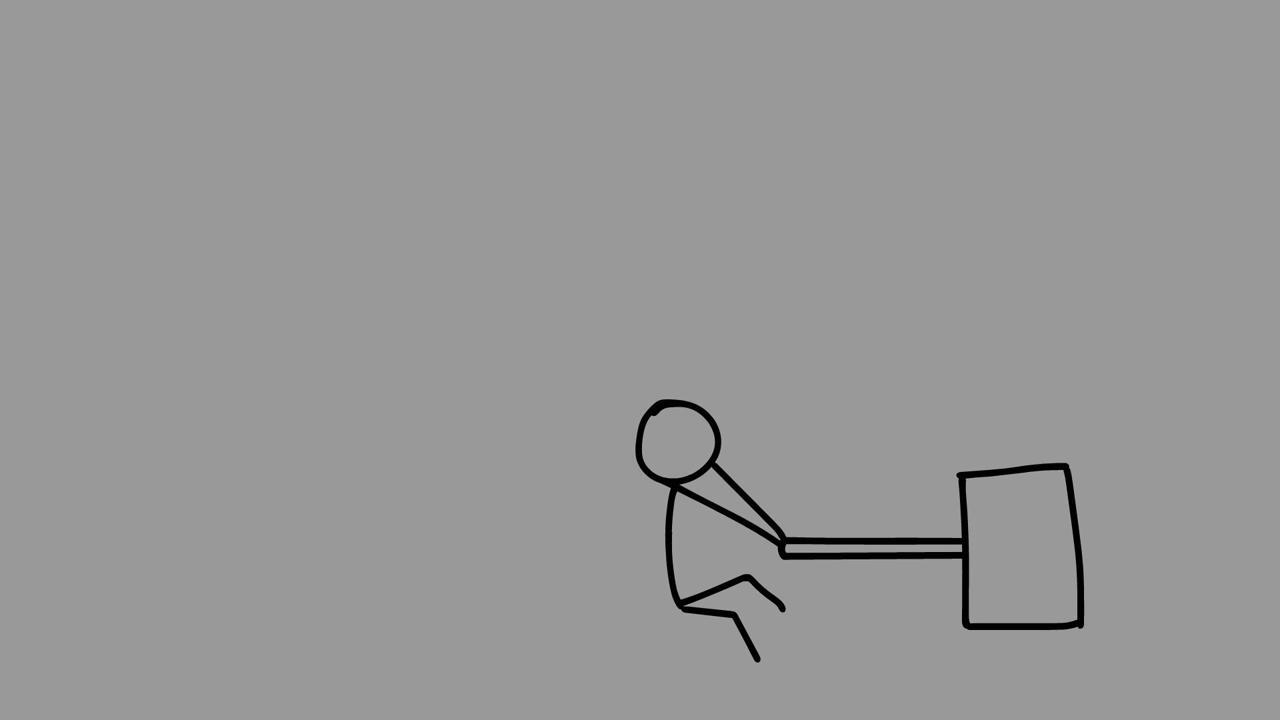

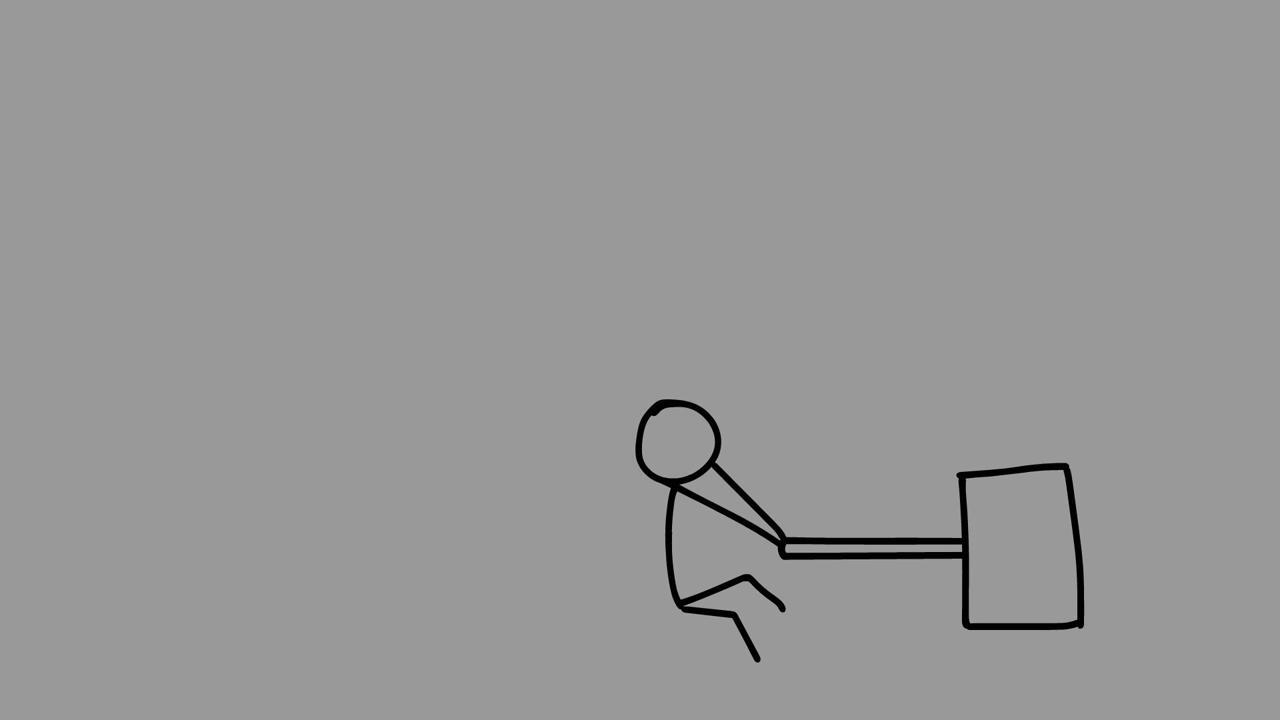

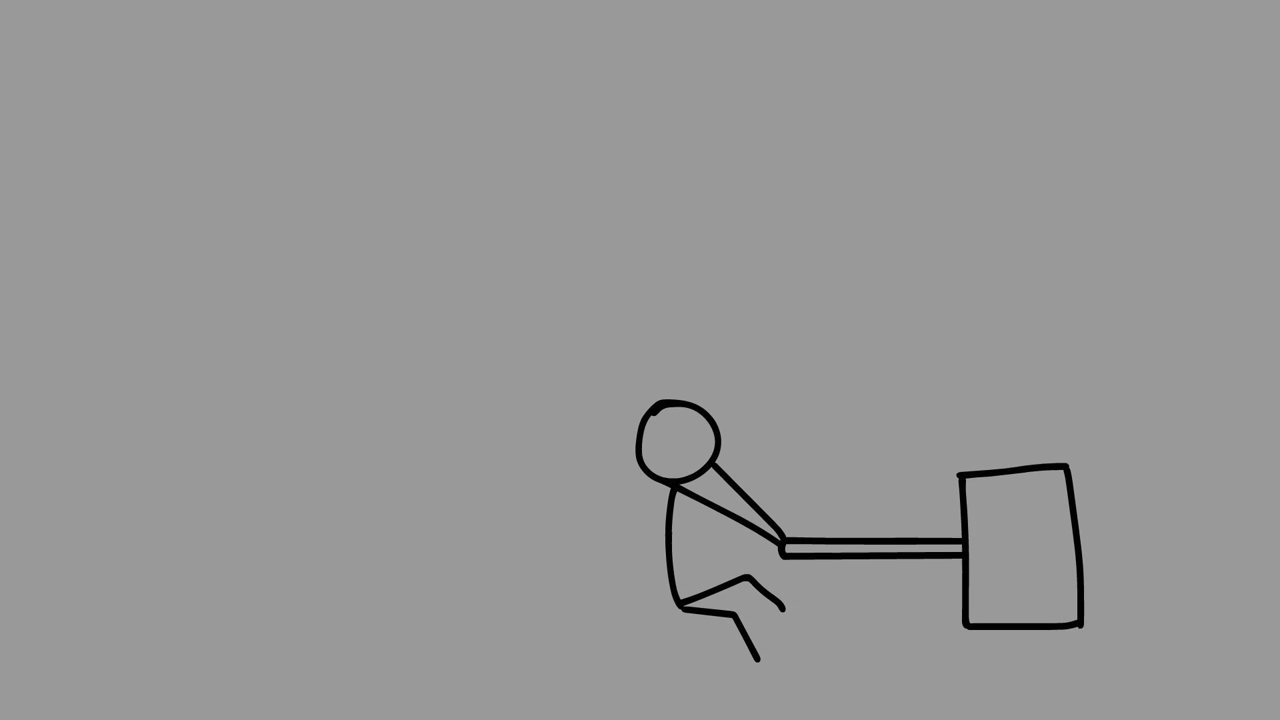

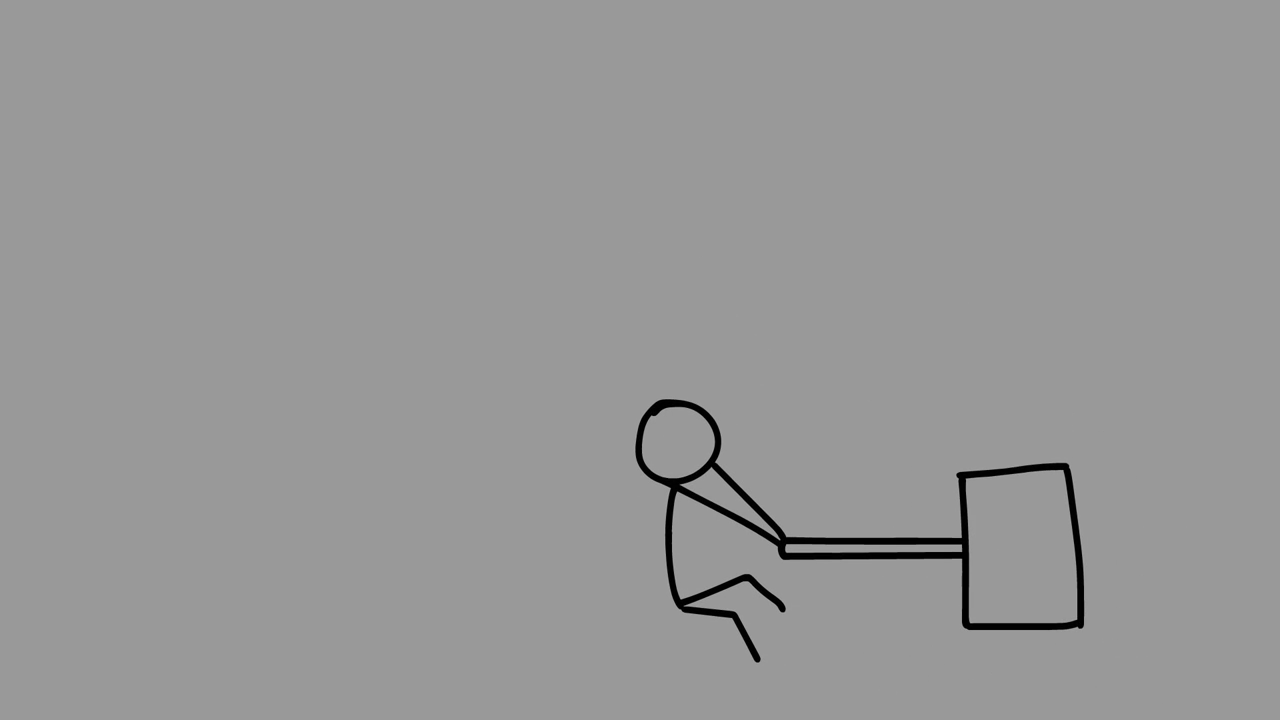

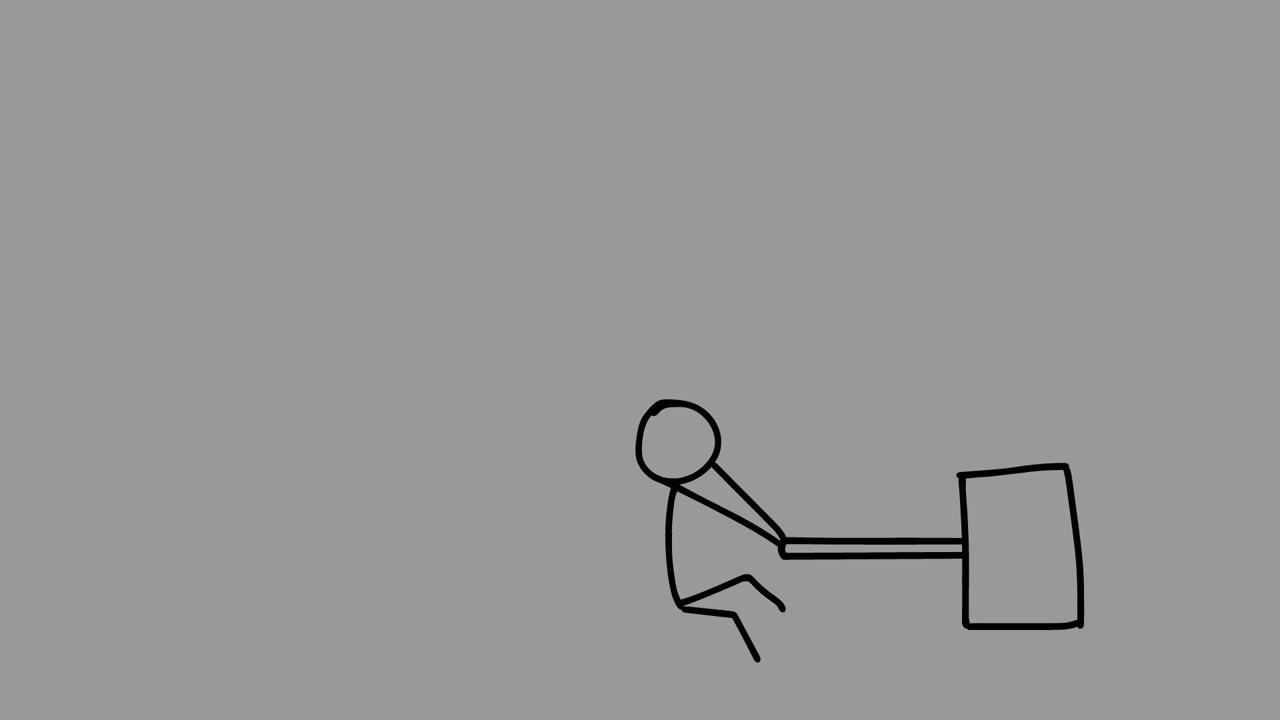

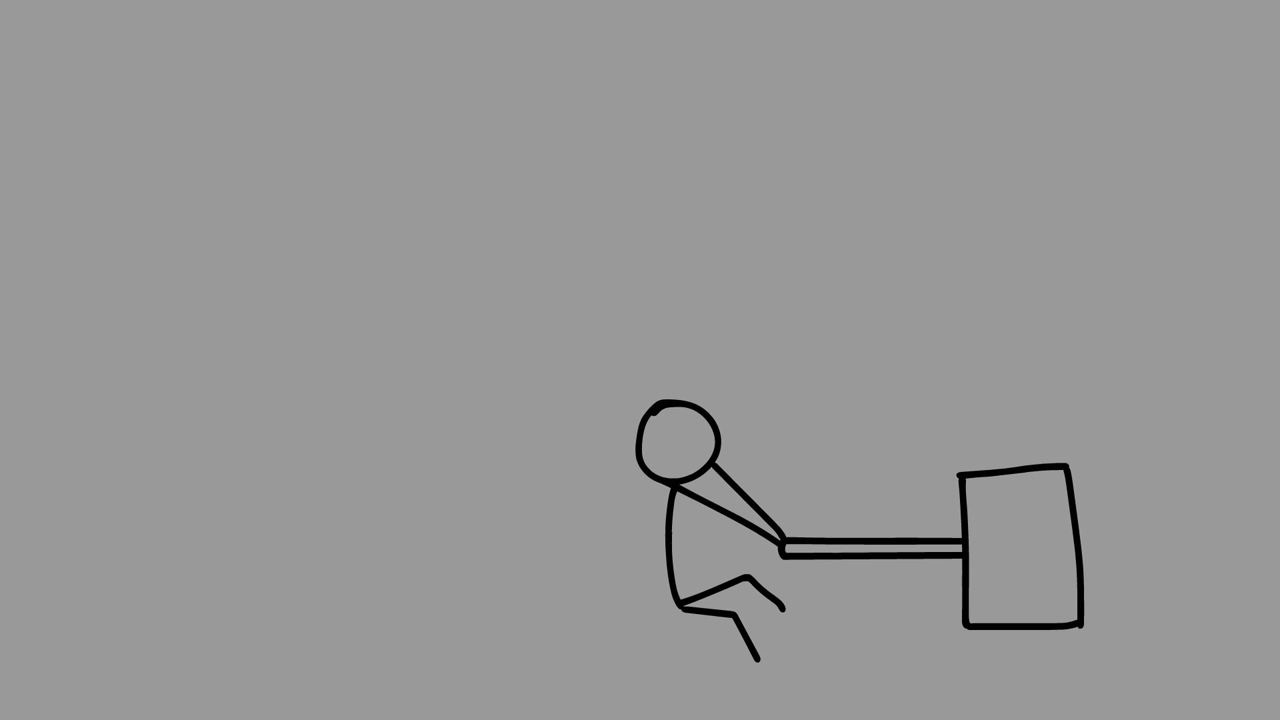

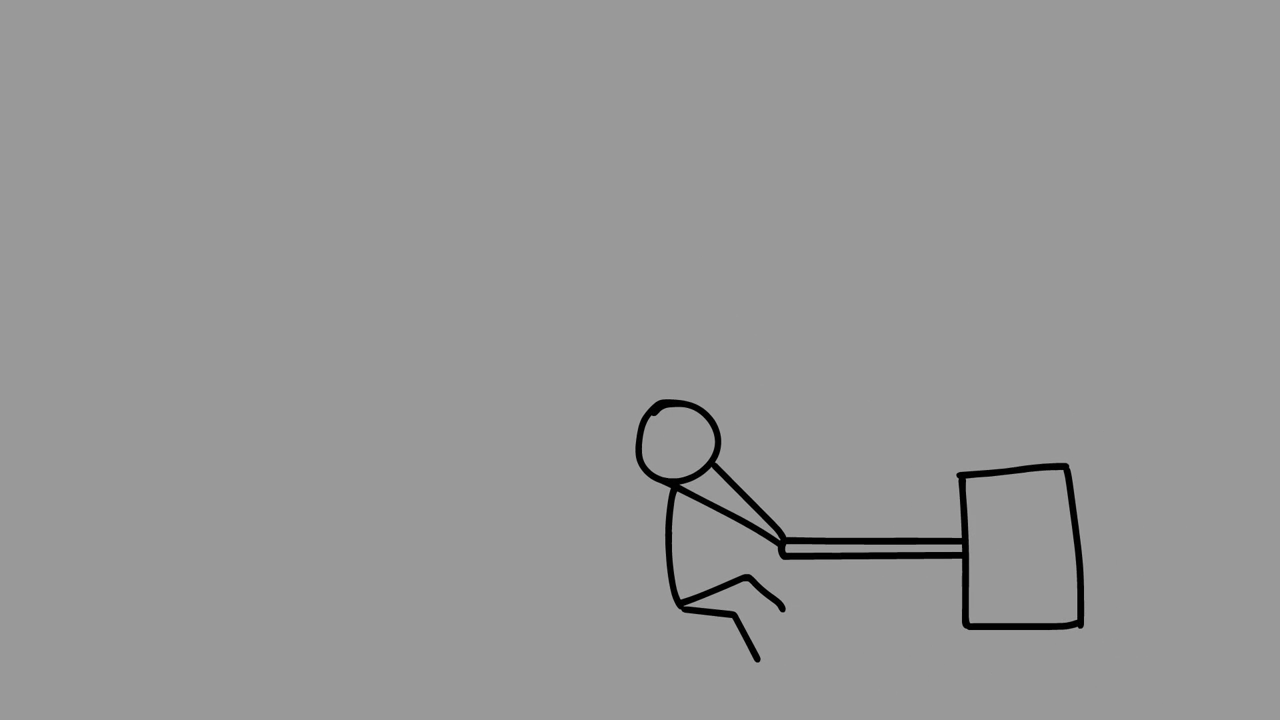

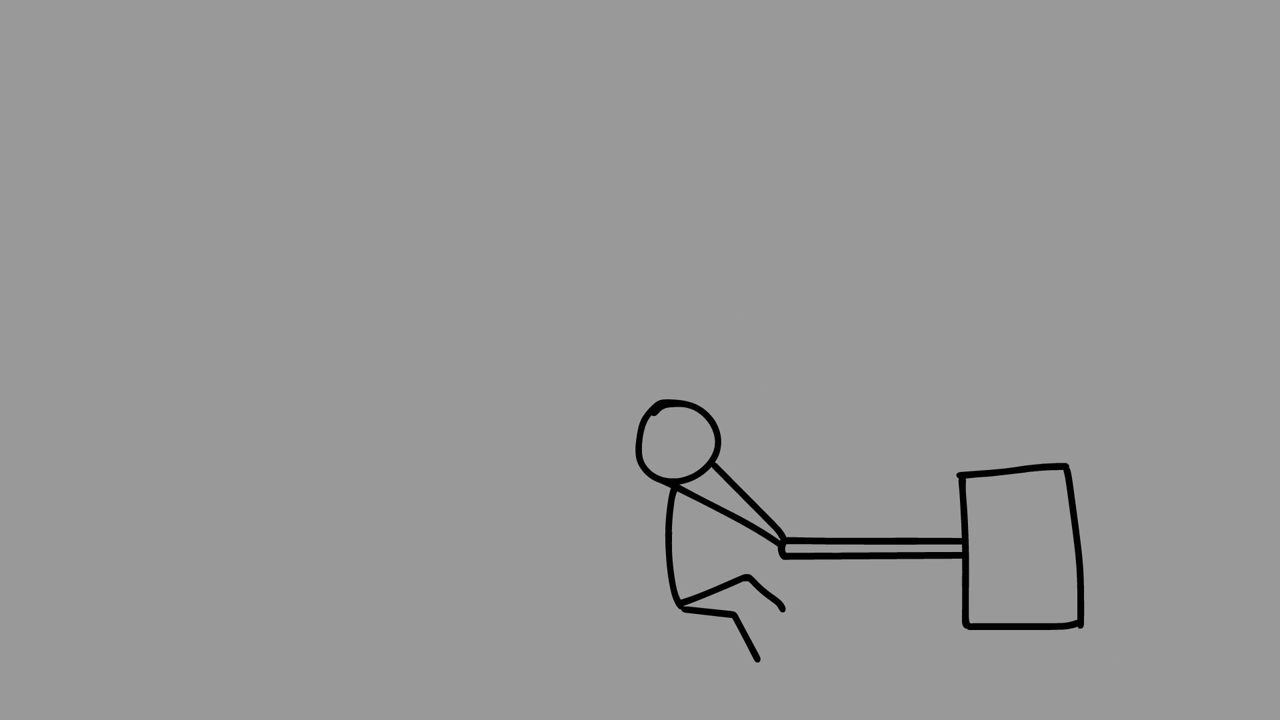

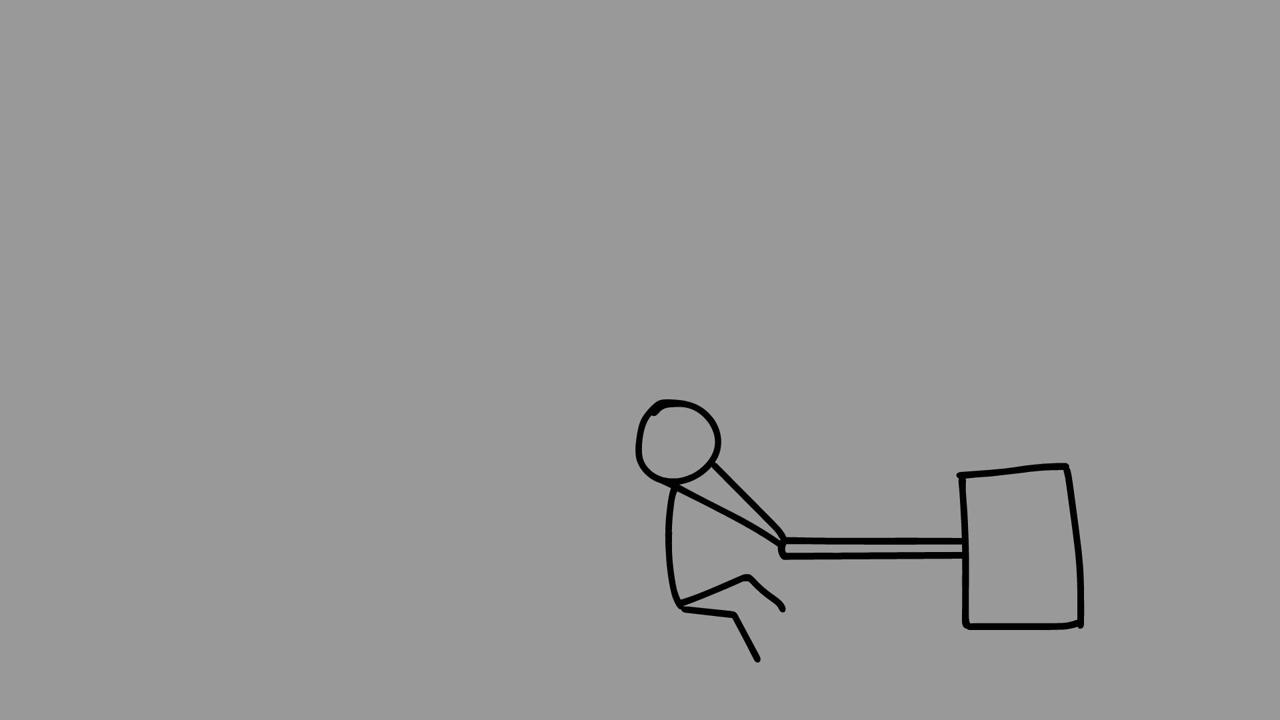

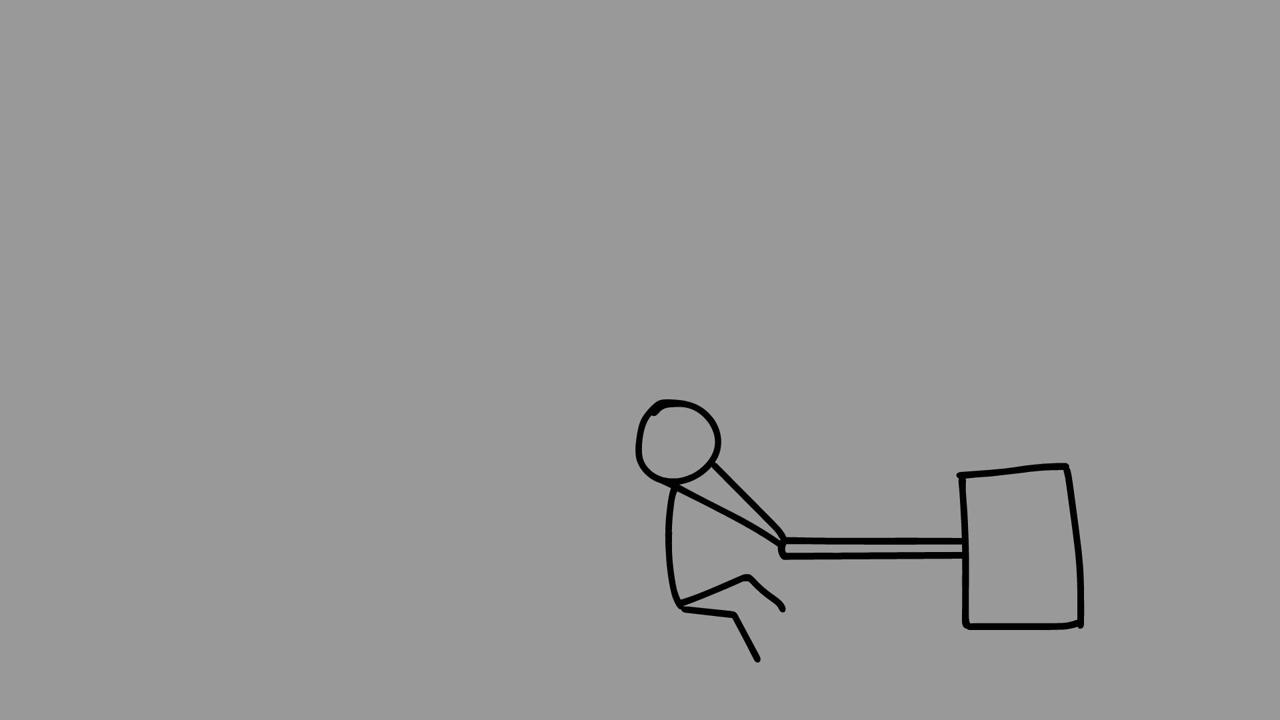

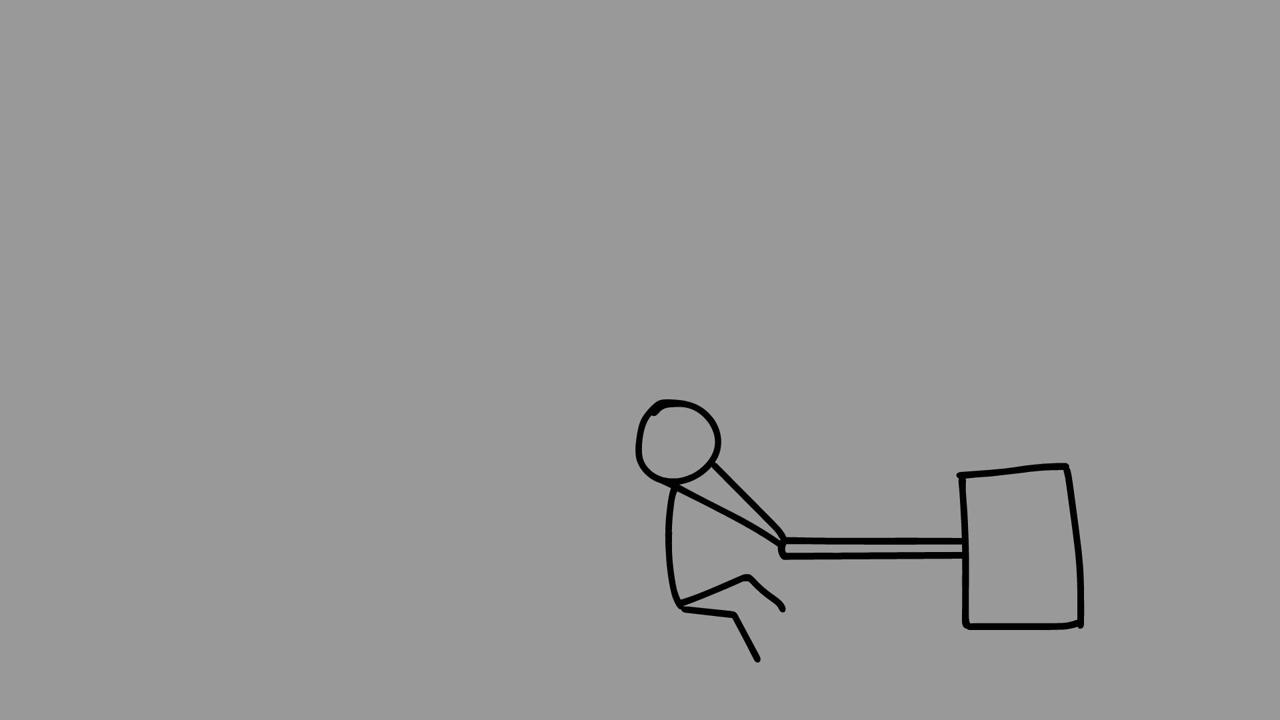

In [5]:
video = VideoIO.openvideo(video_path)
frames=[]
for frame in video
     push!(frames, frame)
    display(frame)
end
close(video)

(95,)


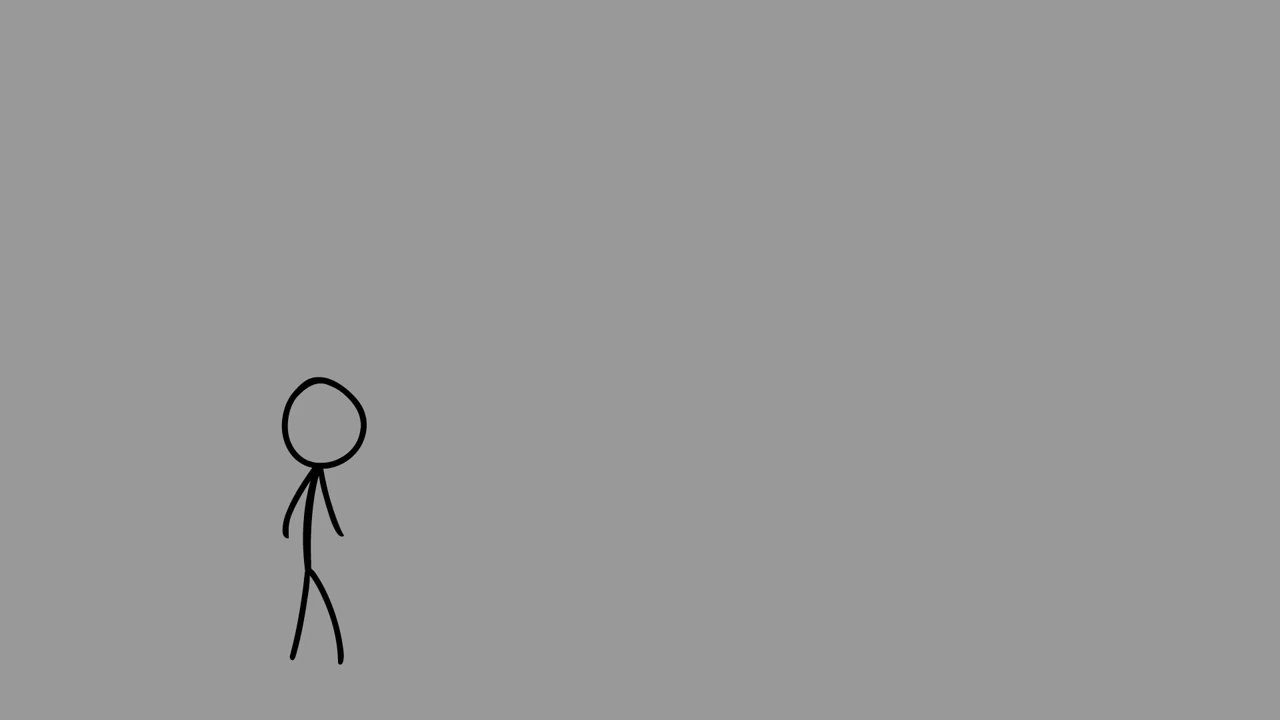

In [9]:
println(size(frames))
x=frames[1]

In [10]:
channelview(x)

3×720×1280 reinterpret(reshape, N0f8, PermutedDimsArray(::Array{RGB{N0f8},2}, (2, 1))) with eltype N0f8:
[:, :, 1] =
 0.6  0.6  0.6  0.6  0.6  0.6  0.6  0.6  …  0.6  0.6  0.6  0.6  0.6  0.6  0.6
 0.6  0.6  0.6  0.6  0.6  0.6  0.6  0.6     0.6  0.6  0.6  0.6  0.6  0.6  0.6
 0.6  0.6  0.6  0.6  0.6  0.6  0.6  0.6     0.6  0.6  0.6  0.6  0.6  0.6  0.6

[:, :, 2] =
 0.6  0.6  0.6  0.6  0.6  0.6  0.6  0.6  …  0.6  0.6  0.6  0.6  0.6  0.6  0.6
 0.6  0.6  0.6  0.6  0.6  0.6  0.6  0.6     0.6  0.6  0.6  0.6  0.6  0.6  0.6
 0.6  0.6  0.6  0.6  0.6  0.6  0.6  0.6     0.6  0.6  0.6  0.6  0.6  0.6  0.6

[:, :, 3] =
 0.6  0.6  0.6  0.6  0.6  0.6  0.6  0.6  …  0.6  0.6  0.6  0.6  0.6  0.6  0.6
 0.6  0.6  0.6  0.6  0.6  0.6  0.6  0.6     0.6  0.6  0.6  0.6  0.6  0.6  0.6
 0.6  0.6  0.6  0.6  0.6  0.6  0.6  0.6     0.6  0.6  0.6  0.6  0.6  0.6  0.6

;;; … 

[:, :, 1278] =
 0.6  0.6  0.6  0.6  0.6  0.6  0.6  0.6  …  0.6  0.6  0.6  0.6  0.6  0.6  0.6
 0.6  0.6  0.6  0.6  0.6  0.6  0.6  0.6     0.6  0.6 

In [11]:
imgmat=[]
for i in frames
    push!(imgmat,(channelview(Gray.(i))))
end

In [12]:
function SVD(x, k=50)
    compframes = []
    for mat in x
        U, Sig, V = svd(mat)
        M = U[:, 1:k] * Diagonal(Sig[1:k]) * V[:, 1:k]'
        push!(compframes, clamp01.(M))
    end
    return compframes
end


SVD (generic function with 2 methods)

In [13]:
compressedframes=SVD(imgmat)

95-element Vector{Any}:
 Float32[0.5999841 0.5999992 … 0.59999955 0.59999985; 0.5999801 0.599995 … 0.5999955 0.5999958; … ; 0.5999748 0.5999898 … 0.5999902 0.5999905; 0.59997475 0.59998965 … 0.5999902 0.5999905]
 Float32[0.59999484 0.59999937 … 0.60000026 0.59999996; 0.5999941 0.5999987 … 0.59999955 0.5999991; … ; 0.5999854 0.5999902 … 0.5999911 0.59999067; 0.5999854 0.5999902 … 0.599991 0.5999906]
 Float32[0.6000036 0.6000018 … 0.6000002 0.5999999; 0.6000067 0.60000515 … 0.6000035 0.6000032; … ; 0.5999941 0.59999233 … 0.59999084 0.5999905; 0.5999942 0.59999233 … 0.59999084 0.59999055]
 Float32[0.6000036 0.6000018 … 0.6000002 0.5999999; 0.6000067 0.60000515 … 0.6000035 0.6000032; … ; 0.5999941 0.59999233 … 0.59999084 0.5999905; 0.5999942 0.59999233 … 0.59999084 0.59999055]
 Float32[0.6000036 0.6000018 … 0.6000002 0.5999999; 0.6000067 0.60000515 … 0.6000035 0.6000032; … ; 0.5999941 0.59999233 … 0.59999084 0.5999905; 0.5999942 0.59999233 … 0.59999084 0.59999055]
 Float32[0.6000036 0.6000

In [14]:
images=[]
for test in compressedframes
    g=RGB{N0f8}.(test)
    push!(images,g)
end

In [15]:
vpath="/Users/desmondboateng/Desktop/AIMS/Essay Phase Project/compmovie.mp4"

"/Users/desmondboateng/Desktop/AIMS/Essay Phase Project/compmovie.mp4"

In [16]:
save(vpath,images)